In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

### Catalogue de fonctions utilisées

In [2]:
# Option de visibilité
pd.options.display.max_rows = 999

In [3]:
df= pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [4]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [5]:
df.shape

(1050, 15)

In [6]:
df.describe()

retail_price  discounted_price
count    1049.000000       1049.000000
mean     2186.197331       1584.527169
std      7639.229411       7475.099680
min        35.000000         35.000000
25%       555.000000        340.000000
50%       999.000000        600.000000
75%      1999.000000       1199.000000
max    201000.000000     201000.000000

In [7]:
df.dtypes

uniq_id                     object
crawl_timestamp             object
product_url                 object
product_name                object
product_category_tree       object
pid                         object
retail_price               float64
discounted_price           float64
image                       object
is_FK_Advantage_product       bool
description                 object
product_rating              object
overall_rating              object
brand                       object
product_specifications      object
dtype: object

### Quelques informations sur les catégories des produits (notre target)

In [8]:
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [9]:
df['product_category_tree'].value_counts()

["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                                                                                                                                  56
["Kitchen & Dining >> Coffee Mugs >> Prithish Coffee Mugs"]                                                                                                                                    26
["Watches >> Wrist Watches >> Maxima Wrist Watches"]                                                                                                                                           23
["Kitchen & Dining >> Coffee Mugs >> Rockmantra Coffee Mugs"]                                                                                                                                  22
["Home Furnishing >> Bath Linen >> Towels"]                                                                                                                                                    19
["Watches >> Wrist Watches >> 

In [10]:
df['product_category_tree'].nunique()

642

In [11]:
df.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

Très peu de valeurs manquantes, notre target est parfaitement renseignée

## Traitement des catégories de produits

La catégorie de produits est présentée comme une arborescence que nous allons découper.

In [12]:
type(df['product_category_tree'])

pandas.core.series.Series

In [13]:
df['product_category_tree'][260]

'["Home Decor & Festive Needs >> Showpieces >> Ethnic >> Monil Ethnic"]'

In [14]:
#Test de Split
df['product_category_tree'][0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [15]:
df['product_category_tree'][0].split('["')

['',
 'Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]']

In [16]:
df['product_category_tree'][0].split('["')[0]

''

In [17]:
df['product_category_tree'][0].split('["')[1]

'Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [18]:
df['product_category_tree'][0].split('["')[1].split('"]')

['Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...',
 '']

In [19]:
#Séparation puis retrait du [" ainsi que du "]
df['product_category_tree'][0].split('["')[1].split('"]')[0]

'Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do...'

In [20]:
#Séparation par >>
df['product_category_tree'][0].split('["')[1].split('"]')[0].split(' >> ')

['Home Furnishing',
 'Curtains & Accessories',
 'Curtains',
 'Elegance Polyester Multicolor Abstract Eyelet Do...']

In [21]:
for k in range(4):
    print(df['product_category_tree'][0].split('["')[1].split('"]')[0].split(' >> ')[k])

Home Furnishing
Curtains & Accessories
Curtains
Elegance Polyester Multicolor Abstract Eyelet Do...


#### Création de features catégoriques à partir de l'arborescence de catégorie

In [22]:
# Fonction de traitement des catégories
def split_categories(categorie, branche):
    
    categorie = categorie.split('["')[1].split('"]')[0]
    cat = categorie.split(' >> ')
    
    if (len(cat))<3:
        cat = [cat[0], cat[1], 'None']
        if (len(cat)) < 2 :
            cat = [cat[0], 'None', 'None']
    return cat[branche]

def split_categories_1(categorie):
    return split_categories(categorie,0)
def split_categories_2(categorie):
    return split_categories(categorie,1)
def split_categories_3(categorie):
    return split_categories(categorie,2)

In [23]:
def detail_categories(dataframe):
    dataframe['cat_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    
    return dataframe

In [24]:
df = detail_categories(df)

In [25]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  
0  Curtains & Accessories          Curtains  
1        Baby Bath & Skin  Baby Bath Towels  
2        Baby Bath & Skin  Baby Bath Towels  
3               Bed Linen         Bedsheets  
4               Bed Linen         Bedsheets

In [26]:
df = df.drop(['product_category_tree'], axis= 1 )

In [27]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  
0  Curtains & Accessories          Curtains  
1        Baby Bath & Skin  Baby Bath Towels  
2        Baby Bath & Skin  Baby Bath Towels  
3               Bed Linen         Bedsheets  
4               Bed Linen         Bedsheets

##### Quelques visualisations de la quantité de produits par catégories

In [28]:
df.groupby('cat_1').count()['uniq_id'].sort_values(ascending=False)

cat_1
Baby Care                     150
Beauty and Personal Care      150
Computers                     150
Home Decor & Festive Needs    150
Home Furnishing               150
Kitchen & Dining              150
Watches                       150
Name: uniq_id, dtype: int64

In [29]:
df.groupby('cat_2').count()['uniq_id'].sort_values(ascending=False)

cat_2
Wrist Watches                      149
Laptop Accessories                  87
Infant Wear                         84
Coffee Mugs                         74
Showpieces                          71
Bed Linen                           65
Fragrances                          65
Network Components                  49
Cookware                            27
Table Decor & Handicrafts           27
Combos and Kits                     24
Wall Decor & Clocks                 22
Bath Linen                          21
Curtains & Accessories              19
Makeup                              18
Baby & Kids Gifts                   15
Body and Skin Care                  15
Baby Bedding                        15
Baby Bath & Skin                    14
Decorative Lighting & Lamps         14
Kitchen Tools                       14
Kitchen & Dining Linen              14
Containers & Bottles                13
Cushions, Pillows & Covers          13
Hair Care                            9
Feeding & Nursing  

In [30]:
df.groupby('cat_3').count()['uniq_id'].sort_values(ascending=False)

cat_3
Deodorants                                             65
Blankets, Quilts & Dohars                              57
Baby Girls' Clothes                                    49
Routers                                                49
USB Gadgets                                            38
Baby Boys' Clothes                                     35
Ethnic                                                 34
Prithish Coffee Mugs                                   26
Pots & Pans                                            24
Maxima Wrist Watches                                   23
Showpieces                                             23
Rockmantra Coffee Mugs                                 22
Batteries                                              22
Sonata Wrist Watches                                   19
Curtains                                               19
Towels                                                 19
Printland Coffee Mugs                                  13
Kitchen 

### Catalogue de fonctions utilisées

In [31]:
import time
l_cat = list(set(df['cat_1']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df.iloc[i]['cat_1'])) for i in range(len(df))]
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)


catégories :  ['Baby Care', 'Home Furnishing', 'Beauty and Personal Care', 'Watches', 'Home Decor & Festive Needs', 'Computers', 'Kitchen & Dining']


### Séparation du jeu de données en jeu d'entraînement et jeu de test pour les essais d'apprentissage supervisés

In [32]:
train, test = train_test_split(df, test_size = 0.2, random_state=42)

In [33]:
train.shape

(840, 17)

In [34]:
test.shape

(210, 17)

In [35]:
train.head()

uniq_id            crawl_timestamp  \
554   b144a363c107c7bdd91f32d6e28ba6f2  2016-01-07 05:50:25 +0000   
1012  29def171d7e31d48571a52f0fb3e6b07  2016-03-02 19:09:22 +0000   
481   9f9bb0ef3bb8af571bcfbfa1a22150bd  2016-01-07 05:50:25 +0000   
432   7f2f1f3039d1f5bc23226fc36577eab9  2016-03-11 06:55:07 +0000   
626   73901494efea71869576898c68b5eee4  2016-03-05 16:23:23 +0000   

                                            product_url  \
554   http://www.flipkart.com/timewel-1100-n1192-ana...   
1012  http://www.flipkart.com/ech-oly-ceramic-inside...   
481   http://www.flipkart.com/lapguard-hp-pavilion-d...   
432   http://www.flipkart.com/smartpro-19-5v-3-9a-re...   
626   http://www.flipkart.com/ville-style-polyester-...   

                                           product_name               pid  \
554          Timewel 1100-N1192 Analog Watch  - For Men  WATEYAP38HHARJDT   
1012    Ech oly Ceramic Inside Fitting Hookah Mouth Tip  HMTEFW3SGGF9HYPT   
481   Lapguard HP Pavilion DV7-6000 Series 6 Cell La...  ACCDSY8ESXF9AUHY   
432   Smartpro 19.5v,3.9a Replacement Charger for Va...  ACCEGZ6BUESXR4VH   
626   Ville Style Polyester Maroon Floral Eyelet Doo...  CRNEGGZFH8XWXYEA   

      retail_price  discounted_price                                 image  \
554          995.0             995.0  b144a363c107c7bdd91f32d6e28ba6f2.jpg   
1012        1799.0             699.0  29def171d7e31d48571a52f0fb3e6b07.jpg   
481         3999.0            1699.0  9f9bb0ef3bb8af571bcfbfa1a22150bd.jpg   
432         1499.0             539.0  7f2f1f3039d1f5bc23226fc36577eab9.jpg   
626          999.0             399.0  73901494efea71869576898c68b5eee4.jpg   

      is_FK_Advantage_product  \
554                     False   
1012                    False   
481                     False   
432                     False   
626                     False   

                                            description       product_rating  \
554   Timewel 1100-N1192 Analog Watch  - For Men - B...  No rating available   
1012  Ech oly Ceramic Inside Fitting Hookah Mouth Ti...  No rating available   
481   Buy Lapguard HP Pavilion DV7-6000 Series 6 Cel...  No rating available   
432   Key Features of Smartpro 19.5v,3.9a Replacemen...  No rating available   
626   Key Features of Ville Style Polyester Maroon F...  No rating available   

           overall_rating        brand  \
554   No rating available          NaN   
1012  No rating available      Ech oly   
481   No rating available     Lapguard   
432   No rating available     Smartpro   
626   No rating available  Ville Style   

                                 product_specifications  \
554   {"product_specification"=>[{"key"=>"Mechanism"...   
1012  {"product_specification"=>[{"key"=>"Brand", "v...   
481   {"product_specification"=>[{"key"=>"Brand", "v...   
432   {"product_specification"=>[{"key"=>"Brand", "v...   
626   {"product_specification"=>[{"key"=>"Reversible...   

                           cat_1                      cat_2  \
554                      Watches              Wrist Watches   
1012  Home Decor & Festive Needs  Table Decor & Handicrafts   
481                    Computers         Laptop Accessories   
432                    Computers         Laptop Accessories   
626              Home Furnishing     Curtains & Accessories   

                      cat_3  
554   Timewel Wrist Watches  
1012            Table Decor  
481               Batteries  
432                Adapters  
626                Curtains

## Traitement des données textuelles

Nous nous basons sur la description du produit pour prédire sa catégorie.

In [36]:
train[['description']].head()

description
554   Timewel 1100-N1192 Analog Watch  - For Men - B...
1012  Ech oly Ceramic Inside Fitting Hookah Mouth Ti...
481   Buy Lapguard HP Pavilion DV7-6000 Series 6 Cel...
432   Key Features of Smartpro 19.5v,3.9a Replacemen...
626   Key Features of Ville Style Polyester Maroon F...

## Nettoyage du texte

In [37]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text
df['description_bow'] = df['description'].apply(lambda x : transform_bow_fct(x))
df['description_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
df['description_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))
df.shape

(1050, 20)

In [38]:
df.to_csv("data_clean_text_6.csv")

In [39]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl  
0  key features of elegance polyester m

## Exemple de traitement

#### Approche par TF-IDF (pondération des mots)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
from string import punctuation
from nltk.corpus import stopwords

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alexandre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
#stopwords_int = set(stopwords_int)
stopwords_nltk = set(stopwords.words('english'))
stopwords_ponctuation = set(punctuation)
stopwords_full = set.union(stopwords_nltk, stopwords_ponctuation)

In [44]:
print('ponctuation : ',list(stopwords_ponctuation)[0:15])

print('stopwords : ',list(stopwords_full)[0:15])

ponctuation :  ['?', '~', ']', '_', '*', '.', ';', "'", '^', ')', '+', '`', '/', '%', '{']
stopwords :  ['a', '?', 'too', 'because', 'until', 'shouldn', '*', 's', "'", 'further', 'then', 'were', 'now', 'hadn', 'it']


In [45]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
     def __init__(self):
         self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

tfidf = TfidfVectorizer(encoding='utf-8',
                       lowercase=True,
                       tokenizer=LemmaTokenizer(),
                       stop_words=stopwords_full,
                       )

In [46]:
type(tfidf)

sklearn.feature_extraction.text.TfidfVectorizer

In [47]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alexandre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alexandre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
tfidf.fit_transform(train['description'])

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<840x5210 sparse matrix of type '<class 'numpy.float64'>'
	with 30132 stored elements in Compressed Sparse Row format>

In [50]:
tfidf.get_feature_names()

["''",
 "'m",
 "'re",
 "'s",
 "'smart",
 '+60c',
 '+70c',
 ',bela',
 ',specifications',
 '--',
 '-15',
 '-20',
 '-200',
 '-20c-',
 '-23',
 '-300',
 '-30c',
 '-4',
 '-a',
 '-age',
 '-available',
 '-avoid',
 '-blue',
 '-includes',
 '-keeps',
 '-large',
 '-material',
 '-one',
 '-reusable',
 '-sizes',
 '-snap',
 '-trim',
 '-tumble',
 '-wash',
 '..',
 '...',
 '.....',
 '...................',
 '......................',
 '.237',
 '.5',
 '.dry',
 '.frill',
 '.please',
 '//',
 '//storage',
 '/dust',
 '/pot',
 '0',
 '0.0',
 '0.04',
 '0.2',
 '0.45lbs',
 '0.500',
 '0.7',
 '0.750ml',
 '0.92',
 '001',
 '006',
 '01',
 '01433cmgy',
 '01741lpln',
 '01784bmly',
 '03918cmly',
 '04615cmgy',
 '05712lmly',
 '05tg-166-24-raw',
 '05tg-870-20-n.blue',
 '05tg-870-26-antra',
 '06',
 '06,22',
 '06362cmgy',
 '09321cmgy',
 '1',
 '1,052',
 '1,064',
 '1,085',
 '1,099',
 '1,100',
 '1,145',
 '1,199',
 '1,200',
 '1,240',
 '1,249',
 '1,250',
 '1,261',
 '1,299',
 '1,325',
 '1,337',
 '1,350',
 '1,365',
 '1,390',
 '1,399',


In [51]:
len(tfidf.get_feature_names())

5210

In [52]:
matrice_cat = tfidf.transform(train['description'])
matrice_cat

<840x5210 sparse matrix of type '<class 'numpy.float64'>'
	with 30132 stored elements in Compressed Sparse Row format>

In [53]:
matrice_cat.todense()[10,:].tolist()

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.09201605654444148,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.

In [54]:
train['description'].iloc[10]

'Key Features of Amit Carpet Polyester Medium Door Mat ACI20160340 Anti-Slip Backing Good Water Absorber No Color Fading Washable,Amit Carpet Polyester Medium Door Mat ACI20160340 (Pink, 1 Mat) Price: Rs. 549 Tufting is the process of creating textiles, especially carpet, on specialized multi-needle sewing machines. Several hundred needles stitch hundreds of rows of pile yarn tufts through a backing fabric called the primary backing. The needles push yarn through a primary backing fabric, where a loop holds the yarn in place to form a tuft as the needle is removed. The yarn is caught by loopers and held in place for loop-pile carpet or cut by blades for cut-pile carpet. Next, secondary backings of various types are applied to render a variety of performance properties.,Specifications of Amit Carpet Polyester Medium Door Mat ACI20160340 (Pink, 1 Mat) General Brand Amit Carpet Type Door Model Name ACI20160340 Model ID 819868 Color Pink Size Medium Mat Features Bacteria Resistant Yes Mate

In [55]:
def get_list(liste):
    return liste

In [56]:
from nltk import word_tokenize

description_test = train['description'].iloc[10]
print('-------PRE TRAITEMENT ------')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))

#lowercase
description_test = description_test.lower()
print('------- PASSAGE EN MINUSCULES -------')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))

#tokenizer : transforme les documents en liste de mots
description_test = word_tokenize(description_test)
print('------ TOKENIZER -----')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))

#stopwords : retrait des mots les plus utilisés dans la langue en question
description_test = [w for w in description_test if not w in stopwords_full] 
print('----- STOPWORDS ------')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))

#lemmatizer : représentation des mots sous leurforme cannonique
lemm = WordNetLemmatizer()
description_test = [lemm.lemmatize(ele) for ele in description_test]
print('----- LEMMATISATION -----')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))



-------PRE TRAITEMENT ------
Key Features of Amit Carpet Polyester Medium Door Mat ACI20160340 Anti-Slip Backing Good Water Absorber No Color Fading Washable,Amit Carpet Polyester Medium Door Mat ACI20160340 (Pink, 1 Mat) Price: Rs. 549 Tufting is the process of creating textiles, especially carpet, on specialized multi-needle sewing machines. Several hundred needles stitch hundreds of rows of pile yarn tufts through a backing fabric called the primary backing. The needles push yarn through a primary backing fabric, where a loop holds the yarn in place to form a tuft as the needle is removed. The yarn is caught by loopers and held in place for loop-pile carpet or cut by blades for cut-pile carpet. Next, secondary backings of various types are applied to render a variety of performance properties.,Specifications of Amit Carpet Polyester Medium Door Mat ACI20160340 (Pink, 1 Mat) General Brand Amit Carpet Type Door Model Name ACI20160340 Model ID 819868 Color Pink Size Medium Mat Features

In [57]:
transformation = []
for i, ele  in enumerate(matrice_cat.todense()[10,:].tolist()[0]):
    if ele !=0:
        transformation.append((tfidf.get_feature_names()[i], ele))
pd.DataFrame(transformation, columns=['mot', 'tfidf'])

mot     tfidf
0               1  0.092016
1              19  0.107105
2               2  0.032082
3              50  0.087305
4             549  0.053552
5             800  0.048090
6          819868  0.063452
7        absorber  0.063452
8     aci20160340  0.253809
9            amit  0.253809
10      anti-slip  0.063452
11        applied  0.050960
12        backing  0.298993
13       bacteria  0.059799
14          blade  0.057206
15            box  0.022182
16          brand  0.023853
17         called  0.059799
18         carpet  0.374867
19         caught  0.063452
20             cm  0.072927
21          color  0.046008
22        content  0.027341
23       creating  0.057206
24            cut  0.055195
25       cut-pile  0.063452
26          depth  0.035805
27      dimension  0.027099
28           door  0.181182
29     especially  0.059799
30         fabric  0.056949
31         fading  0.063452
32        feature  0.042773
33           form  0.052163
34              g  0.033109
35        general  0.020973
36           good  0.042263
37           held  0.063452
38           hold  0.057206
39        hundred  0.126905
40             id  0.036234
41           inch  0.065015
42            key  0.024078
43         length  0.034093
44           loop  0.048949
45      loop-pile  0.063452
46         looper  0.063452
47        machine  0.037660
48            mat  0.400443
49       material  0.023742
50         medium  0.181182
51          model  0.053881
52   multi-needle  0.063452
53           name  0.031036
54         needle  0.190357
55           next  0.057206
56         number  0.023418
57        package  0.046943
58    performance  0.045295
59           pile  0.063452
60           pink  0.118064
61          place  0.082120
62      polyester  0.170812
63          price  0.014788
64        primary  0.110391
65        process  0.057206
66    properties.  0.063452
67           push  0.059799
68              r  0.014102
69        removed  0.063452
70         render  0.063452
71      resistant  0.065909
72            row  0.063452
73           sale  0.046837
74      secondary  0.057206
75        several  0.063452
76         sewing  0.063452
77           size  0.029352
78    specialized  0.063452
79  specification  0.019384
80         stitch  0.059799
81        textile  0.055195
82           tuft  0.126905
83        tufting  0.063452
84           type  0.045023
85        variety  0.057206
86        various  0.055195
87       washable  0.040692
88          water  0.059542
89         weight  0.031675
90          width  0.030913
91           yarn  0.239194
92            yes  0.068185

In [58]:
pd.DataFrame(transformation, columns=['mot', 'tfidf']).shape

(93, 2)

In [59]:
pd.DataFrame(transformation, columns=['mot', 'tfidf']).sort_values(by='tfidf', ascending=False).head(20)

mot     tfidf
48          mat  0.400443
18       carpet  0.374867
12      backing  0.298993
8   aci20160340  0.253809
9          amit  0.253809
91         yarn  0.239194
54       needle  0.190357
50       medium  0.181182
28         door  0.181182
62    polyester  0.170812
82         tuft  0.126905
39      hundred  0.126905
60         pink  0.118064
64      primary  0.110391
1            19  0.107105
0             1  0.092016
3            50  0.087305
61        place  0.082120
20           cm  0.072927
92          yes  0.068185

#### Approche Bag-of-Words

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
tf_vectorizer = CountVectorizer(encoding='utf-8',
                       lowercase=True,
                       tokenizer=LemmaTokenizer(),
                       stop_words=stopwords_full)
tf = tf_vectorizer.fit_transform(train['description'])

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", '``', 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [62]:
tfidf.fit_transform(train['description'])

<840x5210 sparse matrix of type '<class 'numpy.float64'>'
	with 30132 stored elements in Compressed Sparse Row format>

In [63]:
type(tf)

scipy.sparse.csr.csr_matrix

In [64]:
type(tf_vectorizer)

sklearn.feature_extraction.text.CountVectorizer

In [65]:
tf.todense()[10,:].tolist()

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [66]:
tf.todense()[10,:].tolist()[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [67]:
transformation_tf = []
for i, ele  in enumerate(tf.todense()[10,:].tolist()[0]):
    if ele !=0:
        transformation_tf.append((tf_vectorizer.get_feature_names()[i], ele))
pd.DataFrame(transformation_tf, columns=['mot', 'tf'])

mot  tf
0               1   4
1              19   2
2               2   1
3              50   2
4             549   1
5             800   1
6          819868   1
7        absorber   1
8     aci20160340   4
9            amit   4
10      anti-slip   1
11        applied   1
12        backing   5
13       bacteria   1
14          blade   1
15            box   1
16          brand   1
17         called   1
18         carpet   7
19         caught   1
20             cm   3
21          color   2
22        content   1
23       creating   1
24            cut   1
25       cut-pile   1
26          depth   1
27      dimension   1
28           door   4
29     especially   1
30         fabric   2
31         fading   1
32        feature   2
33           form   1
34              g   1
35        general   1
36           good   1
37           held   1
38           hold   1
39        hundred   2
40             id   1
41           inch   2
42            key   1
43         length   1
44           loop   1
45      loop-pile   1
46         looper   1
47        machine   1
48            mat   7
49       material   1
50         medium   4
51          model   2
52   multi-needle   1
53           name   1
54         needle   3
55           next   1
56         number   1
57        package   2
58    performance   1
59           pile   1
60           pink   3
61          place   2
62      polyester   4
63          price   1
64        primary   2
65        process   1
66    properties.   1
67           push   1
68              r   1
69        removed   1
70         render   1
71      resistant   2
72            row   1
73           sale   2
74      secondary   1
75        several   1
76         sewing   1
77           size   1
78    specialized   1
79  specification   1
80         stitch   1
81        textile   1
82           tuft   2
83        tufting   1
84           type   2
85        variety   1
86        various   1
87       washable   1
88          water   2
89         weight   1
90          width   1
91           yarn   4
92            yes   2

In [68]:
pd.DataFrame(transformation_tf, columns=['mot', 'tf']).shape

(93, 2)

In [69]:
pd.DataFrame(transformation_tf, columns=['mot', 'tf']).sort_values(by='tf', ascending=False).head(20)

mot  tf
18       carpet   7
48          mat   7
12      backing   5
0             1   4
50       medium   4
28         door   4
62    polyester   4
9          amit   4
8   aci20160340   4
91         yarn   4
20           cm   3
60         pink   3
54       needle   3
1            19   2
41         inch   2
39      hundred   2
32      feature   2
61        place   2
51        model   2
57      package   2

### Réduction de dimension

#### Approche par NMF

In [70]:
from sklearn.decomposition import NMF

In [71]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl  
0  key features of elegance polyester m

In [72]:
# On applique la réduction dimensionnelle au premier niveau de l'arborescence de catégories, pour éviter d'avoir trop de 
# catégories qui ne comportent qu'un élément
nmf = NMF(n_components = df['cat_1'].nunique(),
         random_state=1,
         alpha=0.1,
         l1_ratio=0.5).fit(matrice_cat)

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [73]:
nmf.get_params()

{'alpha': 0.1,
 'beta_loss': 'frobenius',
 'init': 'warn',
 'l1_ratio': 0.5,
 'max_iter': 200,
 'n_components': 7,
 'random_state': 1,
 'regularization': 'both',
 'shuffle': False,
 'solver': 'cd',
 'tol': 0.0001,
 'verbose': 0}

In [74]:
# Fonction pour récupérer les top_words par topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [75]:
tfidf_feature_names = tfidf.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words = 12)

Topic #0: flipkart.com guarantee 30 replacement shipping cash genuine delivery day free buy combo
Topic #1: '' rockmantra mug ceramic crafting ensuring stay permanent porcelain thrilling start making
Topic #2: baby 's girl detail fabric dress cotton boy neck sleeve ideal pattern
Topic #3: watch analog men discount woman india great dial maximum strap online sonata
Topic #4: mug coffee ceramic perfect printland one get gift prithish also bring presented
Topic #5: cm showpiece inch 1 pack color cover model box design feature package
Topic #6: abstract blanket single flipkart.com quilt comforter double genuine cash shipping delivery buy



In [76]:
df['cat_1'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: cat_1, dtype: int64

#### Approche par LDA

In [77]:
from sklearn.decomposition import LatentDirichletAllocation

In [78]:
lda = LatentDirichletAllocation(n_components = df['cat_1'].nunique(),
                               random_state=2)

In [79]:
lda.fit(tf)

LatentDirichletAllocation(n_components=7, random_state=2)

In [80]:
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words = 12)

Topic #0: cm cotton 1 cover towel usb price inch r light color feature
Topic #1: skin laptop warranty blanket price oil product r feature home backpack apple
Topic #2: mug ceramic home one coffee perfect r made add bottle price printland
Topic #3: laptop warranty adapter battery replacement quality dial skin strap power shape resistant
Topic #4: baby 's detail girl specification fabric cotton feature 1 general boy ideal
Topic #5: mug cm color type feature pack 1 product material design box dimension
Topic #6: product free delivery buy shipping genuine cash day 30 flipkart.com guarantee replacement



In [81]:
lda.transform(tf_vectorizer.transform(test['description']))

array([[9.52585738e-03, 9.52560610e-03, 7.83724809e-02, ...,
        9.52599355e-03, 9.52558495e-03, 8.73997824e-01],
       [5.72384334e-03, 5.72196384e-03, 5.71532183e-03, ...,
        1.11544895e-01, 8.84768448e-02, 7.77090591e-01],
       [8.41370694e-04, 8.41261677e-04, 8.40823152e-04, ...,
        8.41446324e-04, 8.41272529e-04, 8.41313096e-04],
       ...,
       [2.23526917e-02, 1.90580937e-03, 1.90773592e-03, ...,
        8.92025840e-01, 5.67263653e-02, 1.90692815e-03],
       [1.99103026e-03, 3.06271162e-01, 3.48590247e-02, ...,
        4.02031465e-01, 7.50572849e-02, 1.98718647e-03],
       [2.06070709e-01, 6.23212776e-03, 6.23875894e-03, ...,
        6.21863610e-03, 6.21696421e-03, 7.62810197e-01]])

In [82]:
lda.transform(tf_vectorizer.transform(train['description'])).shape

(840, 7)

#### Attribution d'un topic pour chaque individu

In [83]:
val_best_topic = {}
best_topic = {}
matrix = lda.transform(tf_vectorizer.transform(train['description']))
for i in range(0,matrix.shape[0]):
    val_best_topic[i] = 0
    for j in range(0, matrix.shape[1]):
        if matrix[i,j] > val_best_topic[i]:
            val_best_topic[i] = matrix[i,j]
            best_topic[i]= j

In [84]:
matrix.shape[1]

7

In [85]:
matrix.shape[0]

840

In [86]:
val_best_topic

{0: 0.9704397207921556,
 1: 0.7566586478968884,
 2: 0.7186832046262276,
 3: 0.9967499255830173,
 4: 0.9930701094892685,
 5: 0.9863760594238847,
 6: 0.9908639051847264,
 7: 0.9523630769221376,
 8: 0.6353867194948952,
 9: 0.8069049524366219,
 10: 0.564865181225767,
 11: 0.3620638936555882,
 12: 0.6378913621409942,
 13: 0.9608640969690615,
 14: 0.9610060744976647,
 15: 0.7039914223966426,
 16: 0.9747307930316729,
 17: 0.98570577274431,
 18: 0.9495706229843873,
 19: 0.6757017341235514,
 20: 0.9495706008739521,
 21: 0.9591775943712691,
 22: 0.889043783827809,
 23: 0.7661371020194301,
 24: 0.9895412856991227,
 25: 0.7070858114703928,
 26: 0.6021264072609304,
 27: 0.530325019623355,
 28: 0.8611038232222604,
 29: 0.76750007261984,
 30: 0.9744343531240613,
 31: 0.8797664770884163,
 32: 0.9831697695567997,
 33: 0.7165334778219553,
 34: 0.40833598564959933,
 35: 0.7661627398455438,
 36: 0.6049193252280656,
 37: 0.9826763244299932,
 38: 0.9961632347684631,
 39: 0.9936845842271382,
 40: 0.687372154

In [87]:
best_topic.values()

dict_values([6, 2, 6, 3, 5, 4, 4, 6, 6, 0, 3, 0, 5, 4, 6, 6, 4, 4, 6, 6, 6, 6, 4, 6, 2, 6, 4, 6, 6, 6, 0, 6, 4, 4, 2, 6, 6, 5, 0, 0, 4, 3, 6, 4, 4, 6, 6, 6, 1, 4, 4, 6, 6, 4, 6, 6, 6, 6, 6, 1, 6, 5, 4, 0, 6, 6, 6, 6, 0, 3, 6, 4, 6, 4, 6, 6, 6, 0, 6, 5, 4, 6, 6, 6, 4, 6, 3, 0, 5, 4, 6, 4, 6, 6, 6, 3, 6, 6, 3, 6, 0, 6, 6, 4, 2, 5, 3, 6, 0, 6, 6, 0, 6, 6, 4, 6, 6, 6, 6, 6, 6, 1, 5, 0, 1, 6, 6, 0, 6, 2, 6, 6, 6, 6, 6, 6, 6, 2, 4, 4, 5, 6, 6, 4, 6, 5, 2, 6, 6, 0, 6, 4, 5, 0, 4, 6, 6, 4, 6, 6, 6, 5, 6, 4, 2, 6, 6, 6, 4, 6, 4, 4, 6, 5, 6, 6, 6, 0, 6, 4, 4, 6, 3, 6, 6, 6, 6, 5, 6, 6, 6, 6, 0, 4, 1, 5, 6, 4, 6, 5, 6, 4, 0, 6, 4, 2, 6, 6, 6, 5, 4, 4, 5, 6, 6, 6, 4, 5, 5, 6, 5, 5, 6, 4, 3, 6, 6, 3, 6, 3, 5, 5, 6, 4, 4, 6, 6, 6, 5, 0, 4, 5, 6, 6, 6, 3, 6, 4, 0, 0, 6, 6, 5, 6, 4, 2, 0, 6, 6, 4, 6, 6, 6, 3, 0, 6, 3, 6, 6, 6, 6, 4, 3, 5, 6, 1, 6, 6, 6, 6, 5, 0, 6, 6, 5, 0, 6, 6, 2, 6, 4, 6, 5, 4, 6, 4, 4, 6, 6, 3, 6, 6, 6, 3, 6, 6, 4, 0, 6, 3, 6, 6, 6, 6, 6, 6, 4, 6, 6, 1, 6, 6, 0, 4, 6, 6, 2, 6, 6, 

In [88]:
train_lda = train.copy()
train_lda['topic_lda'] = list(best_topic.values())

In [89]:
train_lda

uniq_id            crawl_timestamp  \
554   b144a363c107c7bdd91f32d6e28ba6f2  2016-01-07 05:50:25 +0000   
1012  29def171d7e31d48571a52f0fb3e6b07  2016-03-02 19:09:22 +0000   
481   9f9bb0ef3bb8af571bcfbfa1a22150bd  2016-01-07 05:50:25 +0000   
432   7f2f1f3039d1f5bc23226fc36577eab9  2016-03-11 06:55:07 +0000   
626   73901494efea71869576898c68b5eee4  2016-03-05 16:23:23 +0000   
60    4a1b23dacd7d2a9ec7414f7159f25a48  2016-06-02 08:05:27 +0000   
621   46ca672fdfff8a1b3641642a9795344a  2016-03-16 23:37:14 +0000   
755   8872dd7ca802f56c1c3ee07e22e84cfd  2015-12-12 11:46:53 +0000   
92    d1e18b4a3aafb0040da2111c8b8ce2e5  2016-01-04 00:20:04 +0000   
901   5c0fe2919e49f30aff91d46800cdf149  2016-06-07 10:52:17 +0000   
462   994f1d8ade16b9fddce3c127eb7f38ed  2016-03-22 19:59:16 +0000   
666   f9a8320c182841024f47ebcba284085a  2015-12-31 09:19:31 +0000   
976   fa2e5f01bbb642c49e4b2e19d2b39dcf  2016-05-19 02:12:59 +0000   
477   721c1b67f86176f741d43cae1d1c7e93  2016-03-18 07:48:11 +0000   
332   473b1ab1abe21826c41efa1584a88a63  2015-12-01 06:13:00 +0000   
938   9e07a3eeee6aa9e656106281cdd30d67  2016-01-01 13:15:34 +0000   
700   7d99ac27ad194bc62000c46779c42732  2016-03-07 11:41:25 +0000   
464   c063d07d78a55a21bf6c0e7c8ae46a6d  2016-03-22 19:59:16 +0000   
355   26989e846c2096a5b59b59cbea2cc7ab  2015-12-01 06:13:00 +0000   
362   42c5c528ad7ac8ad7a4e7c31f958e25f  2015-12-01 06:13:00 +0000   
312   c20bf28cd809790c04e78fdaf47c038f  2015-12-01 06:13:00 +0000   
318   fd2716d0e5dd7ffc367ca4dd9f97aaa0  2015-12-01 06:13:00 +0000   
1013  b48218a94e220c20373ed50dc4254093  2016-03-02 19:09:22 +0000   
380   1eda39f01d0a8a2e5ce4b32fc7da1027  2015-12-01 06:13:00 +0000   
182   3c4ca34c50a5437a1bcc42b72fc1351f  2015-12-01 12:40:44 +0000   
716   83b7c331ebdd018bea7cecb6171eda96  2016-01-01 19:37:22 +0000   
110   f1ee63a5f0db853e2c1b377778580d39  2016-06-10 13:36:16 +0000   
530   1e15dbd9f59a8b2001f91d18ddc84b5a  2016-01-07 05:50:25 +0000   
377   94a0d2804a77f7d2bfab6f3f0ae5254d  2015-12-01 06:13:00 +0000   
713   841b14271aa4c29f291f600c9556145c  2016-01-01 19:37:22 +0000   
872   7b1dd192151777c246a1c4e1fe0ddb4c  2015-12-20 08:26:17 +0000   
939   b7e42b52534c5e49eb03817d754c2153  2016-01-01 13:15:34 +0000   
731   ed1a2a831475966a779524ba67ae2ac7  2016-06-09 23:20:51 +0000   
292   7c15895bbfd7da97c219be5b28150a06  2016-03-02 16:58:31 +0000   
436   e921fc17a0ed9a58f76d38558deb9337  2016-03-13 05:21:50 +0000   
835   c5720509a67da707afcb6f4f0282d529  2015-12-29 05:07:38 +0000   
307   a12d9ae5720ae41446e084911f0c2865  2015-12-01 06:13:00 +0000   
289   2aaa6083689193df5ab01fe37dea1b5e  2016-04-24 18:34:50 +0000   
968   634c89325a6c7752985a74a67f985c1f  2016-05-26 12:20:35 +0000   
215   91a5328e7235424885d271dfa0959eeb  2015-12-01 12:40:44 +0000   
630   d774c05556d3de1f991d1a46e204a0ad  2016-06-07 14:06:00 +0000   
280   009099b1f6e1e8f893ec29a7023153c4  2016-04-24 18:34:50 +0000   
673   c997312abfa36281d41366cb4a3b908e  2015-12-31 09:19:31 +0000   
450   95feec21a9d076cff084159d61bf9b8e  2016-04-12 12:30:53 +0000   
298   2971287a1ac427bd98c4778112d20d06  2016-03-18 14:30:46 +0000   
785   29d7a1b4d4f658fc3082905f65e1b009  2015-12-12 11:46:53 +0000   
137   0d3e1dc0d38be59e9927e47f152e48aa  2015-12-01 12:40:44 +0000   
305   906b5b16c78ba1c718501138702cb32c  2015-12-01 06:13:00 +0000   
807   d0af95243e993331c4357fdf90dc4692  2015-12-12 11:46:53 +0000   
294   688bb32bf0d9b6e350d2c0912a3b7c9f  2016-03-02 16:58:31 +0000   
599   84b2e623a4a4327b88f7fe197a09be31  2016-01-07 00:54:41 +0000   
581   15a0364d0efc54d4e272a49f85b149fc  2016-01-07 05:50:25 +0000   
29    ee8d9ff65e0fe4278afce7c933d30941  2015-12-04 07:25:36 +0000   
165   785b4383b12106dd172306d427d8f7b2  2015-12-01 12:40:44 +0000   
248   45d0af2c709de47268c80c35a117de44  2015-12-01 12:40:44 +0000   
310   64b463dc0b75ae40a848498c657041e6  2015-12-01 06:13:00 +0000   
685   6b5cdfe68595fbcab0e05dc625d3d66a  2015-12-31 09:19:31 +0000   
843   e86daf9ebcdfc5c5dd088cd

#### Catégories du jeu de données en fonction des topics isolés par LDA

In [90]:
train_lda[['cat_1','topic_lda']].groupby(['topic_lda']).count().sort_values(by=['topic_lda', 'cat_1'],
                                                                                                        ascending=[True, False])

cat_1
topic_lda       
0             80
1             20
2             33
3             40
4            130
5             82
6            455

On obtient des topics très divers, certains semblent très représentatifs d'une catégorie de produits (1, 8, 20, 30, 57) et d'autres ressemblent un peu à des fourre-tout. Ce n'est pas étonnant car de nombreuses catégories ne sont représententées que par un ou deux éléments du jeu de données.



#### Topic identifiés pour chacune des catégories du jeu de données

In [91]:
train_lda[['cat_1','topic_lda']].groupby(['cat_1']).count().sort_values(by=['cat_1', 'topic_lda'], ascending=[True, False])

topic_lda
cat_1                                
Baby Care                         123
Beauty and Personal Care          129
Computers                         112
Home Decor & Festive Needs        120
Home Furnishing                   115
Kitchen & Dining                  124
Watches                           117

On remarque que la réduction dimensionnelle par LDA regroupe certaines catégories dans des topics spécifiques : La moitié des Showpieces se retrouve dans le topic 1 ; 88% des composants informatiques sont dans le topic 26 ; la majorité des 'infant wear' sont dans les topics 60 et 36 ; les Fragrances sont dans le topic 26 ; les Cookware dans le topic 26 ; les Bed Linen dans le topic 30 etc.

## Essai de quelques classifieurs supervisés

#### Approche par NaiveBayes

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
mnb = MultinomialNB(alpha=1)

In [94]:
matrice_cat

<840x5210 sparse matrix of type '<class 'numpy.float64'>'
	with 30132 stored elements in Compressed Sparse Row format>

In [95]:
train.shape

(840, 17)

In [96]:
train.head()

uniq_id            crawl_timestamp  \
554   b144a363c107c7bdd91f32d6e28ba6f2  2016-01-07 05:50:25 +0000   
1012  29def171d7e31d48571a52f0fb3e6b07  2016-03-02 19:09:22 +0000   
481   9f9bb0ef3bb8af571bcfbfa1a22150bd  2016-01-07 05:50:25 +0000   
432   7f2f1f3039d1f5bc23226fc36577eab9  2016-03-11 06:55:07 +0000   
626   73901494efea71869576898c68b5eee4  2016-03-05 16:23:23 +0000   

                                            product_url  \
554   http://www.flipkart.com/timewel-1100-n1192-ana...   
1012  http://www.flipkart.com/ech-oly-ceramic-inside...   
481   http://www.flipkart.com/lapguard-hp-pavilion-d...   
432   http://www.flipkart.com/smartpro-19-5v-3-9a-re...   
626   http://www.flipkart.com/ville-style-polyester-...   

                                           product_name               pid  \
554          Timewel 1100-N1192 Analog Watch  - For Men  WATEYAP38HHARJDT   
1012    Ech oly Ceramic Inside Fitting Hookah Mouth Tip  HMTEFW3SGGF9HYPT   
481   Lapguard HP Pavilion DV7-6000 Series 6 Cell La...  ACCDSY8ESXF9AUHY   
432   Smartpro 19.5v,3.9a Replacement Charger for Va...  ACCEGZ6BUESXR4VH   
626   Ville Style Polyester Maroon Floral Eyelet Doo...  CRNEGGZFH8XWXYEA   

      retail_price  discounted_price                                 image  \
554          995.0             995.0  b144a363c107c7bdd91f32d6e28ba6f2.jpg   
1012        1799.0             699.0  29def171d7e31d48571a52f0fb3e6b07.jpg   
481         3999.0            1699.0  9f9bb0ef3bb8af571bcfbfa1a22150bd.jpg   
432         1499.0             539.0  7f2f1f3039d1f5bc23226fc36577eab9.jpg   
626          999.0             399.0  73901494efea71869576898c68b5eee4.jpg   

      is_FK_Advantage_product  \
554                     False   
1012                    False   
481                     False   
432                     False   
626                     False   

                                            description       product_rating  \
554   Timewel 1100-N1192 Analog Watch  - For Men - B...  No rating available   
1012  Ech oly Ceramic Inside Fitting Hookah Mouth Ti...  No rating available   
481   Buy Lapguard HP Pavilion DV7-6000 Series 6 Cel...  No rating available   
432   Key Features of Smartpro 19.5v,3.9a Replacemen...  No rating available   
626   Key Features of Ville Style Polyester Maroon F...  No rating available   

           overall_rating        brand  \
554   No rating available          NaN   
1012  No rating available      Ech oly   
481   No rating available     Lapguard   
432   No rating available     Smartpro   
626   No rating available  Ville Style   

                                 product_specifications  \
554   {"product_specification"=>[{"key"=>"Mechanism"...   
1012  {"product_specification"=>[{"key"=>"Brand", "v...   
481   {"product_specification"=>[{"key"=>"Brand", "v...   
432   {"product_specification"=>[{"key"=>"Brand", "v...   
626   {"product_specification"=>[{"key"=>"Reversible...   

                           cat_1                      cat_2  \
554                      Watches              Wrist Watches   
1012  Home Decor & Festive Needs  Table Decor & Handicrafts   
481                    Computers         Laptop Accessories   
432                    Computers         Laptop Accessories   
626              Home Furnishing     Curtains & Accessories   

                      cat_3  
554   Timewel Wrist Watches  
1012            Table Decor  
481               Batteries  
432                Adapters  
626                Curtains

In [97]:
mnb.fit(matrice_cat, train['cat_1'])

MultinomialNB(alpha=1)

In [98]:
mnb.predict(matrice_cat)

array(['Watches', 'Home Decor & Festive Needs', 'Computers', 'Computers',
       'Home Furnishing', 'Beauty and Personal Care', 'Baby Care',
       'Home Furnishing', 'Home Decor & Festive Needs',
       'Home Decor & Festive Needs', 'Home Furnishing', 'Baby Care',
       'Beauty and Personal Care', 'Home Furnishing', 'Computers',
       'Home Decor & Festive Needs', 'Home Furnishing', 'Baby Care',
       'Computers', 'Beauty and Personal Care', 'Computers', 'Computers',
       'Beauty and Personal Care', 'Computers', 'Kitchen & Dining',
       'Home Furnishing', 'Baby Care', 'Watches',
       'Beauty and Personal Care', 'Home Furnishing', 'Home Furnishing',
       'Home Furnishing', 'Home Furnishing', 'Baby Care',
       'Home Decor & Festive Needs', 'Computers',
       'Home Decor & Festive Needs', 'Home Decor & Festive Needs',
       'Baby Care', 'Kitchen & Dining', 'Baby Care', 'Watches',
       'Kitchen & Dining', 'Baby Care', 'Kitchen & Dining', 'Baby Care',
       'Kitchen & Din

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
print('Accuracy sur jeu de train : ', accuracy_score(mnb.predict(matrice_cat), train['cat_1']))

Accuracy sur jeu de train :  0.9714285714285714


In [101]:
print('Accuracy sur jeu de test : ', 
      accuracy_score(mnb.predict(
          (tfidf.transform(test['description']))), test['cat_1']))

Accuracy sur jeu de test :  0.9095238095238095


Le classifieur NaiveBayes semble très performant, nous allons quadn même essayer d'autres approches.

#### Approche par RégressionLogistique

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
params_lr = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1],}
lr = GridSearchCV(LogisticRegression(), param_grid = params_lr)

In [104]:
lr.fit(matrice_cat, train['cat_1'])

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 1.1]})

In [105]:
print('Accuracy sur le jeu de train : ', accuracy_score(lr.best_estimator_.predict(matrice_cat), train['cat_1']))
print('Accuracy sur le jeu de test : ', 
      accuracy_score(lr.best_estimator_.predict(
          (tfidf.transform(test['description']))), test['cat_1']))

Accuracy sur le jeu de train :  0.9833333333333333
Accuracy sur le jeu de test :  0.9571428571428572


Les résultats du LogisticRegression Classifier sont encourageants.

#### Approche par SupportVectorClassifier

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [107]:
params_svc = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.5, 2]}

In [108]:
svc = GridSearchCV(SVC(), param_grid = params_svc, cv=5)

In [109]:
svc.fit(matrice_cat, train['cat_1'])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 1.5, 2]})

In [110]:
svc.best_estimator_

SVC(C=2)

In [111]:
print('Accuracy sur jeu de train : ', accuracy_score(svc.best_estimator_.predict(matrice_cat), train['cat_1']))
print('Accuracy sur jeu de test : ', 
      accuracy_score(svc.best_estimator_.predict((tfidf.transform(test['description']))), test['cat_1']))

Accuracy sur jeu de train :  1.0
Accuracy sur jeu de test :  0.9571428571428572


81% de prédictions correctes sur le jeu de test, c'est plutôt encourageant quant à la faisabilité d'une classification automatique.

#### Essai après réduction dimensionnelle

In [112]:
svc_lda = GridSearchCV(SVC(), param_grid = params_svc, cv=5)

In [113]:
svc_lda.fit(lda.transform(tf_vectorizer.transform(train['description'])), train['cat_1'])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 1.5, 2]})

In [114]:
svc_lda.best_estimator_

SVC(C=2)

In [115]:
print('Accuracy sur jeu de train : ', 
      accuracy_score(svc_lda.best_estimator_.predict(
          lda.transform(tf_vectorizer.transform(train['description']))), train['cat_1']))
print('Accuracy sur jeu de test : ', 
      accuracy_score(svc_lda.best_estimator_.predict(
          lda.transform(tf_vectorizer.transform(test['description']))), test['cat_1']))

Accuracy sur jeu de train :  0.4511904761904762
Accuracy sur jeu de test :  0.40476190476190477


Mauvaises performances suite à la réduction dimensionnelle, nous avons peut-être perdu trop de variance lors de cette dernière

## Approche non-supervisée

#### Réduction dimensionnelle par PCA

In [116]:
X = pd.concat([train, test])

In [117]:
X.shape

(1050, 17)

In [118]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [119]:
# Test effectué via embedding Bag-of-words
X = tf_vectorizer.transform(X['description']).todense()

In [120]:
ss = StandardScaler()
X = ss.fit_transform(X)
pca = PCA()
pca.fit(X)

PCA()

In [121]:
X.shape

(1050, 5210)

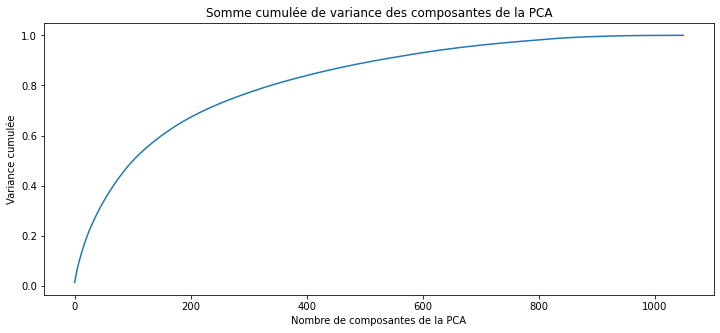

In [122]:
# Somme cumulées des variances des différentes composantes de la PCA
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de la PCA')
plt.xlabel('Nombre de composantes de la PCA')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[0])),
         np.cumsum(pca.explained_variance_ratio_))

In [123]:
#Détermination du nombre de composantes expliquant 95% de la variance
sum_pca = np.cumsum(pca.explained_variance_ratio_)
for counter, value in enumerate(sum_pca):
    if value > 0.95:
        X_reduit = pca.transform(X)[:,:counter]
        break

In [124]:
X_reduit.shape

(1050, 660)

In [125]:
print('nombre de features : {}, variance : {}'.format(counter+1,np.cumsum(pca.explained_variance_ratio_)[counter]))

nombre de features : 661, variance : 0.9502830781711218


In [126]:
# Export des données post-PCA
np.save('X_reduit_NLP.csv', X_reduit)

#### Approche par k-means et recherche du k optimal

Méthodologie naïve : On va regarder la somme des inerties des K-Means en fonction du nombre de clusters pour identifier des "drops" brutaux.

In [127]:
from sklearn.cluster import KMeans

In [128]:
from ipywidgets import IntProgress
from IPython.display import display
import time
from ipywidgets import Text

In [129]:
dict_kmeans = {}

inertie = {}

max_clusters=100

# Barre de progression pour savoir où l'on en est dans la compilation des tests.
f = IntProgress(min=1, max=max_clusters) # instantiate the bar
chaine = str(1)+'/'+str(max_clusters)
g = Text(value=chaine)
display(f) # display the bar
display(g)

## $ Barre bugguée puisqu'on ne test pas de k-means pour k= 1 $

IntProgress(value=1, min=1)

Text(value='1/100')

In [130]:
for k in range(1,max_clusters):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_reduit)
    inertie[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    f.value = k # signal to increment the progress bar
    g.value =str(k)+'/'+str(max_clusters)

Initialization complete
Iteration 0, inertia 11272655.160056124.
Iteration 1, inertia 5196939.8348547965.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 21666714.621857326.


C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Iteration 1, inertia 5196939.8348547965.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9833641.122017283.
Iteration 1, inertia 5196939.8348547965.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5874344.029452084.
Iteration 1, inertia 5196939.8348547965.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6013267.564308202.
Iteration 1, inertia 5196939.8348547965.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7756229.734988451.
Iteration 1, inertia 5196939.8348547965.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 24035691.757372547.
Iteration 1, inertia 5196939.8348547965.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5458222.674441016.
Iteration 1, inertia 5196939.8348547965.
Converged at iteration 1: strict convergence.
Initia

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5769570.412298328
Iteration 1, inertia 5171186.411986474
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 11023486.376898099
Iteration 1, inertia 5111627.891623941
Iteration 2, inertia 5108051.252791691
Iteration 3, inertia 5105437.192022884
Iteration 4, inertia 5103551.9450067645
Iteration 5, inertia 5102404.484216164
Iteration 6, inertia 5100980.904588575
Iteration 7, inertia 5100174.457337313
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 5144752.868203791
Iteration 1, inertia 5111637.280354837
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7142978.724676825
Iteration 1, inertia 5125967.653872731
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5153852.976921553
Iteration 1, inertia 5082212.291214147
Converged at iteration 1

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 5598844.395367849
Iteration 1, inertia 5050607.997176438
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5377964.941902362
Iteration 1, inertia 5021204.131017824
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5168534.261512365
Iteration 1, inertia 5095805.710602244
Iteration 2, inertia 5091931.650450409
Iteration 3, inertia 5091065.282717144
Iteration 4, inertia 5089951.044764144
Iteration 5, inertia 5089107.528959487
Iteration 6, inertia 5087317.959117156
Iteration 7, inertia 5085973.889996965
Iteration 8, inertia 5085120.201494586
Iteration 9, inertia 5084846.935294616
Iteration 10, inertia 5084760.378929773
Iteration 11, inertia 5084650.832790271
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 5810075.74448584
Iteration 1, inertia 5134549.139303332
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, ine

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 5127971.519759714
Iteration 1, inertia 4992614.678565787
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5834177.975628704
Iteration 1, inertia 5000305.9319921285
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5065140.505759043
Iteration 1, inertia 4992479.581213576
Iteration 2, inertia 4992228.823760353
Iteration 3, inertia 4991741.35385528
Iteration 4, inertia 4991613.214149914
Iteration 5, inertia 4991212.080475275
Iteration 6, inertia 4990935.15648195
Iteration 7, inertia 4990733.915664301
Iteration 8, inertia 4990332.778650311
Iteration 9, inertia 4988566.445176068
Iteration 10, inertia 4987274.473421968
Iteration 11, inertia 4986850.515136791
Iteration 12, inertia 4986427.678134929
Iteration 13, inertia 4986158.775913151
Iteration 14, inertia 4986073.88477196
Iteration 15, inertia 4985609.329648543
Iteration 16, inertia 4983560.411961042
Iteration 17, inertia 4981918.005373

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 4936428.232682699
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5347103.211871566
Iteration 1, inertia 4919832.748210181
Iteration 2, inertia 4919429.585175015
Iteration 3, inertia 4919201.4457375435
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 5246543.222706695
Iteration 1, inertia 4820278.247019956
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5181891.856591559
Iteration 1, inertia 4910507.0536827445
Iteration 2, inertia 4907813.509539929
Iteration 3, inertia 4907159.331222807
Iteration 4, inertia 4906982.016380428
Iteration 5, inertia 4906972.475952501
Iteration 6, inertia 4906928.552910051
Iteration 7, inertia 4906922.189251468
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 5292183.668059066
Iteration 1, inertia 4979547.730381373
Iteration 2, inertia 4978956.059244562
Iteration 3, ine

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 4905295.064293841
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5262971.161609765
Iteration 1, inertia 4821878.011657807
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5712493.906197323
Iteration 1, inertia 4881309.956422448
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4976291.007866657
Iteration 1, inertia 4852342.339604378
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5038398.265428038
Iteration 1, inertia 4799176.271578169
Iteration 2, inertia 4783420.3105082605
Iteration 3, inertia 4771211.3759973645
Iteration 4, inertia 4769306.277699671
Iteration 5, inertia 4769304.164350458
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4851341.018574788
Iteration 1, inertia 4816642.146000147
Converged at iteration 1: strict convergence.
Initialization co

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 7, inertia 4717052.457250731
Iteration 8, inertia 4716661.287515852
Iteration 9, inertia 4714909.969790536
Iteration 10, inertia 4713625.004432965
Iteration 11, inertia 4713207.727967402
Iteration 12, inertia 4712792.775558816
Iteration 13, inertia 4712528.436015084
Iteration 14, inertia 4712335.540275128
Iteration 15, inertia 4711973.473251348
Iteration 16, inertia 4711164.477366967
Iteration 17, inertia 4709552.542852235
Iteration 18, inertia 4708314.213154143
Iteration 19, inertia 4708129.551566683
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 5632312.2185439635
Iteration 1, inertia 4803007.789418252
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5106241.980057347
Iteration 1, inertia 4856481.759345449
Iteration 2, inertia 4855353.417228095
Iteration 3, inertia 4854740.798158087
Iteration 4, inertia 4854599.0932608545
Converged at iteration 4: strict convergence.
Initialization comple

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4847608.219712763
Iteration 1, inertia 4753870.30184052
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4862133.897637673
Iteration 1, inertia 4616388.018836813
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5583801.670044656
Iteration 1, inertia 4756170.005949196
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4683177.096214448
Iteration 1, inertia 4658914.553151451
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5127496.830347804
Iteration 1, inertia 4738775.39555656
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5024917.058195874
Iteration 1, inertia 4806811.594494427
Iteration 2, inertia 4799430.630026612
Iteration 3, inertia 4794293.629272903
Iteration 4, inertia 4793244.878675537
Iteration 5, inertia 4792486.07872994
Iteration 6, inertia 4792134.

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 4777018.800192578
Iteration 2, inertia 4758100.389980517
Iteration 3, inertia 4750592.274497069
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4840786.826719988
Iteration 1, inertia 4766880.92310094
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4769193.45711399
Iteration 1, inertia 4608483.429993585
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4720332.38824694
Iteration 1, inertia 4628573.265086346
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5537659.506540261
Iteration 1, inertia 4710911.207041533
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4847595.970644208
Iteration 1, inertia 4675079.033004084
Iteration 2, inertia 4672188.369230785
Iteration 3, inertia 4671433.297952434
Iteration 4, inertia 4671318.8330554515
Iteration 5, inertia 4671267

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4573960.390972275
Iteration 1, inertia 4526824.53758012
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4802655.93645426
Iteration 1, inertia 4556947.740881278
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4749001.648760745
Iteration 1, inertia 4653616.216123422
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5515393.714351241
Iteration 1, inertia 4689548.807175989
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5134840.377071338
Iteration 1, inertia 4683167.3146701725
Iteration 2, inertia 4682765.810654326
Iteration 3, inertia 4682537.639744652
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4924845.913617054
Iteration 1, inertia 4656740.6870320765
Iteration 2, inertia 4654035.3726713015
Iteration 3, inertia 4653500.892909617
Iteration 4, inertia 4653

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 5058416.910861734
Iteration 1, inertia 4638475.301480283
Iteration 2, inertia 4636943.963487929
Iteration 3, inertia 4636693.090337641
Iteration 4, inertia 4636567.174307579
Iteration 5, inertia 4636531.135574247
Iteration 6, inertia 4636485.769269736
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 5157455.607472387
Iteration 1, inertia 4747032.693502931
Iteration 2, inertia 4745477.578880523
Iteration 3, inertia 4739122.008330329
Iteration 4, inertia 4722865.479622257
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4834815.566487225
Iteration 1, inertia 4557549.480559541
Iteration 2, inertia 4540403.219364508
Iteration 3, inertia 4537111.758223342
Iteration 4, inertia 4535599.969170044
Iteration 5, inertia 4535408.713438609
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4890539.587389921
Iteration 1, inertia 4759582.979242433
Iteration 

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 4771821.216292946
Iteration 1, inertia 4590902.540429316
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4691511.522584617
Iteration 1, inertia 4602947.033402255
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4923328.700690468
Iteration 1, inertia 4641854.75093231
Iteration 2, inertia 4622936.080468952
Iteration 3, inertia 4615427.91021372
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4661994.4796790285
Iteration 1, inertia 4577184.160995106
Iteration 2, inertia 4575342.817531784
Iteration 3, inertia 4575106.459441202
Iteration 4, inertia 4575034.653194482
Iteration 5, inertia 4575015.24168621
Iteration 6, inertia 4574996.676909892
Iteration 7, inertia 4574995.652435823
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 4709892.642870985
Iteration 1, inertia 4528838.203094

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4715572.095342849
Iteration 1, inertia 4628117.188178463
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4661769.224998236
Iteration 1, inertia 4624634.806112024
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4697560.505864884
Iteration 1, inertia 4558729.045933471
Iteration 2, inertia 4553126.919457732
Iteration 3, inertia 4548329.927403305
Iteration 4, inertia 4540408.958046245
Iteration 5, inertia 4540408.528007367
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4730935.103571223
Iteration 1, inertia 4634961.809296953
Iteration 2, inertia 4634752.309211544
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4595570.246680303
Iteration 1, inertia 4522024.138251341
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4857846.761167252
Iteration 1, inertia 45794

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4579495.772220849
Iteration 1, inertia 4503447.10285897
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4969761.94064425
Iteration 1, inertia 4616954.5100142965
Iteration 2, inertia 4614738.598231649
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4796290.178724443
Iteration 1, inertia 4506770.968698428
Iteration 2, inertia 4496693.258952943
Iteration 3, inertia 4491502.067152568
Iteration 4, inertia 4488396.4876604285
Iteration 5, inertia 4486559.022340543
Iteration 6, inertia 4485151.11258832
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4621539.241447024
Iteration 1, inertia 4519589.523741402
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4533780.1067518685
Iteration 1, inertia 4451739.422767944
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 45677

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4485968.085890103
Iteration 1, inertia 4398112.466354119
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4884640.195985931
Iteration 1, inertia 4501252.135100948
Iteration 2, inertia 4488680.417134072
Iteration 3, inertia 4477008.965079298
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4803356.208908081
Iteration 1, inertia 4585223.596653708
Iteration 2, inertia 4584865.217239324
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4607085.221163314
Iteration 1, inertia 4373320.219249406
Iteration 2, inertia 4361187.6156879235
Iteration 3, inertia 4354244.227541823
Iteration 4, inertia 4349929.51229448
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4824816.36680855
Iteration 1, inertia 4434784.69723288
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4551837

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 2, inertia 4552121.504730127
Iteration 3, inertia 4551694.72675241
Iteration 4, inertia 4551151.592527357
Iteration 5, inertia 4550468.574093404
Iteration 6, inertia 4550226.004101535
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4498079.34111471
Iteration 1, inertia 4396265.656712184
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4765954.382227258
Iteration 1, inertia 4427869.731759009
Iteration 2, inertia 4422824.463700426
Iteration 3, inertia 4401947.34851042
Iteration 4, inertia 4394158.087637746
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4509716.62274187
Iteration 1, inertia 4422603.119844393
Iteration 2, inertia 4418757.190980186
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4497843.414716932
Iteration 1, inertia 4417708.057573222
Converged at iteration 1: strict convergence.
Initialization 

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4545652.695429755
Iteration 1, inertia 4418917.137782434
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4682112.107138329
Iteration 1, inertia 4388672.815901921
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4447684.172888174
Iteration 1, inertia 4417349.634868329
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4485077.942635719
Iteration 1, inertia 4384459.329943573
Iteration 2, inertia 4384097.413147337
Iteration 3, inertia 4383892.389351387
Iteration 4, inertia 4383775.640024766
Iteration 5, inertia 4383540.384600784
Iteration 6, inertia 4382677.162811081
Iteration 7, inertia 4379375.700131342
Iteration 8, inertia 4378569.428217304
Iteration 9, inertia 4376749.193279932
Iteration 10, inertia 4375188.518294871
Iteration 11, inertia 4375014.8324323185
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, i

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4451517.52032835
Iteration 1, inertia 4363417.036103404
Iteration 2, inertia 4359703.33139261
Iteration 3, inertia 4358452.654018096
Iteration 4, inertia 4357981.183282604
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4591569.363445487
Iteration 1, inertia 4423355.487580695
Iteration 2, inertia 4417285.24034089
Iteration 3, inertia 4414745.387071484
Iteration 4, inertia 4413966.969456365
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4432078.193206736
Iteration 1, inertia 4373991.889498495
Iteration 2, inertia 4371122.356558525
Iteration 3, inertia 4369130.963878686
Iteration 4, inertia 4366736.25645826
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4487750.51158526
Iteration 1, inertia 4311157.752278655
Iteration 2, inertia 4293355.297973056
Iteration 3, inertia 4287954.978277592
Converged at iteration 3: strict convergence.
Initiali

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4623187.222615559
Iteration 1, inertia 4272111.6525199795
Iteration 2, inertia 4258374.935559654
Iteration 3, inertia 4258353.560656352
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4421207.908343564
Iteration 1, inertia 4395201.063799492
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4300722.297592424
Iteration 1, inertia 4277456.48253488
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4436669.508132392
Iteration 1, inertia 4363092.715004403
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4328187.541926814
Iteration 1, inertia 4288578.606946049
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4434915.237434738
Iteration 1, inertia 4383107.326160949
Iteration 2, inertia 4378343.590106645
Iteration 3, inertia 4377859.623932697
Iteration 4, inertia 43777

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 4301856.048897855
Iteration 2, inertia 4298302.741244526
Iteration 3, inertia 4296761.692492341
Iteration 4, inertia 4296270.408520668
Iteration 5, inertia 4295979.109989687
Iteration 6, inertia 4295666.4378998345
Iteration 7, inertia 4295382.181954313
Iteration 8, inertia 4295189.317031556
Iteration 9, inertia 4294867.130371183
Iteration 10, inertia 4294700.279854499
Iteration 11, inertia 4294620.8178216955
Iteration 12, inertia 4294350.527322283
Iteration 13, inertia 4293209.667781915
Iteration 14, inertia 4291626.716454052
Iteration 15, inertia 4291345.393692509
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 4351120.358782376
Iteration 1, inertia 4249786.397177669
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4415502.563476739
Iteration 1, inertia 4320685.345501732
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4281544.858695035
I

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4541708.4329392295
Iteration 1, inertia 4344894.774173816
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4272039.819726519
Iteration 1, inertia 4216496.863751562
Iteration 2, inertia 4214706.7167874025
Iteration 3, inertia 4214172.735910433
Iteration 4, inertia 4214157.333471516
Iteration 5, inertia 4214145.111882587
Iteration 6, inertia 4214142.905210512
Iteration 7, inertia 4214110.222828367
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 4435284.572207099
Iteration 1, inertia 4294532.676391287
Iteration 2, inertia 4284582.694591218
Iteration 3, inertia 4281176.893814538
Iteration 4, inertia 4280693.364086467
Iteration 5, inertia 4280594.991497625
Iteration 6, inertia 4280579.902610222
Iteration 7, inertia 4280551.248249223
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 4539665.379805671
Iteration 1, inertia 4274183.061941201
Iteratio

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4317869.499021563
Iteration 1, inertia 4219945.564307019
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4221125.112559627
Iteration 1, inertia 4170218.8909838633
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4381218.72252496
Iteration 1, inertia 4231745.585682242
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4394911.85569342
Iteration 1, inertia 4302783.4601432765
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4374566.4727170225
Iteration 1, inertia 4270527.494546081
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4364703.728642407
Iteration 1, inertia 4244203.7763858875
Iteration 2, inertia 4243324.899562751
Iteration 3, inertia 4242886.466916057
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4368727.765

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4412447.730408975
Iteration 1, inertia 4271269.924231559
Iteration 2, inertia 4262695.113693605
Iteration 3, inertia 4262461.965874837
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4300136.72746308
Iteration 1, inertia 4140312.7261107946
Iteration 2, inertia 4140126.670235244
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4296885.408900657
Iteration 1, inertia 4237619.746999792
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4441876.383082046
Iteration 1, inertia 4142785.7546310085
Iteration 2, inertia 4142732.8352480805
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4379984.475771013
Iteration 1, inertia 4336485.324221652
Iteration 2, inertia 4312215.4440484885
Iteration 3, inertia 4311424.27144067
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 439

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4201463.316259756
Iteration 1, inertia 4097846.6849219454
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4270247.811878759
Iteration 1, inertia 4239854.743999777
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4219596.713516537
Iteration 1, inertia 4131216.623076601
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4268040.507353268
Iteration 1, inertia 4186574.364639864
Iteration 2, inertia 4186246.9390626797
Iteration 3, inertia 4186001.7224359415
Iteration 4, inertia 4185461.7767472668
Iteration 5, inertia 4180026.423973174
Iteration 6, inertia 4170568.104886541
Iteration 7, inertia 4169816.329316914
Iteration 8, inertia 4169658.869297141
Iteration 9, inertia 4169540.451122511
Iteration 10, inertia 4169499.4901985265
Iteration 11, inertia 4169451.9945572233
Converged at iteration 11: strict convergence.
Initialization complete
Iteration

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4351624.64677138
Iteration 1, inertia 4183799.945178316
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4156198.083084426
Iteration 1, inertia 4106513.2100008964
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4244407.035430275
Iteration 1, inertia 4189903.356792634
Iteration 2, inertia 4183083.000994243
Iteration 3, inertia 4178944.0044683213
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 4261744.205624799
Iteration 1, inertia 4184993.1488032877
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4300923.242618888
Iteration 1, inertia 4218125.111764658
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4268584.298651249
Iteration 1, inertia 4205619.826003341
Iteration 2, inertia 4197788.397089415
Converged at iteration 2: strict convergence.
Initialization co

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 4351542.286050775
Iteration 1, inertia 4104351.8675280684
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4235817.789936541
Iteration 1, inertia 4162317.1075364044
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4132711.7107229573
Iteration 1, inertia 4074291.493803266
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4518671.547559755
Iteration 1, inertia 4262048.672890024
Iteration 2, inertia 4260154.097036789
Iteration 3, inertia 4259906.320860349
Iteration 4, inertia 4259770.9811680205
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4459807.881469142
Iteration 1, inertia 4118859.785909222
Iteration 2, inertia 4116839.441838158
Iteration 3, inertia 4114469.7079358525
Iteration 4, inertia 4111499.027303095
Iteration 5, inertia 4106377.42262054
Iteration 6, inertia 4103240.

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4147500.058492382
Iteration 1, inertia 4056824.9780191435
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4115567.824010796
Iteration 1, inertia 4052338.5941818096
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4217610.3271311
Iteration 1, inertia 4140929.196452
Iteration 2, inertia 4139375.0005582175
Iteration 3, inertia 4128120.3070700155
Iteration 4, inertia 4125112.335062878
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4240403.570374481
Iteration 1, inertia 4192167.0446325005
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4288957.767227909
Iteration 1, inertia 4151482.1356214243
Iteration 2, inertia 4151240.21276597
Iteration 3, inertia 4150757.0989051536
Iteration 4, inertia 4150633.5826399066
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 424

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 7, inertia 4049853.278090857
Iteration 8, inertia 4048142.170491117
Iteration 9, inertia 4046630.878282062
Iteration 10, inertia 4046070.7731769313
Iteration 11, inertia 4045225.970322006
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 4136726.8191988263
Iteration 1, inertia 4019457.0020109187
Iteration 2, inertia 4019276.322693347
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4105757.7874980713
Iteration 1, inertia 4071255.0650322875
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4122442.575603794
Iteration 1, inertia 4062507.8361853887
Iteration 2, inertia 4061473.698591787
Iteration 3, inertia 4058823.5507861795
Iteration 4, inertia 4057714.431762227
Iteration 5, inertia 4052480.4137404105
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4135789.1990424725
Iteration 1, inertia 4037365.7911302014
Conve

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 4083306.1673906823
Iteration 1, inertia 4039889.1740942337
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4104022.15102011
Iteration 1, inertia 4021694.5822835923
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4129192.886347303
Iteration 1, inertia 4031036.2037796406
Iteration 2, inertia 4028529.366628481
Iteration 3, inertia 4024252.8240835085
Iteration 4, inertia 4016432.8570198556
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4079564.5326661756
Iteration 1, inertia 4009549.911221492
Iteration 2, inertia 4002246.3408732484
Iteration 3, inertia 4000038.6802969864
Iteration 4, inertia 3996703.8189009796
Iteration 5, inertia 3996429.4105926296
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4201960.159369487
Iteration 1, inertia 4106785.02193055
Iteration 2, inertia 408

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4115680.957660065
Iteration 1, inertia 4066380.0482312776
Iteration 2, inertia 4066320.987995271
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4112206.856698454
Iteration 1, inertia 4073637.360027908
Iteration 2, inertia 4073228.328374809
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4064328.1515043955
Iteration 1, inertia 4005820.7417186513
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4085020.9400792182
Iteration 1, inertia 3983294.86563431
Iteration 2, inertia 3979075.091070955
Iteration 3, inertia 3974437.6690048245
Iteration 4, inertia 3966655.8555403836
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4044871.747299623
Iteration 1, inertia 3970509.5353593687
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4113857.504947745
Iteration 1, inertia

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4234071.171940409
Iteration 1, inertia 3948027.2310586497
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4114093.7914991146
Iteration 1, inertia 3923763.1146529606
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3940928.316794047
Iteration 1, inertia 3910079.119692493
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4223447.391640145
Iteration 1, inertia 4004197.987179054
Iteration 2, inertia 4003339.9394758646
Iteration 3, inertia 4003117.2380385026
Iteration 4, inertia 4003113.642184035
Iteration 5, inertia 4003105.168520751
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4042045.623604529
Iteration 1, inertia 3957772.113671484
Iteration 2, inertia 3952646.7904815506
Iteration 3, inertia 3945652.9828774505
Iteration 4, inertia 3941994.987340981
Converged at iteration 4: strict convergence.
Init

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4085320.66907516
Iteration 1, inertia 3944319.2010076866
Iteration 2, inertia 3943519.6125088884
Iteration 3, inertia 3943313.6408603736
Iteration 4, inertia 3943223.670236923
Iteration 5, inertia 3943159.1494117985
Iteration 6, inertia 3943148.6576489825
Iteration 7, inertia 3943134.1204758906
Iteration 8, inertia 3943132.2642029757
Iteration 9, inertia 3943115.005217801
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 4025323.948555233
Iteration 1, inertia 3863540.875181522
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4106727.873430869
Iteration 1, inertia 4005219.006280513
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4061088.3250013664
Iteration 1, inertia 3977499.574706012
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4146561.380411813
Iteration 1, inertia 3999224.360900305
Iteration 2

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4171719.0565233887
Iteration 1, inertia 3925974.937078966
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4201081.51233202
Iteration 1, inertia 4092371.607986058
Iteration 2, inertia 4083895.0497108484
Iteration 3, inertia 4078399.8635951597
Iteration 4, inertia 4077605.671387452
Iteration 5, inertia 4076940.984472963
Iteration 6, inertia 4076886.633549517
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 4056129.0603136085
Iteration 1, inertia 3863125.1730961394
Iteration 2, inertia 3860435.8065973
Iteration 3, inertia 3860160.9822259396
Iteration 4, inertia 3860098.9443730246
Iteration 5, inertia 3860070.0657039755
Iteration 6, inertia 3860051.9186745207
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3978601.009539224
Iteration 1, inertia 3891260.7900264096
Iteration 2, inertia 3890855.6556866653
Converged at iteration 2: strict converge

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4028749.516032797
Iteration 1, inertia 3952282.3572361795
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3988251.7067050287
Iteration 1, inertia 3876710.5219476786
Iteration 2, inertia 3875998.367961808
Iteration 3, inertia 3875915.642431765
Iteration 4, inertia 3875865.6535552666
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4125708.7849200726
Iteration 1, inertia 3928118.7920181123
Iteration 2, inertia 3924984.8711526743
Iteration 3, inertia 3918007.2173249326
Iteration 4, inertia 3910436.152477127
Iteration 5, inertia 3905733.910052704
Iteration 6, inertia 3902948.140663191
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3975083.8594343513
Iteration 1, inertia 3842261.4946837025
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4109978.6312394463
Iteration 1, inertia 4003799.05688852
Converge

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 3816023.5563268606
Iteration 2, inertia 3806775.28706952
Iteration 3, inertia 3803881.9703438343
Iteration 4, inertia 3798893.6856854865
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3952465.398953449
Iteration 1, inertia 3888419.8389325184
Iteration 2, inertia 3880540.6214174787
Iteration 3, inertia 3878884.5757140038
Iteration 4, inertia 3878336.20241529
Iteration 5, inertia 3877836.3581715203
Iteration 6, inertia 3877798.59458211
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3963743.287311925
Iteration 1, inertia 3859829.712760934
Iteration 2, inertia 3855552.6967550297
Iteration 3, inertia 3850421.2243495462
Iteration 4, inertia 3844315.1637648935
Iteration 5, inertia 3840790.6431216816
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 4125205.359846717
Iteration 1, inertia 3939447.697925166
Converged at iteration 1: strict converge

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4049447.597625714
Iteration 1, inertia 3942349.554251512
Iteration 2, inertia 3942006.487432284
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4062812.6060642037
Iteration 1, inertia 3881677.97268454
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3922803.341853724
Iteration 1, inertia 3872826.4174393383
Iteration 2, inertia 3866880.394534688
Iteration 3, inertia 3865565.1739683067
Iteration 4, inertia 3864737.0547130704
Iteration 5, inertia 3864570.193739387
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3833455.7483386993
Iteration 1, inertia 3777923.36967202
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3907333.813370735
Iteration 1, inertia 3743034.7171772835
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4049787.556997272
Iteration 1, inertia 3

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 3798297.9492515516
Iteration 2, inertia 3790464.6310355132
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 4114477.5908436696
Iteration 1, inertia 3815669.3512227535
Iteration 2, inertia 3813926.327928838
Iteration 3, inertia 3813884.042099175
Iteration 4, inertia 3813857.5186730893
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 4162793.11287471
Iteration 1, inertia 3974991.959123669
Iteration 2, inertia 3960264.078980652
Iteration 3, inertia 3959190.388008787
Iteration 4, inertia 3957031.602793783
Iteration 5, inertia 3956837.68529329
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3898640.868719061
Iteration 1, inertia 3814221.2069238103
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3962132.2176825544
Iteration 1, inertia 3897323.9667424425
Iteration 2, inertia 3896259.816002116
Converged at

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4014415.4452901063
Iteration 1, inertia 3798200.989968242
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3926125.78427705
Iteration 1, inertia 3824501.4585130885
Iteration 2, inertia 3822285.2785381223
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3975001.947377765
Iteration 1, inertia 3883388.1488293223
Iteration 2, inertia 3867850.135739678
Iteration 3, inertia 3862517.003855548
Iteration 4, inertia 3859372.002754456
Iteration 5, inertia 3857183.504118275
Iteration 6, inertia 3857172.070170077
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3825033.039079949
Iteration 1, inertia 3724174.1190103353
Iteration 2, inertia 3722829.6899154265
Iteration 3, inertia 3721179.092540428
Iteration 4, inertia 3720919.8460491756
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3811306.1568998247
Iteration 1

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 4079854.1550902827
Iteration 1, inertia 3843576.891936121
Iteration 2, inertia 3842957.8855708595
Iteration 3, inertia 3840309.236434693
Iteration 4, inertia 3840216.396253983
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3834421.2055965387
Iteration 1, inertia 3752518.4968998306
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3958496.350528882
Iteration 1, inertia 3855995.5430760374
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3993925.6423177416
Iteration 1, inertia 3841210.0365427495
Iteration 2, inertia 3836764.168142003
Iteration 3, inertia 3832598.3239931157
Iteration 4, inertia 3829754.021681119
Iteration 5, inertia 3828420.0988753224
Iteration 6, inertia 3827622.751018718
Iteration 7, inertia 3827448.090265241
Iteration 8, inertia 3827419.563691772
Iteration 9, inertia 3827324.1397256604
Converged at iteration 9: strict conver

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 3739277.2193526225
Iteration 2, inertia 3737831.876503944
Iteration 3, inertia 3737193.066946598
Iteration 4, inertia 3737151.172191584
Iteration 5, inertia 3737051.714948259
Iteration 6, inertia 3736804.2638192712
Iteration 7, inertia 3736656.6215634635
Iteration 8, inertia 3736269.5258476897
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3925210.616013649
Iteration 1, inertia 3828726.947684851
Iteration 2, inertia 3797148.327509937
Iteration 3, inertia 3792886.983591568
Iteration 4, inertia 3792597.784121867
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3866084.440028815
Iteration 1, inertia 3745366.3174018073
Iteration 2, inertia 3744973.849724575
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3822977.753061569
Iteration 1, inertia 3734510.118105985
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, 

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 4, inertia 3695621.541390206
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3876296.322890692
Iteration 1, inertia 3819051.7105935244
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3930472.4875465413
Iteration 1, inertia 3657354.0797976535
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3854691.0190728516
Iteration 1, inertia 3737766.8093023566
Iteration 2, inertia 3734164.008880537
Iteration 3, inertia 3733383.702149941
Iteration 4, inertia 3731476.5127794794
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3834835.9188144985
Iteration 1, inertia 3735956.5884519294
Iteration 2, inertia 3731535.8412281643
Iteration 3, inertia 3729152.926532785
Iteration 4, inertia 3726267.3942903173
Iteration 5, inertia 3726013.46220193
Iteration 6, inertia 3725746.5816964773
Iteration 7, inertia 3725694.42051493
Iteration

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3673380.1552913925
Iteration 1, inertia 3613450.4265069147
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3836168.6003231937
Iteration 1, inertia 3665393.281942299
Iteration 2, inertia 3662021.1175832744
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3853809.2421196415
Iteration 1, inertia 3733590.271906968
Iteration 2, inertia 3731373.9382987963
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3708674.2910285
Iteration 1, inertia 3646844.989974627
Iteration 2, inertia 3646785.931392383
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3824308.9972209516
Iteration 1, inertia 3726877.553586258
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3713367.159658704
Iteration 1, inertia 3666560.0783677576
Iteration 2, inertia 3665186.771118952
Converged at iterati

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3832870.5167610724
Iteration 1, inertia 3722320.377957191
Iteration 2, inertia 3718015.1503060926
Iteration 3, inertia 3715854.5994641376
Iteration 4, inertia 3712166.7952163196
Iteration 5, inertia 3703249.352456173
Iteration 6, inertia 3697260.0224991757
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3744271.3558447086
Iteration 1, inertia 3661344.0965311243
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3651706.428904857
Iteration 1, inertia 3611434.972032997
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3676106.484664406
Iteration 1, inertia 3615859.89419759
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3837574.6230542865
Iteration 1, inertia 3735348.370470148
Iteration 2, inertia 3735058.511223892
Iteration 3, inertia 3735020.5801742147
Converged at iteration 3:

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 3620164.994537612
Iteration 2, inertia 3619710.4759922214
Iteration 3, inertia 3618010.3888043766
Iteration 4, inertia 3617587.0278336066
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3762753.411286606
Iteration 1, inertia 3676152.5978166456
Iteration 2, inertia 3673423.639907538
Iteration 3, inertia 3672755.505872749
Iteration 4, inertia 3672030.690280466
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3719745.8678901414
Iteration 1, inertia 3632354.0914598545
Iteration 2, inertia 3632224.488751503
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3729865.163788022
Iteration 1, inertia 3667887.4735307256
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3679025.207588599
Iteration 1, inertia 3625042.31555553
Iteration 2, inertia 3622569.8038071007
Converged at iteration 2: strict convergence.
Init

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3676326.0360962986
Iteration 1, inertia 3594675.855599619
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3677066.345457345
Iteration 1, inertia 3634322.48818096
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3864844.9015552276
Iteration 1, inertia 3607608.497919936
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3687625.8149226955
Iteration 1, inertia 3606579.240338289
Iteration 2, inertia 3606378.8872420033
Iteration 3, inertia 3606045.87749689
Iteration 4, inertia 3605560.1467671166
Iteration 5, inertia 3605304.9596048766
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3844565.1625695652
Iteration 1, inertia 3748476.952926806
Iteration 2, inertia 3744350.1754727634
Iteration 3, inertia 3742932.2554753944
Iteration 4, inertia 3742184.1927623637
Iteration 5, inertia 3740

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3733376.351409624
Iteration 1, inertia 3635626.959400317
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3725454.751967802
Iteration 1, inertia 3637457.720984722
Iteration 2, inertia 3636471.5253498848
Iteration 3, inertia 3635526.4274782
Iteration 4, inertia 3633409.4107540385
Iteration 5, inertia 3632407.1837654267
Iteration 6, inertia 3632379.7063682135
Iteration 7, inertia 3632373.3633141853
Iteration 8, inertia 3632234.7935631117
Iteration 9, inertia 3630791.173102399
Iteration 10, inertia 3629334.522449215
Iteration 11, inertia 3628009.001999781
Iteration 12, inertia 3626204.04831042
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 3716832.585123915
Iteration 1, inertia 3624432.621300483
Iteration 2, inertia 3623249.25603272
Iteration 3, inertia 3623060.3894644273
Iteration 4, inertia 3623043.547814678
Converged at iteration 4: strict convergence.
Ini

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3823584.961623707
Iteration 1, inertia 3665608.642461795
Iteration 2, inertia 3662282.558312446
Iteration 3, inertia 3660151.5665952847
Iteration 4, inertia 3658442.9952949276
Iteration 5, inertia 3654966.0480305497
Iteration 6, inertia 3652901.5569447665
Iteration 7, inertia 3652743.368853587
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3656639.7555953157
Iteration 1, inertia 3579871.5339371837
Iteration 2, inertia 3571826.2314193426
Iteration 3, inertia 3570354.3067860845
Iteration 4, inertia 3570101.7583715306
Iteration 5, inertia 3570052.792629681
Iteration 6, inertia 3569988.7381867548
Iteration 7, inertia 3569952.9804980233
Iteration 8, inertia 3569951.7995647117
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3575205.4267380876
Iteration 1, inertia 3528363.6579077444
Iteration 2, inertia 3520873.0724359117
Iteration 3, inertia 3516893.7541113766
Iteration 4, inertia 3514

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3716411.8167941533
Iteration 1, inertia 3601001.052994574
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3723642.620159038
Iteration 1, inertia 3594006.9995181053
Iteration 2, inertia 3593119.8845258285
Iteration 3, inertia 3593017.453987277
Iteration 4, inertia 3592867.0693516037
Iteration 5, inertia 3592736.281932515
Iteration 6, inertia 3592665.9085882376
Iteration 7, inertia 3592514.3127552294
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3691649.2233465323
Iteration 1, inertia 3568344.5049657114
Iteration 2, inertia 3568087.651548507
Iteration 3, inertia 3568010.314327887
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3637537.2857678435
Iteration 1, inertia 3581359.1194338542
Iteration 2, inertia 3581189.8278250033
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3594705.908622168
Iteration 1, inertia 3504154.857694039
Iteration 2, inertia 3503180.4354117275
Iteration 3, inertia 3502949.804050451
Iteration 4, inertia 3502875.073146451
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3635888.9313444076
Iteration 1, inertia 3546199.578375553
Iteration 2, inertia 3545608.2275186824
Iteration 3, inertia 3545330.842712532
Iteration 4, inertia 3545165.304252878
Iteration 5, inertia 3545083.307628983
Iteration 6, inertia 3544881.3052017763
Iteration 7, inertia 3544698.3505220897
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3580873.2769783046
Iteration 1, inertia 3510509.084295545
Iteration 2, inertia 3508471.1825069534
Iteration 3, inertia 3508335.1666520387
Iteration 4, inertia 3508318.1758218054
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3556647.985287882
Iteration 1, ine

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3577804.4315655213
Iteration 1, inertia 3487368.19711995
Iteration 2, inertia 3486393.3630562434
Iteration 3, inertia 3486162.599697312
Iteration 4, inertia 3486087.8614741527
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3817581.406816642
Iteration 1, inertia 3593213.1366207497
Iteration 2, inertia 3590806.2822098667
Iteration 3, inertia 3586732.48079635
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3580846.086551075
Iteration 1, inertia 3495662.788952734
Iteration 2, inertia 3487429.710858197
Iteration 3, inertia 3487338.0964553333
Iteration 4, inertia 3486247.159560262
Iteration 5, inertia 3484696.309513531
Iteration 6, inertia 3483446.8211772414
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3498425.819346204
Iteration 1, inertia 3445475.9117002347
Iteration 2, inertia 3445241.325028148
Iteration 3, inerti

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3567615.637095145
Iteration 1, inertia 3477331.4220629637
Iteration 2, inertia 3476340.0612054123
Iteration 3, inertia 3476129.5074355663
Iteration 4, inertia 3476028.537959844
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3627643.807746687
Iteration 1, inertia 3518628.9594162307
Iteration 2, inertia 3503587.342885863
Iteration 3, inertia 3491841.02410504
Iteration 4, inertia 3489426.24113314
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3511024.7923168433
Iteration 1, inertia 3406232.152302348
Iteration 2, inertia 3404015.6673911265
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3556926.8003174295
Iteration 1, inertia 3491850.4980025548
Iteration 2, inertia 3476702.9391605053
Iteration 3, inertia 3472522.5966419294
Iteration 4, inertia 3472232.547956311
Converged at iteration 4: strict convergence.
Initializa

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3509813.508051516
Iteration 1, inertia 3424725.9077742165
Iteration 2, inertia 3421556.319797082
Iteration 3, inertia 3421529.600410508
Iteration 4, inertia 3421513.581689567
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3519983.6562705394
Iteration 1, inertia 3416726.818700982
Iteration 2, inertia 3406184.744757351
Iteration 3, inertia 3405052.451357346
Iteration 4, inertia 3403262.7588859107
Iteration 5, inertia 3402824.5292888256
Iteration 6, inertia 3402722.328184848
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3633001.327923986
Iteration 1, inertia 3468236.8669139207
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3498042.8298571603
Iteration 1, inertia 3423179.8151772055
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3604812.850357874
Iteration 1, inertia 34928

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3538383.051869232
Iteration 1, inertia 3443232.16980656
Iteration 2, inertia 3442238.6876134914
Iteration 3, inertia 3442027.695580344
Iteration 4, inertia 3441926.6875655283
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3490209.813528771
Iteration 1, inertia 3429782.6763877138
Iteration 2, inertia 3421401.1920771855
Iteration 3, inertia 3420060.0937338104
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3469874.709214871
Iteration 1, inertia 3435120.1300952635
Iteration 2, inertia 3432004.017169502
Iteration 3, inertia 3429479.449396528
Iteration 4, inertia 3425189.9260078114
Iteration 5, inertia 3423885.2480432307
Iteration 6, inertia 3423494.7282698425
Iteration 7, inertia 3423236.2143506147
Iteration 8, inertia 3423032.7821295233
Iteration 9, inertia 3422818.5724350773
Iteration 10, inertia 3422787.6410789834
Iteration 11, inertia 3422666.2323943945
Iteration 12, inertia 3422

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3549463.9443046874
Iteration 1, inertia 3491137.071881915
Iteration 2, inertia 3488543.964247251
Iteration 3, inertia 3487939.934508954
Iteration 4, inertia 3487651.472924736
Iteration 5, inertia 3487550.5485751517
Iteration 6, inertia 3487241.399081846
Iteration 7, inertia 3487163.4575136364
Iteration 8, inertia 3486994.3147921963
Iteration 9, inertia 3486765.3626192315
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 3419300.0117133535
Iteration 1, inertia 3358042.674385759
Iteration 2, inertia 3356756.7782114884
Iteration 3, inertia 3356697.2066367483
Iteration 4, inertia 3356452.9445057
Iteration 5, inertia 3356429.5163186872
Iteration 6, inertia 3356371.9492917084
Iteration 7, inertia 3356305.6383411833
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3506633.3053836543
Iteration 1, inertia 3315208.8301131604
Iteration 2, inertia 3312992.166654055
Conver

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3571653.775277607
Iteration 1, inertia 3390293.2320559956
Iteration 2, inertia 3382458.6203842373
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3479550.873876575
Iteration 1, inertia 3395676.24850415
Iteration 2, inertia 3394138.008876723
Iteration 3, inertia 3393793.6042485037
Iteration 4, inertia 3393450.1291827993
Iteration 5, inertia 3393176.7736313413
Iteration 6, inertia 3393151.017278861
Iteration 7, inertia 3393145.789127675
Iteration 8, inertia 3393024.5543231317
Iteration 9, inertia 3392846.709869442
Iteration 10, inertia 3392785.875857472
Iteration 11, inertia 3392567.841200234
Iteration 12, inertia 3392420.420334594
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 3559910.7064156327
Iteration 1, inertia 3379512.795925923
Iteration 2, inertia 3375362.063412442
Iteration 3, inertia 3374669.1343819783
Iteration 4, inertia 3373727.221593284
Conver

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3365471.701568338
Iteration 1, inertia 3326431.6944617485
Iteration 2, inertia 3323583.228722996
Iteration 3, inertia 3321878.5199279673
Iteration 4, inertia 3321201.315191471
Iteration 5, inertia 3320931.2916009454
Iteration 6, inertia 3320820.4713393836
Iteration 7, inertia 3320631.036283321
Iteration 8, inertia 3320514.763220741
Iteration 9, inertia 3320447.4309380893
Iteration 10, inertia 3320314.065787942
Iteration 11, inertia 3320128.544401798
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 3415987.795409172
Iteration 1, inertia 3319817.946714317
Iteration 2, inertia 3313003.2140098047
Iteration 3, inertia 3307557.029209552
Iteration 4, inertia 3305302.631746902
Iteration 5, inertia 3304751.1660495447
Iteration 6, inertia 3304566.048256759
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3557704.6362709864
Iteration 1, inertia 3419744.5741000837
Iteration 2, inertia 3417817.

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3459672.9173401184
Iteration 1, inertia 3356451.401468197
Iteration 2, inertia 3355455.896632281
Iteration 3, inertia 3355244.1281608506
Iteration 4, inertia 3355169.3782053054
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3503497.955317441
Iteration 1, inertia 3366693.2307443833
Iteration 2, inertia 3366056.269831282
Iteration 3, inertia 3365884.961255634
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3438675.976247559
Iteration 1, inertia 3382000.5496492563
Iteration 2, inertia 3377649.076492094
Iteration 3, inertia 3374501.523182695
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3391105.143243324
Iteration 1, inertia 3344718.872921493
Iteration 2, inertia 3335329.179203482
Iteration 3, inertia 3331305.5750803733
Iteration 4, inertia 3331283.59738207
Iteration 5, inertia 3331272.3785950015
Converged at iteration 5: strict convergenc

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3425670.7870797385
Iteration 1, inertia 3322607.794312674
Iteration 2, inertia 3321611.2889214563
Iteration 3, inertia 3321399.0497256336
Iteration 4, inertia 3321324.2918625805
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3429824.360157558
Iteration 1, inertia 3340493.863983315
Iteration 2, inertia 3338614.3358937814
Iteration 3, inertia 3337690.4106105925
Iteration 4, inertia 3337680.6114485664
Iteration 5, inertia 3337651.9032074423
Iteration 6, inertia 3337611.097236445
Iteration 7, inertia 3337595.5466828225
Iteration 8, inertia 3337567.785813376
Iteration 9, inertia 3337535.1624737955
Iteration 10, inertia 3337499.0433995253
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 3469484.052577335
Iteration 1, inertia 3356050.004414986
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3408544.964645856
Iteration 1,

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3353572.052775195
Iteration 1, inertia 3250689.957291559
Iteration 2, inertia 3243261.8176998654
Iteration 3, inertia 3240546.167513844
Iteration 4, inertia 3239753.061853943
Iteration 5, inertia 3238784.308677959
Iteration 6, inertia 3237930.726709839
Iteration 7, inertia 3237665.130153332
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3311278.4741711756
Iteration 1, inertia 3279284.8188819326
Iteration 2, inertia 3279225.7506522336
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3452933.0551002277
Iteration 1, inertia 3293770.2744014547
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3340946.347110837
Iteration 1, inertia 3302885.9703539736
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3364826.6227786597
Iteration 1, inertia 3280859.5250687776
Iteration 2, inertia 327

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3430706.3466638876
Iteration 1, inertia 3369005.051806174
Iteration 2, inertia 3363187.1707922188
Iteration 3, inertia 3360915.733546801
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3295771.334019466
Iteration 1, inertia 3221928.614783215
Iteration 2, inertia 3220564.402252057
Iteration 3, inertia 3219642.558020347
Iteration 4, inertia 3219494.4199978965
Iteration 5, inertia 3219274.0041722367
Iteration 6, inertia 3218736.302748881
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3426243.047725931
Iteration 1, inertia 3334647.616962502
Iteration 2, inertia 3333651.060590762
Iteration 3, inertia 3332194.6870207367
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3359402.0260256208
Iteration 1, inertia 3267071.569478516
Iteration 2, inertia 3261729.5481070084
Iteration 3, inertia 3259787.7747885305
Iteration 4, inertia 3259439.0042468105
I

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3376235.5339378454
Iteration 1, inertia 3274246.5988025125
Iteration 2, inertia 3273510.0513918414
Iteration 3, inertia 3273440.7484632465
Iteration 4, inertia 3273319.8605671744
Iteration 5, inertia 3273242.361000527
Iteration 6, inertia 3273236.878449979
Iteration 7, inertia 3273125.9509574524
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3379184.8536405973
Iteration 1, inertia 3292439.476547344
Iteration 2, inertia 3292026.3076050677
Iteration 3, inertia 3291992.989228044
Iteration 4, inertia 3291986.2894119313
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3336269.0717474893
Iteration 1, inertia 3281215.7339601032
Iteration 2, inertia 3273380.969953522
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3277535.6127614155
Iteration 1, inertia 3212863.1781432224
Converged at iteration 1: strict convergence.
Initi

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3454603.1073583267
Iteration 1, inertia 3290670.8263469315
Iteration 2, inertia 3286488.1156102996
Iteration 3, inertia 3285576.0050684744
Iteration 4, inertia 3284800.4842193737
Iteration 5, inertia 3284773.8942186357
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3349075.970762809
Iteration 1, inertia 3247678.3225404974
Iteration 2, inertia 3245793.6506835553
Iteration 3, inertia 3245401.8918326083
Iteration 4, inertia 3245176.6504044184
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3340450.66553675
Iteration 1, inertia 3244297.4668975426
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3307108.523884415
Iteration 1, inertia 3230061.9607537417
Iteration 2, inertia 3228347.6414475096
Iteration 3, inertia 3227368.279064664
Iteration 4, inertia 3225277.560830809
Iteration 5, inertia 3222734.682250751
Iteration 6, 

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3290055.0847761007
Iteration 1, inertia 3228047.11649289
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3228507.319091691
Iteration 1, inertia 3171688.9967954173
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3296884.181583284
Iteration 1, inertia 3208610.5890116007
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3296165.8643239774
Iteration 1, inertia 3184441.619238273
Iteration 2, inertia 3180234.553660331
Iteration 3, inertia 3178273.116631377
Iteration 4, inertia 3175424.6430967133
Iteration 5, inertia 3173795.5130654066
Iteration 6, inertia 3172037.413310127
Iteration 7, inertia 3171364.9195085894
Iteration 8, inertia 3171006.632890406
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3320802.158098101
Iteration 1, inertia 3245288.87699243
Iteration 2, inertia 3238207

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3275173.0152586573
Iteration 1, inertia 3173857.47724319
Iteration 2, inertia 3173119.0238102167
Iteration 3, inertia 3173050.2476272685
Iteration 4, inertia 3172930.1659870925
Iteration 5, inertia 3172853.2511822907
Iteration 6, inertia 3172846.7777510397
Iteration 7, inertia 3172735.6924773296
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3276092.784702871
Iteration 1, inertia 3165238.4372845367
Iteration 2, inertia 3163021.5077467235
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3345663.5204210673
Iteration 1, inertia 3238761.492416939
Iteration 2, inertia 3228079.9304878106
Iteration 3, inertia 3227032.917128981
Iteration 4, inertia 3225220.3559780726
Iteration 5, inertia 3223603.7324213856
Iteration 6, inertia 3223148.2559390943
Iteration 7, inertia 3222916.6400142834
Iteration 8, inertia 3222578.768343163
Converged at iteration 8: strict convergen

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3258000.6622133846
Iteration 1, inertia 3181647.4821788184
Iteration 2, inertia 3179899.32868688
Iteration 3, inertia 3174076.9575453736
Iteration 4, inertia 3169791.33681186
Iteration 5, inertia 3166966.8468806515
Iteration 6, inertia 3166063.0829722486
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3336457.7742635235
Iteration 1, inertia 3167273.0054615885
Iteration 2, inertia 3161239.106825099
Iteration 3, inertia 3160574.0464578024
Iteration 4, inertia 3159994.1001011645
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3182113.1922356123
Iteration 1, inertia 3145551.2197516407
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3404248.9749045335
Iteration 1, inertia 3281028.806471357
Iteration 2, inertia 3249688.020721795
Iteration 3, inertia 3246816.558438246
Iteration 4, inertia 3246740.740901471
Iteration 5, inertia 3246499.873379734


C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3228796.3297834354
Iteration 1, inertia 3127997.6211142903
Iteration 2, inertia 3127258.974737692
Iteration 3, inertia 3127190.145771527
Iteration 4, inertia 3127069.931753205
Iteration 5, inertia 3126992.825961599
Iteration 6, inertia 3126985.122543548
Iteration 7, inertia 3126873.990135911
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3199643.0108778807
Iteration 1, inertia 3137310.774579908
Iteration 2, inertia 3135094.051717235
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3206146.3829812407
Iteration 1, inertia 3164550.1281123087
Iteration 2, inertia 3156715.147098609
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3343554.033889154
Iteration 1, inertia 3185608.7885870496
Iteration 2, inertia 3183507.573906653
Iteration 3, inertia 3182860.232742135
Converged at iteration 3: strict convergence.
Initializati

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3206493.1691466128
Iteration 1, inertia 3103946.963346115
Iteration 2, inertia 3103207.5292524397
Iteration 3, inertia 3103139.0109908087
Iteration 4, inertia 3103019.1281646667
Iteration 5, inertia 3102941.573649382
Iteration 6, inertia 3102933.2664726125
Iteration 7, inertia 3102821.8862130214
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3274075.9492315543
Iteration 1, inertia 3181110.9235453317
Iteration 2, inertia 3173789.6699720547
Iteration 3, inertia 3171042.16826392
Iteration 4, inertia 3170462.8060451336
Iteration 5, inertia 3170043.70992028
Iteration 6, inertia 3168158.191210469
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3206803.776381732
Iteration 1, inertia 3083917.8491064096
Iteration 2, inertia 3079396.391281144
Iteration 3, inertia 3077248.1228029146
Iteration 4, inertia 3070429.840385151
Iteration 5, inertia 3066178.6000586646
Iteration 6, inertia 3065969.3

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3195180.4588229978
Iteration 1, inertia 3092493.9988402645
Iteration 2, inertia 3091745.50285927
Iteration 3, inertia 3091667.510628689
Iteration 4, inertia 3091540.8804349294
Iteration 5, inertia 3091460.7829363546
Iteration 6, inertia 3091347.215395297
Iteration 7, inertia 3091191.339035227
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3244286.6229717955
Iteration 1, inertia 3148536.4897141526
Iteration 2, inertia 3142862.5851379232
Iteration 3, inertia 3140887.0006004362
Iteration 4, inertia 3139787.2344732103
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3285973.843287371
Iteration 1, inertia 3135374.7717556264
Iteration 2, inertia 3127912.493967648
Iteration 3, inertia 3127688.919036005
Iteration 4, inertia 3127576.48566289
Iteration 5, inertia 3127569.993640151
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3228606.338593916
It

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3183901.7205485716
Iteration 1, inertia 3086950.0248783454
Iteration 2, inertia 3086201.5288973516
Iteration 3, inertia 3086123.53666677
Iteration 4, inertia 3085996.9064730103
Iteration 5, inertia 3085916.808974435
Iteration 6, inertia 3085803.241433378
Iteration 7, inertia 3085647.365073308
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3154219.0296413656
Iteration 1, inertia 3087686.465632981
Iteration 2, inertia 3087277.6404999737
Iteration 3, inertia 3087222.371293149
Iteration 4, inertia 3087135.6076544086
Iteration 5, inertia 3086958.053888603
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3219171.5939611015
Iteration 1, inertia 3124135.7290452146
Iteration 2, inertia 3113121.6893829424
Iteration 3, inertia 3111356.429533097
Iteration 4, inertia 3110705.10145115
Iteration 5, inertia 3109525.7519455226
Iteration 6, inertia 3107667.9019004856
Iterati

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3243011.8670205083
Iteration 1, inertia 3107634.3534163632
Iteration 2, inertia 3104682.077130537
Iteration 3, inertia 3102195.9520426514
Iteration 4, inertia 3101360.395602869
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3171969.382798104
Iteration 1, inertia 3083333.3187480993
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3224987.2754309443
Iteration 1, inertia 3171617.1074866904
Iteration 2, inertia 3169400.2401368637
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3135851.242229365
Iteration 1, inertia 3056323.8347885916
Iteration 2, inertia 3054106.899398238
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3205957.795445596
Iteration 1, inertia 3069447.2722718464
Iteration 2, inertia 3061611.9762160536
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, ine

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 3059121.983900202
Iteration 2, inertia 3058372.8039022945
Iteration 3, inertia 3058294.1402030117
Iteration 4, inertia 3058166.248794932
Iteration 5, inertia 3057971.5161447544
Iteration 6, inertia 3057815.604815157
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3169492.7940325574
Iteration 1, inertia 3101049.918918583
Iteration 2, inertia 3092108.9133109846
Iteration 3, inertia 3091551.8710377584
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3214546.5696220947
Iteration 1, inertia 3109401.0001554186
Iteration 2, inertia 3109165.800082112
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3156723.8942718343
Iteration 1, inertia 3038698.4823381
Iteration 2, inertia 3038409.1612750497
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3155639.291360709
Iteration 1, inertia 3112559.352871848
Iteration 

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 3037784.5464186016
Iteration 2, inertia 3037471.759168329
Iteration 3, inertia 3037345.0864104973
Iteration 4, inertia 3037186.5099659045
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3096501.2188922935
Iteration 1, inertia 3038575.9625994107
Iteration 2, inertia 3037972.267463051
Iteration 3, inertia 3036846.787400033
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3199486.2215072643
Iteration 1, inertia 3103087.9476713254
Iteration 2, inertia 3101890.775036071
Iteration 3, inertia 3101311.5668088803
Iteration 4, inertia 3100162.254590391
Iteration 5, inertia 3099054.8265193678
Iteration 6, inertia 3095020.571722437
Iteration 7, inertia 3093259.602555
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 3088513.734612282
Iteration 1, inertia 3002444.0332439616
Iteration 2, inertia 3002007.679099719
Converged at iteration 2: strict convergen

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3108008.58316628
Iteration 1, inertia 3011818.5374481026
Iteration 2, inertia 3011053.034379807
Iteration 3, inertia 3010835.250836592
Iteration 4, inertia 3010634.516042071
Iteration 5, inertia 3010474.9566619727
Iteration 6, inertia 3010381.1428389903
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3182378.727427093
Iteration 1, inertia 3044695.463501909
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3134724.771626065
Iteration 1, inertia 3028374.3269069777
Iteration 2, inertia 3012557.025366649
Iteration 3, inertia 3003969.855058
Iteration 4, inertia 3003945.348315045
Iteration 5, inertia 3003911.6122720935
Iteration 6, inertia 3003899.989501913
Iteration 7, inertia 3003747.922231817
Iteration 8, inertia 3003648.2616502782
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 3093817.473715662
Iteration 1, inertia 3034723.9218940563
Iterati

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 3089993.407426239
Iteration 1, inertia 2993927.901083124
Iteration 2, inertia 2993162.52606978
Iteration 3, inertia 2992944.6158941244
Iteration 4, inertia 2992742.9934183
Iteration 5, inertia 2992583.302694362
Iteration 6, inertia 2992489.4784444934
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3142895.2420246685
Iteration 1, inertia 3039201.2649477925
Iteration 2, inertia 3036531.9918216895
Iteration 3, inertia 3036355.1711702878
Iteration 4, inertia 3036317.4458084535
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3099980.903174897
Iteration 1, inertia 3024895.3775298656
Iteration 2, inertia 3015221.533303371
Iteration 3, inertia 3014917.925740583
Iteration 4, inertia 3014592.755041758
Iteration 5, inertia 3014153.9215424582
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3171244.806877958
Iteration 1, inertia 3076413.7904203627
Ite

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3056647.7789927563
Iteration 1, inertia 3001820.034977687
Iteration 2, inertia 2993254.3988755182
Iteration 3, inertia 2993093.7786794184
Iteration 4, inertia 2992936.8927101875
Iteration 5, inertia 2992935.183903956
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3078847.8316003312
Iteration 1, inertia 2986469.8506551892
Iteration 2, inertia 2982693.5559937446
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3034838.713215414
Iteration 1, inertia 2958409.113588925
Iteration 2, inertia 2956192.20277551
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 3065077.9223728194
Iteration 1, inertia 3008862.059426561
Iteration 2, inertia 3004851.1903514545
Iteration 3, inertia 3001931.019010306
Iteration 4, inertia 3000602.102783227
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3109

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3029411.660318192
Iteration 1, inertia 2956645.1195046445
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3027681.858786788
Iteration 1, inertia 2989843.175841946
Iteration 2, inertia 2983989.2803866896
Iteration 3, inertia 2983860.1514463825
Iteration 4, inertia 2983647.3843593723
Iteration 5, inertia 2983388.30916659
Iteration 6, inertia 2982732.684381573
Iteration 7, inertia 2981423.7283048793
Iteration 8, inertia 2979457.8925273875
Iteration 9, inertia 2978240.8970268983
Iteration 10, inertia 2976289.959131439
Iteration 11, inertia 2967835.6990911984
Iteration 12, inertia 2964131.3102983274
Iteration 13, inertia 2963863.1426341888
Iteration 14, inertia 2963803.2942663454
Iteration 15, inertia 2963796.712667764
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 3172424.649013009
Iteration 1, inertia 2997794.719135888
Iteration 2, inertia 2990799.0168959186

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3031924.012942096
Iteration 1, inertia 2936145.498760647
Iteration 2, inertia 2935379.694237515
Iteration 3, inertia 2935161.0901774764
Iteration 4, inertia 2934959.34550888
Iteration 5, inertia 2934798.559224406
Iteration 6, inertia 2934704.692318553
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 3013282.393787304
Iteration 1, inertia 2948889.8574888585
Iteration 2, inertia 2948870.601208959
Iteration 3, inertia 2948851.39557824
Iteration 4, inertia 2948832.0295289448
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3109406.860032708
Iteration 1, inertia 3004047.3839729507
Iteration 2, inertia 3002405.5433535776
Iteration 3, inertia 3001225.4712536605
Iteration 4, inertia 3000683.1707800194
Iteration 5, inertia 2999950.832798596
Iteration 6, inertia 2998933.3834319655
Iteration 7, inertia 2997038.780308901
Iteration 8, inertia 2989722.1468006982
Converged 

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 1, inertia 2975629.0133471037
Iteration 2, inertia 2974175.451915901
Iteration 3, inertia 2972977.039565462
Iteration 4, inertia 2970453.10712711
Iteration 5, inertia 2965469.177717383
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2997229.2786097643
Iteration 1, inertia 2944273.094851077
Iteration 2, inertia 2944043.777913786
Iteration 3, inertia 2943566.4121723995
Iteration 4, inertia 2943442.8128122985
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3096558.428270168
Iteration 1, inertia 2947197.9993848666
Iteration 2, inertia 2943458.829061618
Iteration 3, inertia 2943385.7867264487
Iteration 4, inertia 2943334.131179916
Iteration 5, inertia 2943327.097646297
Iteration 6, inertia 2943320.7344907844
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2992312.9117132802
Iteration 1, inertia 2889005.0400410406
Iteration 2, inertia 2885836.174298821
It

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 3000721.2569933524
Iteration 1, inertia 2905217.6107601128
Iteration 2, inertia 2904328.9325828897
Iteration 3, inertia 2904109.4790961277
Iteration 4, inertia 2903867.9551715245
Iteration 5, inertia 2903774.066587545
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2996963.877718768
Iteration 1, inertia 2930408.01024538
Iteration 2, inertia 2929082.33688333
Iteration 3, inertia 2928318.244747097
Iteration 4, inertia 2928263.4131909166
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3010113.894440091
Iteration 1, inertia 2926209.5344386203
Iteration 2, inertia 2911003.8242882146
Iteration 3, inertia 2906823.9717160626
Iteration 4, inertia 2906494.298974748
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2993249.422384449
Iteration 1, inertia 2949879.343838643
Iteration 2, inertia 2947707.215694151
Iteration 3, inert

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 2990500.877999478
Iteration 1, inertia 2895114.7437112243
Iteration 2, inertia 2894225.9282805976
Iteration 3, inertia 2894006.58416395
Iteration 4, inertia 2893764.850943671
Iteration 5, inertia 2893670.951667711
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2972545.1439773845
Iteration 1, inertia 2896240.7546375412
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3010569.227120495
Iteration 1, inertia 2943626.906239393
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2990975.3748716726
Iteration 1, inertia 2920454.4822476767
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3002535.5822330792
Iteration 1, inertia 2920896.110582212
Iteration 2, inertia 2916237.582533001
Iteration 3, inertia 2913806.2692583455
Iteration 4, inertia 2912436.3357147556
Iteration 5, inertia 2912

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 2980591.3189174877
Iteration 1, inertia 2885313.8190821023
Iteration 2, inertia 2884424.4405135973
Iteration 3, inertia 2884204.437881336
Iteration 4, inertia 2883962.487644999
Iteration 5, inertia 2883868.577643965
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2906644.7875659093
Iteration 1, inertia 2845561.203633231
Iteration 2, inertia 2845285.031663025
Iteration 3, inertia 2845193.6901323833
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 3081592.828405719
Iteration 1, inertia 2933074.556169773
Iteration 2, inertia 2928878.419513641
Iteration 3, inertia 2926050.3701997236
Iteration 4, inertia 2924398.4935411396
Iteration 5, inertia 2924306.402151745
Iteration 6, inertia 2924279.01506775
Iteration 7, inertia 2924244.318992654
Iteration 8, inertia 2924225.4845610107
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inert

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 2968606.593815943
Iteration 1, inertia 2873412.7477576733
Iteration 2, inertia 2872523.4994956674
Iteration 3, inertia 2872303.723793099
Iteration 4, inertia 2872061.8853237
Iteration 5, inertia 2871967.9649698418
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2968850.8223300274
Iteration 1, inertia 2912111.548643902
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3104328.7604624536
Iteration 1, inertia 2894558.3227576897
Iteration 2, inertia 2893783.2044606847
Iteration 3, inertia 2893409.224806513
Iteration 4, inertia 2893304.4967643335
Iteration 5, inertia 2893270.7291631005
Iteration 6, inertia 2893100.153252711
Iteration 7, inertia 2892507.4176421342
Iteration 8, inertia 2891928.9118756196
Iteration 9, inertia 2891542.6272023264
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2937479.6819031807
Iteration 1, inertia 2871895.260224654

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 2940503.536736318
Iteration 1, inertia 2845435.4882287094
Iteration 2, inertia 2844545.849491367
Iteration 3, inertia 2844325.6012249477
Iteration 4, inertia 2844083.585239983
Iteration 5, inertia 2843989.6541569633
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 3035725.318158635
Iteration 1, inertia 2934497.4601666443
Iteration 2, inertia 2926661.3279220313
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2946606.6378255114
Iteration 1, inertia 2860742.144566388
Iteration 2, inertia 2860585.0584915173
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2996779.3889293754
Iteration 1, inertia 2917886.2148805736
Iteration 2, inertia 2917247.4541089376
Iteration 3, inertia 2916246.124104302
Iteration 4, inertia 2913102.723460065
Iteration 5, inertia 2907595.0030902727
Iteration 6, inertia 2905832.283300613
Iteration 7, inertia 2905621.578324385

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 2914507.423934191
Iteration 1, inertia 2853109.5983135854
Iteration 2, inertia 2847255.1962039247
Iteration 3, inertia 2846578.674232416
Iteration 4, inertia 2846071.7317898264
Iteration 5, inertia 2845770.4704881515
Iteration 6, inertia 2845224.6697161444
Iteration 7, inertia 2843816.333727071
Iteration 8, inertia 2842997.7800548947
Iteration 9, inertia 2842704.003795554
Iteration 10, inertia 2842263.741368777
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2888418.8978706137
Iteration 1, inertia 2837929.9223362594
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2877380.5108499764
Iteration 1, inertia 2821482.7718850076
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2890559.3042346775
Iteration 1, inertia 2803738.9213385717
Iteration 2, inertia 2800066.645616267
Iteration 3, inertia 2799734.3815397234
Converged 

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 2949835.7447703662
Iteration 1, inertia 2837271.672324863
Iteration 2, inertia 2831589.2068957645
Iteration 3, inertia 2830924.755893459
Iteration 4, inertia 2830874.5267836032
Iteration 5, inertia 2830831.900011789
Iteration 6, inertia 2830814.834275279
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2915402.005624419
Iteration 1, inertia 2825067.871139485
Iteration 2, inertia 2823580.2131651547
Iteration 3, inertia 2823268.723218137
Iteration 4, inertia 2823134.5722798607
Iteration 5, inertia 2822910.422910403
Iteration 6, inertia 2822731.1752244732
Iteration 7, inertia 2822723.902509414
Iteration 8, inertia 2822647.7041494483
Iteration 9, inertia 2822622.401887207
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 2928666.6340456884
Iteration 1, inertia 2834860.1795491436
Iteration 2, inertia 2833560.7557992777
Iteration 3, inertia 2832864.089899039
Iteration 4, inertia 2832807.08

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 2902372.161151083
Iteration 1, inertia 2807811.0667244648
Iteration 2, inertia 2806910.25093149
Iteration 3, inertia 2806689.99574113
Iteration 4, inertia 2806611.3374934117
Iteration 5, inertia 2806515.245195293
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2867210.1993670473
Iteration 1, inertia 2784614.3851885344
Iteration 2, inertia 2782397.188083466
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2874881.380021579
Iteration 1, inertia 2828009.590389044
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2887693.206532026
Iteration 1, inertia 2768716.566847771
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2869036.5147212464
Iteration 1, inertia 2780892.712235142
Iteration 2, inertia 2780040.6864363607
Iteration 3, inertia 2780033.863371477
Converged at iteration 3: str

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 2887265.7637109477
Iteration 1, inertia 2792827.2653824952
Iteration 2, inertia 2791926.497778035
Iteration 3, inertia 2791705.9554022043
Iteration 4, inertia 2791627.3026806493
Iteration 5, inertia 2791531.199801731
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2875948.1198137463
Iteration 1, inertia 2817053.896104611
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2881029.7366809016
Iteration 1, inertia 2788117.6869297987
Iteration 2, inertia 2786635.4126859996
Iteration 3, inertia 2786253.130952955
Iteration 4, inertia 2785697.898213019
Iteration 5, inertia 2784952.716934377
Iteration 6, inertia 2782987.990880028
Iteration 7, inertia 2781340.878941062
Iteration 8, inertia 2781279.0435299813
Iteration 9, inertia 2781179.2084752275
Iteration 10, inertia 2781155.0576002
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 2887194.31175925
I

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 2877978.888873661
Iteration 1, inertia 2783785.608543504
Iteration 2, inertia 2782883.3751786756
Iteration 3, inertia 2782662.113505076
Iteration 4, inertia 2782583.0798032517
Iteration 5, inertia 2782486.9445374394
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2864029.935899803
Iteration 1, inertia 2768128.8390296646
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2849244.26087987
Iteration 1, inertia 2810844.271285307
Iteration 2, inertia 2808627.212963503
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2841068.335936302
Iteration 1, inertia 2796581.402826752
Iteration 2, inertia 2794041.959386916
Iteration 3, inertia 2793612.8599357656
Iteration 4, inertia 2793181.4550151285
Iteration 5, inertia 2789615.2949083825
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 280002

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 2899398.225975647
Iteration 1, inertia 2750958.250789967
Iteration 2, inertia 2743798.8824307634
Iteration 3, inertia 2743472.844512285
Iteration 4, inertia 2743385.959122711
Iteration 5, inertia 2743363.856193344
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2823413.9926334075
Iteration 1, inertia 2736573.1904851613
Iteration 2, inertia 2732726.8228404266
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2810166.1023512897
Iteration 1, inertia 2717065.790660998
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2840896.3035671767
Iteration 1, inertia 2771793.619928973
Iteration 2, inertia 2769576.4292657976
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2884313.050082685
Iteration 1, inertia 2807448.2660406814
Iteration 2, inertia 2803635.114222006
Iteration 3, inertia 2803

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 2793659.4519280028
Iteration 1, inertia 2746028.73718612
Iteration 2, inertia 2745961.6463942905
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2838543.5835530297
Iteration 1, inertia 2752853.3307324895
Iteration 2, inertia 2748174.988250744
Iteration 3, inertia 2743975.932365047
Iteration 4, inertia 2736180.4863000456
Iteration 5, inertia 2734634.6504508546
Iteration 6, inertia 2733722.440998997
Iteration 7, inertia 2733671.9966273694
Iteration 8, inertia 2733657.928638795
Iteration 9, inertia 2733605.797355475
Iteration 10, inertia 2733472.704361986
Iteration 11, inertia 2733438.80552089
Iteration 12, inertia 2733424.9255925175
Iteration 13, inertia 2733415.4765695618
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 2735192.721433647
Iteration 1, inertia 2691652.7051168187
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2814346.7818996

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 2846714.9393401286
Iteration 1, inertia 2746680.3346288297
Iteration 2, inertia 2741681.920610141
Iteration 3, inertia 2739720.132535804
Iteration 4, inertia 2738767.6350483852
Iteration 5, inertia 2737915.122687243
Iteration 6, inertia 2737414.4501335854
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2796643.3353747404
Iteration 1, inertia 2752481.600654935
Iteration 2, inertia 2750264.4053179035
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2863823.065481827
Iteration 1, inertia 2743802.6371459146
Iteration 2, inertia 2736052.45967402
Iteration 3, inertia 2731459.1830378175
Iteration 4, inertia 2729371.9517836506
Iteration 5, inertia 2729310.64662871
Iteration 6, inertia 2729309.2667582445
Iteration 7, inertia 2729289.0442251377
Iteration 8, inertia 2729247.615374426
Iteration 9, inertia 2729209.334134631
Converged at iteration 9: strict convergence.
Initialization complete
I

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Initialization complete
Iteration 0, inertia 2809077.223599473
Iteration 1, inertia 2714804.104442239
Iteration 2, inertia 2714141.707587266
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2793908.15153373
Iteration 1, inertia 2746891.3247987465
Iteration 2, inertia 2746681.7178347856
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2920421.695876605
Iteration 1, inertia 2688417.5573905585
Iteration 2, inertia 2687745.8495670175
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2901444.7729261117
Iteration 1, inertia 2801965.2449326008
Iteration 2, inertia 2790447.4982859157
Iteration 3, inertia 2779898.8971382715
Iteration 4, inertia 2778947.716989668
Iteration 5, inertia 2777302.187738074
Iteration 6, inertia 2775847.4850881356
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2822491.6553191342
Iteration 1, inertia 270

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Iteration 0, inertia 2801416.4790937593
Iteration 1, inertia 2707210.465156842
Iteration 2, inertia 2706547.9864935228
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 2837813.375392722
Iteration 1, inertia 2760884.48309639
Iteration 2, inertia 2760272.1103521003
Iteration 3, inertia 2759730.2887902483
Iteration 4, inertia 2759370.895311793
Iteration 5, inertia 2759094.0677402755
Iteration 6, inertia 2759008.2979527945
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 2813197.5425027246
Iteration 1, inertia 2691036.855663078
Iteration 2, inertia 2690800.196654997
Iteration 3, inertia 2690773.783315194
Iteration 4, inertia 2690771.9907403924
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2789094.9108082773
Iteration 1, inertia 2706980.6210672883
Iteration 2, inertia 2706683.7224635985
Iteration 3, inertia 2706618.272291975
Iteration 4, inertia 2706564.3414511965

C:\Users\Alexandre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters'}>

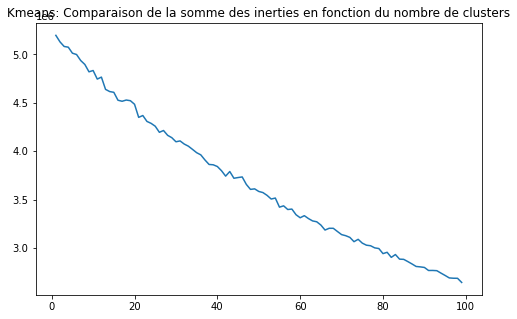

In [131]:
# Plot de la somme des inerties en fonction du nombre de clusters
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertie.keys()),
             list(inertie.values())
            )

C'est difficilement lisible et interprétable, on s'attend à obtenir un nombre de clusters élevés au vu du nombre de catégories. On note un joli drop d'inertie pour k=10 et k = 20

Méthodologie moins naïve : Nous allons étudier le coefficient de silhouette moyen d'un K-Means en fonction du nombre de clusters, pour juger de la qualité des clusterings effectués.

In [132]:
from sklearn.metrics import silhouette_score

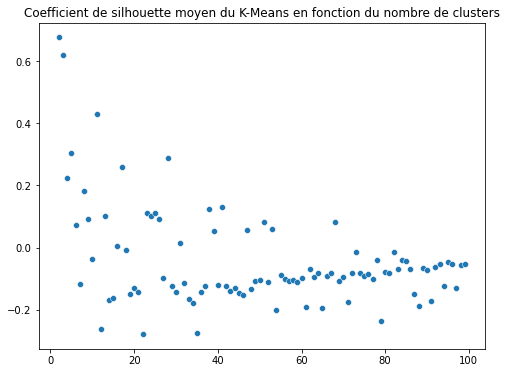

In [133]:
# Création d'un dictionnaire pour les valeurs de silhouette moyenne de chacun des modèles, puis visualisation
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = X_reduit,
                                             labels= list(dict_kmeans[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen du K-Means en fonction du nombre de clusters')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()

In [134]:
silhouettes_kmeans.values()

dict_values([0.6765405613455505, 0.6211603088170692, 0.22525134590270168, 0.30441290606305216, 0.07213106139075208, -0.11623499806986816, 0.1805192842657703, 0.09200283126473702, -0.03826370006241455, 0.4304835231850984, -0.2609494497500178, 0.10043182503212587, -0.1705040793029884, -0.161674057651872, 0.004899360691609862, 0.25822808968148325, -0.007012544951677611, -0.15043471826762725, -0.13017457920335207, -0.1430828786446079, -0.2783549605797865, 0.1121151516610907, 0.10283486301592147, 0.11011184421613601, 0.0933839775945405, -0.09940778948013707, 0.28941265058746524, -0.12509570558639987, -0.14288803113728035, 0.015752131338986716, -0.11366946958531698, -0.16511816046559125, -0.1772245492849418, -0.2760414322583039, -0.14245569364080032, -0.12431980238459497, 0.12517589242716537, 0.052579559673344475, -0.12210490807240246, 0.12952758077865878, -0.1238940833120665, -0.14095270432729357, -0.13085129480585903, -0.1450223637243423, -0.15183304084501595, 0.056904800827647366, -0.1335

In [135]:
for i in range(1,90):
    if list(silhouettes_kmeans.values())[i] >= 0.1 :
        print(i,list(silhouettes_kmeans.values())[i])

1 0.6211603088170692
2 0.22525134590270168
3 0.30441290606305216
6 0.1805192842657703
9 0.4304835231850984
11 0.10043182503212587
15 0.25822808968148325
21 0.1121151516610907
22 0.10283486301592147
23 0.11011184421613601
26 0.28941265058746524
36 0.12517589242716537
39 0.12952758077865878


In [136]:
list(silhouettes_kmeans.values())[9]

0.4304835231850984

On obtient le meilleur score de silhouette pour k = 10, c'est-à-dire pour 10 clusters.

In [137]:
dict_kmeans[10].labels_

array([8, 8, 8, ..., 8, 8, 8])

In [138]:
X_etud_10 = pd.concat([train,test]).copy()


In [139]:
X_etud_10.head()

uniq_id            crawl_timestamp  \
554   b144a363c107c7bdd91f32d6e28ba6f2  2016-01-07 05:50:25 +0000   
1012  29def171d7e31d48571a52f0fb3e6b07  2016-03-02 19:09:22 +0000   
481   9f9bb0ef3bb8af571bcfbfa1a22150bd  2016-01-07 05:50:25 +0000   
432   7f2f1f3039d1f5bc23226fc36577eab9  2016-03-11 06:55:07 +0000   
626   73901494efea71869576898c68b5eee4  2016-03-05 16:23:23 +0000   

                                            product_url  \
554   http://www.flipkart.com/timewel-1100-n1192-ana...   
1012  http://www.flipkart.com/ech-oly-ceramic-inside...   
481   http://www.flipkart.com/lapguard-hp-pavilion-d...   
432   http://www.flipkart.com/smartpro-19-5v-3-9a-re...   
626   http://www.flipkart.com/ville-style-polyester-...   

                                           product_name               pid  \
554          Timewel 1100-N1192 Analog Watch  - For Men  WATEYAP38HHARJDT   
1012    Ech oly Ceramic Inside Fitting Hookah Mouth Tip  HMTEFW3SGGF9HYPT   
481   Lapguard HP Pavilion DV7-6000 Series 6 Cell La...  ACCDSY8ESXF9AUHY   
432   Smartpro 19.5v,3.9a Replacement Charger for Va...  ACCEGZ6BUESXR4VH   
626   Ville Style Polyester Maroon Floral Eyelet Doo...  CRNEGGZFH8XWXYEA   

      retail_price  discounted_price                                 image  \
554          995.0             995.0  b144a363c107c7bdd91f32d6e28ba6f2.jpg   
1012        1799.0             699.0  29def171d7e31d48571a52f0fb3e6b07.jpg   
481         3999.0            1699.0  9f9bb0ef3bb8af571bcfbfa1a22150bd.jpg   
432         1499.0             539.0  7f2f1f3039d1f5bc23226fc36577eab9.jpg   
626          999.0             399.0  73901494efea71869576898c68b5eee4.jpg   

      is_FK_Advantage_product  \
554                     False   
1012                    False   
481                     False   
432                     False   
626                     False   

                                            description       product_rating  \
554   Timewel 1100-N1192 Analog Watch  - For Men - B...  No rating available   
1012  Ech oly Ceramic Inside Fitting Hookah Mouth Ti...  No rating available   
481   Buy Lapguard HP Pavilion DV7-6000 Series 6 Cel...  No rating available   
432   Key Features of Smartpro 19.5v,3.9a Replacemen...  No rating available   
626   Key Features of Ville Style Polyester Maroon F...  No rating available   

           overall_rating        brand  \
554   No rating available          NaN   
1012  No rating available      Ech oly   
481   No rating available     Lapguard   
432   No rating available     Smartpro   
626   No rating available  Ville Style   

                                 product_specifications  \
554   {"product_specification"=>[{"key"=>"Mechanism"...   
1012  {"product_specification"=>[{"key"=>"Brand", "v...   
481   {"product_specification"=>[{"key"=>"Brand", "v...   
432   {"product_specification"=>[{"key"=>"Brand", "v...   
626   {"product_specification"=>[{"key"=>"Reversible...   

                           cat_1                      cat_2  \
554                      Watches              Wrist Watches   
1012  Home Decor & Festive Needs  Table Decor & Handicrafts   
481                    Computers         Laptop Accessories   
432                    Computers         Laptop Accessories   
626              Home Furnishing     Curtains & Accessories   

                      cat_3  
554   Timewel Wrist Watches  
1012            Table Decor  
481               Batteries  
432                Adapters  
626                Curtains

In [140]:
X_etud_10['kmeans'] = dict_kmeans[10].labels_

In [141]:
X_etud_10.head()

uniq_id            crawl_timestamp  \
554   b144a363c107c7bdd91f32d6e28ba6f2  2016-01-07 05:50:25 +0000   
1012  29def171d7e31d48571a52f0fb3e6b07  2016-03-02 19:09:22 +0000   
481   9f9bb0ef3bb8af571bcfbfa1a22150bd  2016-01-07 05:50:25 +0000   
432   7f2f1f3039d1f5bc23226fc36577eab9  2016-03-11 06:55:07 +0000   
626   73901494efea71869576898c68b5eee4  2016-03-05 16:23:23 +0000   

                                            product_url  \
554   http://www.flipkart.com/timewel-1100-n1192-ana...   
1012  http://www.flipkart.com/ech-oly-ceramic-inside...   
481   http://www.flipkart.com/lapguard-hp-pavilion-d...   
432   http://www.flipkart.com/smartpro-19-5v-3-9a-re...   
626   http://www.flipkart.com/ville-style-polyester-...   

                                           product_name               pid  \
554          Timewel 1100-N1192 Analog Watch  - For Men  WATEYAP38HHARJDT   
1012    Ech oly Ceramic Inside Fitting Hookah Mouth Tip  HMTEFW3SGGF9HYPT   
481   Lapguard HP Pavilion DV7-6000 Series 6 Cell La...  ACCDSY8ESXF9AUHY   
432   Smartpro 19.5v,3.9a Replacement Charger for Va...  ACCEGZ6BUESXR4VH   
626   Ville Style Polyester Maroon Floral Eyelet Doo...  CRNEGGZFH8XWXYEA   

      retail_price  discounted_price                                 image  \
554          995.0             995.0  b144a363c107c7bdd91f32d6e28ba6f2.jpg   
1012        1799.0             699.0  29def171d7e31d48571a52f0fb3e6b07.jpg   
481         3999.0            1699.0  9f9bb0ef3bb8af571bcfbfa1a22150bd.jpg   
432         1499.0             539.0  7f2f1f3039d1f5bc23226fc36577eab9.jpg   
626          999.0             399.0  73901494efea71869576898c68b5eee4.jpg   

      is_FK_Advantage_product  \
554                     False   
1012                    False   
481                     False   
432                     False   
626                     False   

                                            description       product_rating  \
554   Timewel 1100-N1192 Analog Watch  - For Men - B...  No rating available   
1012  Ech oly Ceramic Inside Fitting Hookah Mouth Ti...  No rating available   
481   Buy Lapguard HP Pavilion DV7-6000 Series 6 Cel...  No rating available   
432   Key Features of Smartpro 19.5v,3.9a Replacemen...  No rating available   
626   Key Features of Ville Style Polyester Maroon F...  No rating available   

           overall_rating        brand  \
554   No rating available          NaN   
1012  No rating available      Ech oly   
481   No rating available     Lapguard   
432   No rating available     Smartpro   
626   No rating available  Ville Style   

                                 product_specifications  \
554   {"product_specification"=>[{"key"=>"Mechanism"...   
1012  {"product_specification"=>[{"key"=>"Brand", "v...   
481   {"product_specification"=>[{"key"=>"Brand", "v...   
432   {"product_specification"=>[{"key"=>"Brand", "v...   
626   {"product_specification"=>[{"key"=>"Reversible...   

                           cat_1                      cat_2  \
554                      Watches              Wrist Watches   
1012  Home Decor & Festive Needs  Table Decor & Handicrafts   
481                    Computers         Laptop Accessories   
432                    Computers         Laptop Accessories   
626              Home Furnishing     Curtains & Accessories   

                      cat_3  kmeans  
554   Timewel Wrist Watches       8  
1012            Table Decor       8  
481               Batteries       8  
432                Adapters       7  
626                Curtains       8

In [142]:
X_etud_10['kmeans'].value_counts()

8    1028
0       8
7       6
9       2
6       1
1       1
2       1
4       1
5       1
3       1
Name: kmeans, dtype: int64

On se rend compte que notre clustering à 10 clusters est trivial, nous allons donc prendre une valeur de k plus grande en termes d'ordre de grandeurs par l'analyse du score de silhouette.

#### Essai avec k = 40

In [143]:
X_etud_40 = pd.concat([train,test]).copy()
X_etud_40['kmeans'] = dict_kmeans[40].labels_

In [144]:
X_etud_40.head()

uniq_id            crawl_timestamp  \
554   b144a363c107c7bdd91f32d6e28ba6f2  2016-01-07 05:50:25 +0000   
1012  29def171d7e31d48571a52f0fb3e6b07  2016-03-02 19:09:22 +0000   
481   9f9bb0ef3bb8af571bcfbfa1a22150bd  2016-01-07 05:50:25 +0000   
432   7f2f1f3039d1f5bc23226fc36577eab9  2016-03-11 06:55:07 +0000   
626   73901494efea71869576898c68b5eee4  2016-03-05 16:23:23 +0000   

                                            product_url  \
554   http://www.flipkart.com/timewel-1100-n1192-ana...   
1012  http://www.flipkart.com/ech-oly-ceramic-inside...   
481   http://www.flipkart.com/lapguard-hp-pavilion-d...   
432   http://www.flipkart.com/smartpro-19-5v-3-9a-re...   
626   http://www.flipkart.com/ville-style-polyester-...   

                                           product_name               pid  \
554          Timewel 1100-N1192 Analog Watch  - For Men  WATEYAP38HHARJDT   
1012    Ech oly Ceramic Inside Fitting Hookah Mouth Tip  HMTEFW3SGGF9HYPT   
481   Lapguard HP Pavilion DV7-6000 Series 6 Cell La...  ACCDSY8ESXF9AUHY   
432   Smartpro 19.5v,3.9a Replacement Charger for Va...  ACCEGZ6BUESXR4VH   
626   Ville Style Polyester Maroon Floral Eyelet Doo...  CRNEGGZFH8XWXYEA   

      retail_price  discounted_price                                 image  \
554          995.0             995.0  b144a363c107c7bdd91f32d6e28ba6f2.jpg   
1012        1799.0             699.0  29def171d7e31d48571a52f0fb3e6b07.jpg   
481         3999.0            1699.0  9f9bb0ef3bb8af571bcfbfa1a22150bd.jpg   
432         1499.0             539.0  7f2f1f3039d1f5bc23226fc36577eab9.jpg   
626          999.0             399.0  73901494efea71869576898c68b5eee4.jpg   

      is_FK_Advantage_product  \
554                     False   
1012                    False   
481                     False   
432                     False   
626                     False   

                                            description       product_rating  \
554   Timewel 1100-N1192 Analog Watch  - For Men - B...  No rating available   
1012  Ech oly Ceramic Inside Fitting Hookah Mouth Ti...  No rating available   
481   Buy Lapguard HP Pavilion DV7-6000 Series 6 Cel...  No rating available   
432   Key Features of Smartpro 19.5v,3.9a Replacemen...  No rating available   
626   Key Features of Ville Style Polyester Maroon F...  No rating available   

           overall_rating        brand  \
554   No rating available          NaN   
1012  No rating available      Ech oly   
481   No rating available     Lapguard   
432   No rating available     Smartpro   
626   No rating available  Ville Style   

                                 product_specifications  \
554   {"product_specification"=>[{"key"=>"Mechanism"...   
1012  {"product_specification"=>[{"key"=>"Brand", "v...   
481   {"product_specification"=>[{"key"=>"Brand", "v...   
432   {"product_specification"=>[{"key"=>"Brand", "v...   
626   {"product_specification"=>[{"key"=>"Reversible...   

                           cat_1                      cat_2  \
554                      Watches              Wrist Watches   
1012  Home Decor & Festive Needs  Table Decor & Handicrafts   
481                    Computers         Laptop Accessories   
432                    Computers         Laptop Accessories   
626              Home Furnishing     Curtains & Accessories   

                      cat_3  kmeans  
554   Timewel Wrist Watches       0  
1012            Table Decor       0  
481               Batteries       0  
432                Adapters      30  
626                Curtains       0

In [145]:
X_etud_40['kmeans'].value_counts()

0     959
6      21
33     12
20     11
30      6
32      3
38      3
36      2
37      2
39      1
31      1
28      1
13      1
2       1
23      1
12      1
16      1
34      1
22      1
29      1
3       1
14      1
18      1
19      1
17      1
21      1
27      1
24      1
4       1
5       1
11      1
9       1
25      1
35      1
7       1
15      1
10      1
26      1
1       1
8       1
Name: kmeans, dtype: int64

C'est encore trivial, on va augmenter le nombre de clusters, en sachant qu'il y a au départ 62 catégories d'objets.

#### Essai avec k = 55

In [146]:
X_etud_55 = pd.concat([train,test]).copy()
X_etud_55['kmeans'] = dict_kmeans[55].labels_

In [147]:
X_etud_55['kmeans'].value_counts()

47    815
17    136
21     13
50     12
27     11
26      6
12      3
0       2
5       2
34      2
44      2
41      2
14      2
45      1
24      1
7       1
52      1
13      1
32      1
46      1
6       1
9       1
1       1
2       1
19      1
22      1
29      1
15      1
30      1
54      1
31      1
28      1
8       1
39      1
33      1
51      1
37      1
25      1
10      1
35      1
40      1
11      1
48      1
42      1
36      1
16      1
20      1
53      1
38      1
49      1
3       1
4       1
43      1
23      1
18      1
Name: kmeans, dtype: int64

#  Approche par Bag of word / Tf-idf

## Préparation sentences

In [148]:
# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)


cv_fit = cvect.fit(df['description_bow_lem'])
ctf_fit = ctf.fit(df['description_bow_lem'])

cv_transform = cvect.transform(df['description_bow_lem'])  
ctf_transform = ctf.transform(df['description_bow_lem'])  

## Exécution des modèles

In [149]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)


CountVectorizer : 
-----------------
ARI :  0.3678 time :  7.0


## Graphiques

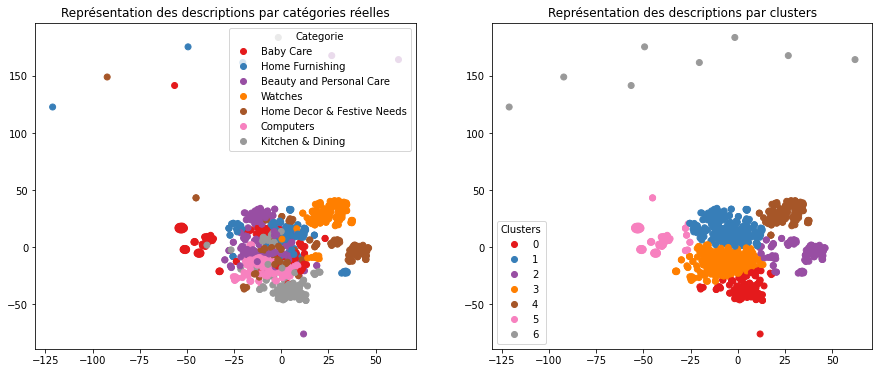

ARI :  0.3678


In [150]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [151]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

Tf-idf : 
--------
ARI :  0.5154 time :  5.0


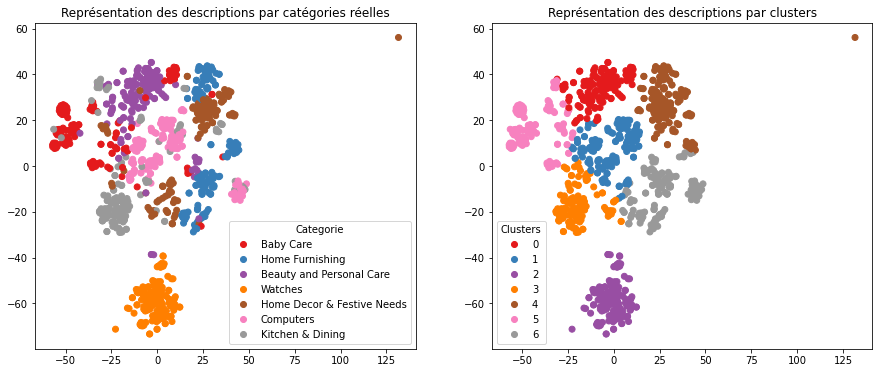

ARI :  0.5154


In [152]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### Approche par Word2Vec

In [153]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

In [154]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl  
0  key features of elegance polyester m

In [155]:
len(df['description_bow'])

1050

In [156]:
liste_1 = []

In [157]:
for k in range(len(df['description_bow'])):
    liste_1.append(len(df['description_bow'][k]))

In [158]:
liste_1

[1130,
 403,
 1018,
 763,
 993,
 243,
 234,
 548,
 367,
 384,
 785,
 231,
 234,
 225,
 441,
 389,
 228,
 263,
 229,
 257,
 351,
 206,
 232,
 312,
 374,
 299,
 221,
 221,
 1162,
 201,
 281,
 286,
 234,
 810,
 533,
 138,
 1124,
 1909,
 445,
 401,
 367,
 336,
 417,
 488,
 855,
 846,
 849,
 645,
 864,
 441,
 855,
 1189,
 840,
 522,
 522,
 522,
 187,
 266,
 575,
 249,
 320,
 266,
 392,
 404,
 243,
 327,
 319,
 451,
 246,
 239,
 1400,
 450,
 272,
 314,
 418,
 364,
 213,
 258,
 869,
 310,
 700,
 246,
 292,
 428,
 226,
 934,
 281,
 1364,
 1018,
 117,
 211,
 189,
 226,
 199,
 209,
 197,
 172,
 646,
 251,
 270,
 215,
 259,
 786,
 116,
 114,
 118,
 240,
 840,
 118,
 403,
 418,
 494,
 274,
 1094,
 131,
 368,
 137,
 183,
 220,
 794,
 309,
 160,
 612,
 488,
 438,
 168,
 167,
 160,
 167,
 980,
 562,
 1295,
 195,
 573,
 185,
 952,
 566,
 173,
 565,
 958,
 564,
 573,
 564,
 201,
 577,
 179,
 536,
 578,
 584,
 173,
 535,
 970,
 179,
 562,
 596,
 535,
 536,
 1308,
 175,
 974,
 580,
 171,
 1290,
 536,
 56

In [159]:
df['len_description_bow'] = liste_1

In [160]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

   ...       overall_rating                  brand  \
0  ...  No rating available               Elegance   
1  ...  No rating available               Sathiyas   
2  ...  No rating available                Eurospa   
3  ...  No rating available  SANTOSH ROYAL FASHION   
4  ...  No rating available           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl len_description_bow  
0  key features of elegance polyester multicolor ...                1130  
1  specifications of sathiyas cotton bat

In [161]:
liste_2 =[]
for k in range(len(df['description_dl'])):
    liste_2.append(len(df['description_dl'][k]))
df['len_description_dl'] = liste_2


In [162]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

   ...                  brand  \
0  ...               Elegance   
1  ...               Sathiyas   
2  ...                Eurospa   
3  ...  SANTOSH ROYAL FASHION   
4  ...           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl len_description_bow  \
0  key features of elegance polyester multicolor ...                1130   
1  specifications of sathiyas cotton bath towel (...                 403   
2  key features of eurospa cotton terry face towe...                1018   
3  key featu

In [163]:
m = max(df['len_description_bow'])
m_dl = max(df['len_description_dl'])

In [164]:
m

2673

In [165]:
df.sample(5)

uniq_id            crawl_timestamp  \
446   d7fded8e211b3033e424fb450b97caec  2016-06-10 22:31:19 +0000   
1031  7d2883d833e215d3092c7f53572f870d  2016-03-03 06:06:42 +0000   
947   4946e2411d24801b9e8f7dbe97ab1b93  2016-01-01 13:15:34 +0000   
244   0c4718ae90f2889b7021a99ee1cc106c  2015-12-01 12:40:44 +0000   
766   503bb08f7bdf6a395ec564dd1dc83619  2015-12-12 11:46:53 +0000   

                                            product_url  \
446   http://www.flipkart.com/hako-85w-magsafe-lapto...   
1031  http://www.flipkart.com/kerastase-nutritive-ba...   
947   http://www.flipkart.com/eshoppee-shiv-face-ant...   
244   http://www.flipkart.com/bergner-kadhai-na-l/p/...   
766   http://www.flipkart.com/nutcase-sticker-wrap-d...   

                                           product_name               pid  \
446   Hako 85W Magsafe Laptop Charger For APPLE MacB...  ACCEJ6TFUBHAYTM8   
1031  Kerastase Nutritive Bain Satin 1 Complete Nutr...  SMPDJVMAKKNB69AY   
947   Eshoppee Shiv face antique color brass idol Sh...  SHIEBCZQNHTSFPJG   
244                                 Bergner Kadhai NA L  PTPECA2QYCZH8MBV   
766   Nutcase Sticker Wrap Design - Lucky Elements 8...  BOTEANCHDNKDTKGH   

      retail_price  discounted_price                                 image  \
446         2499.0            1849.0  d7fded8e211b3033e424fb450b97caec.jpg   
1031        2925.0            2925.0  7d2883d833e215d3092c7f53572f870d.jpg   
947         1499.0             999.0  4946e2411d24801b9e8f7dbe97ab1b93.jpg   
244         1499.0            1499.0  0c4718ae90f2889b7021a99ee1cc106c.jpg   
766          799.0             399.0  503bb08f7bdf6a395ec564dd1dc83619.jpg   

      is_FK_Advantage_product  \
446                     False   
1031                    False   
947                     False   
244                     False   
766                     False   

                                            description  ...      brand  \
446   Key Features of Hako 85W Magsafe Laptop Charge...  ...       Hako   
1031  Specifications of Kerastase Nutritive Bain Sat...  ...  Kerastase   
947   Buy Eshoppee Shiv face antique color brass ido...  ...   Eshoppee   
244   Bergner Kadhai NA L (Aluminium, Non-stick)\r\n...  ...    Bergner   
766   Nutcase Sticker Wrap Design - Lucky Elements 8...  ...        NaN   

                                 product_specifications  \
446   {"product_specification"=>[{"key"=>"Brand", "v...   
1031  {"product_specification"=>[{"key"=>"Hair Type"...   
947   {"product_specification"=>[{"key"=>"Brand", "v...   
244   {"product_specification"=>[{"key"=>"Pan Type",...   
766   {"product_specification"=>[{"key"=>"Body Mater...   

                           cat_1                      cat_2  \
446                    Computers         Laptop Accessories   
1031    Beauty and Personal Care                  Hair Care   
947   Home Decor & Festive Needs  Table Decor & Handicrafts   
244             Kitchen & Dining                   Cookware   
766             Kitchen & Dining       Containers & Bottles   

                  cat_3                                    description_bow  \
446     Laptop Adapters  key features hako 85w magsafe laptop charger f...   
1031           Shampoos  specifications kerastase nutritive bain satin ...   
947          Showpieces  buy eshoppee shiv face antique color brass ido...   
244         Pots & Pans  bergner kadhai aluminium non stick price 1,499...   
766   Bottles & Sippers  nutcase sticker wrap design lucky elements 800...   

                                    description_bow_lem  \
446   key feature hako 85w magsafe laptop charger fo...   
1031  specification kerastase nutritive bain satin c...   
947   buy eshoppee shiv face antique color brass ido...   
244   bergner kadhai aluminium non stick price 1,499...   
766   nutcase sticker wrap design lucky element 800 ...   

                                         description_dl len_description_bow  \
446   key features of hako 85w magsafe lap

In [166]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = m 
sentences = df['description_bow'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [167]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 5098
Word2Vec trained


In [168]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5099


In [169]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5099, 300)


In [170]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2673)]            0         
                                                                 
 embedding (Embedding)       (None, 2673, 300)         1529700   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,529,700
Trainable params: 1,529,700
Non-trainable params: 0
_________________________________________________________________


In [171]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 1s 22ms/step


(1050, 300)

In [172]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3322 time :  5.0


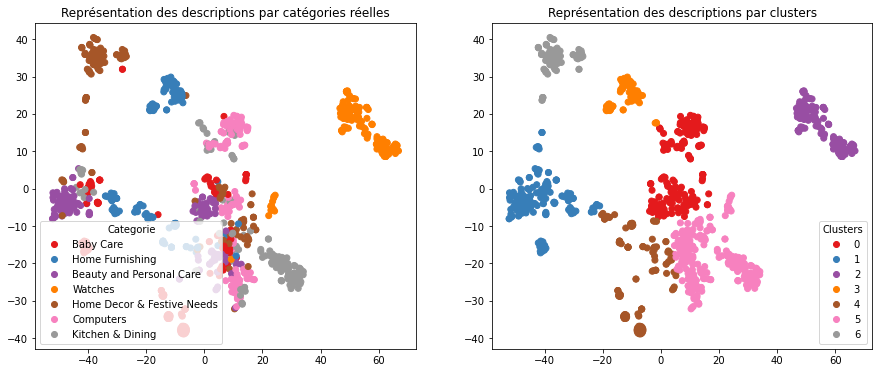

ARI :  0.3322


In [173]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### Approche par Universal Sentence Encoder

In [174]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model



In [175]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


In [176]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [177]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [178]:
batch_size = 10
sentences = df['description_dl'].to_list()

In [179]:
features_USE = feature_USE_fct(sentences, batch_size)

In [180]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.432 time :  5.0


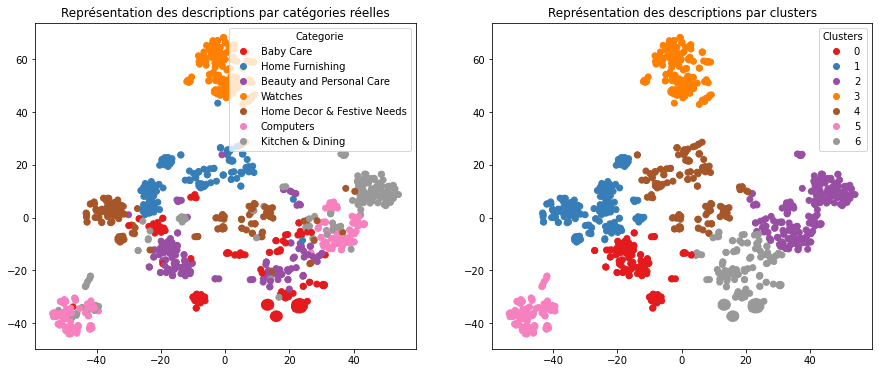

ARI :  0.432


In [181]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Approche par BERT

In [182]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [183]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


## Fonctions communes

In [184]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT hub Tensorflow

In [185]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [186]:
sentences = df['description_dl'].to_list()

In [187]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

loading configuration file config.json from cache at C:\Users\Alexandre/.cache\huggingface\hub\models--bert-base-uncased\snapshots\5546055f03398095e385d7dc625e636cc8910bf2\config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.22.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\Alexandre/.cache\huggingface\hub\models--bert-base-uncased\snapshots\5546055f03398095e385d7dc625e636cc8910bf2

temps traitement :  48.0


In [188]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3177 time :  4.0


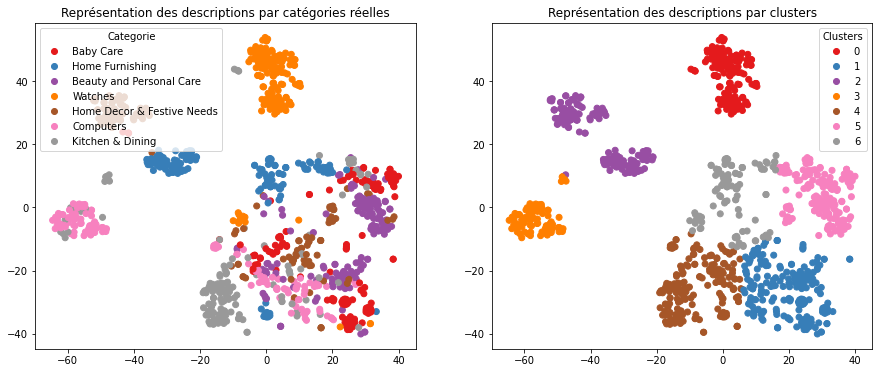

ARI :  0.3177


In [189]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Traitement des images

In [190]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

   ...                  brand  \
0  ...               Elegance   
1  ...               Sathiyas   
2  ...                Eurospa   
3  ...  SANTOSH ROYAL FASHION   
4  ...           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl len_description_bow  \
0  key features of elegance polyester multicolor ...                1130   
1  specifications of sathiyas cotton bath towel (...                 403   
2  key features of eurospa cotton terry face towe...                1018   
3  key featu

### Approche par SIFT

In [191]:
import os
import cv2

In [192]:
# Création de listes contenant les images ainsi que les IDs

path = 'Images'
images = []
class_images = []
ma_liste = os.listdir(path)
print('Nombre d/images détectées', len(ma_liste))

for ele in ma_liste :
    imgCur = cv2.imread(f'{path}/{ele}',0)
    images.append(imgCur)
    class_images.append(os.path.splitext(ele)[0])


Nombre d/images détectées 1050


In [193]:
images[3].shape


(857, 1100)

In [194]:
#cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY).shape

In [195]:
# Passage des images en noir et blanc
#for k in range(len(images)-1) :
#    images[k] = cv2.cvtColor(images[k], cv2.COLOR_BGR2GRAY)

In [196]:
#images[3].reshape()

## Détermination et affichage des descripteurs SIFT

In [197]:
sift = cv2.SIFT_create()

In [198]:
histograms = []
for img in images :
    hist = cv2.equalizeHist(img)
    histograms.append(hist)

In [199]:
keypoints_sift = []
descriptors_sift = []
images_sift_kp = []
for hist in histograms :
    kp, des = sift.detectAndCompute(hist, None)
    keypoints_sift.append(kp)
    descriptors_sift.append(des)
    

In [200]:
descriptors_sift[0].shape

(4150, 128)

In [201]:
descriptors_sift_array = np.asarray(descriptors_sift)

C:\Users\Alexandre\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [202]:
descriptors_sift_array.shape

(1050,)

In [203]:
descriptors_sift_all   = np.concatenate(descriptors_sift_array, axis=0)

In [204]:
descriptors_sift_all.shape

(9051349, 128)

In [205]:
print()
print("Nombre de descripteurs : ", descriptors_sift_all.shape)



Nombre de descripteurs :  (9051349, 128)


### Création des clusters de descripteurs

In [206]:
np.sqrt(len(descriptors_sift_all))

3008.5459943301516

In [207]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(descriptors_sift_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(descriptors_sift_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  3009
Création de 3009 clusters de descripteurs ...


C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


temps de traitement kmeans :           142.03 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [208]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(descriptors_sift_array) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            92.66 secondes


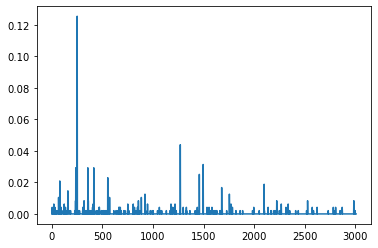

In [209]:
plt.plot(hist_vectors[12])

## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [210]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 3009)
Dimensions dataset après réduction PCA :  (1050, 529)


In [211]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

   ...                  brand  \
0  ...               Elegance   
1  ...               Sathiyas   
2  ...                Eurospa   
3  ...  SANTOSH ROYAL FASHION   
4  ...           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl len_description_bow  \
0  key features of elegance polyester multicolor ...                1130   
1  specifications of sathiyas cotton bath towel (...                 403   
2  key features of eurospa cotton terry face towe...                1018   
3  key featu

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [212]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["cat_1"]
print(df_tsne.shape)


(1050, 3)


In [213]:
df['cat_1'].value_counts()

Home Furnishing               150
Baby Care                     150
Watches                       150
Home Decor & Festive Needs    150
Kitchen & Dining              150
Beauty and Personal Care      150
Computers                     150
Name: cat_1, dtype: int64

## Analyse visuelle : affichage T-SNE selon catégories d'images


In [214]:
df_tsne.head()

tsne1      tsne2            class
0  19.941385  -1.263899  Home Furnishing
1  31.870932  -3.673667        Baby Care
2  29.232910   5.438531        Baby Care
3  -6.202513  -8.550593  Home Furnishing
4  -3.964374  13.575226  Home Furnishing

In [215]:
#TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [216]:
l_cat

['Baby Care',
 'Home Furnishing',
 'Beauty and Personal Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Computers',
 'Kitchen & Dining']

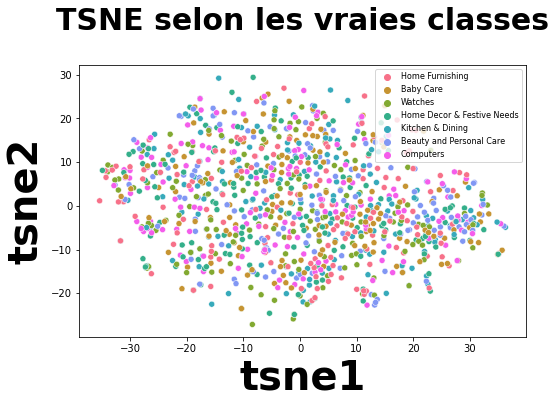

In [217]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('husl', n_colors=len(l_cat)))

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 40, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 40, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [218]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=len(l_cat), random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters


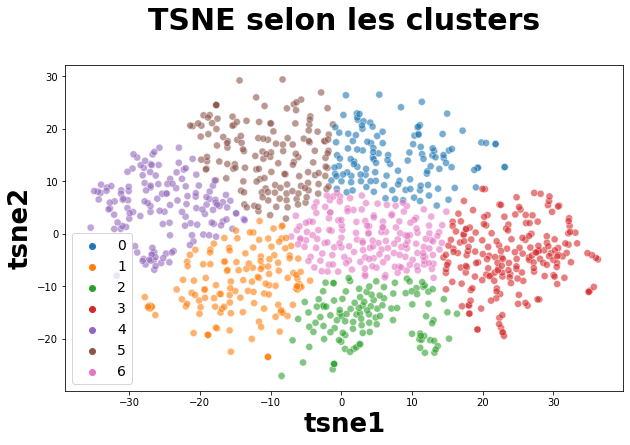

ARI :  0.0016218580117573014


In [219]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors= len(l_cat)), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["cat_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes


In [220]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    126
1    140
2    120
3    198
4    147
5    150
6    169
Name: class, dtype: int64

In [222]:
df_tsne.head()

tsne1      tsne2            class  cluster
0  19.941385  -1.263899  Home Furnishing        3
1  31.870932  -3.673667        Baby Care        3
2  29.232910   5.438531        Baby Care        3
3  -6.202513  -8.550593  Home Furnishing        1
4  -3.964374  13.575226  Home Furnishing        5

In [227]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_tsne['class_encoded'] = le.fit_transform(df_tsne['class'])
labels = df_tsne['class_encoded']

In [226]:
df_tsne.head()

tsne1      tsne2            class  cluster  class_encoded
0  19.941385  -1.263899  Home Furnishing        3              4
1  31.870932  -3.673667        Baby Care        3              0
2  29.232910   5.438531        Baby Care        3              0
3  -6.202513  -8.550593  Home Furnishing        1              4
4  -3.964374  13.575226  Home Furnishing        5              4

In [254]:
df_tsne.loc[df_tsne['class_encoded']==0]

tsne1      tsne2      class  cluster  class_encoded
1     31.870932  -3.673667  Baby Care        3              0
2     29.232910   5.438531  Baby Care        3              0
40    31.552967  -8.406199  Baby Care        3              0
42    24.608002   3.662828  Baby Care        3              0
63    -4.852977   0.313551  Baby Care        6              0
66    -3.266056   7.632912  Baby Care        5              0
73    11.712688  -5.873982  Baby Care        6              0
74    -1.013754 -24.840126  Baby Care        2              0
75   -12.291628   5.297657  Baby Care        5              0
79    -4.987627  -1.270602  Baby Care        6              0
82   -24.993942   4.194575  Baby Care        4              0
83    10.587927  -1.912789  Baby Care        6              0
106   -4.320603  -4.419251  Baby Care        6              0
110  -20.875658 -18.954273  Baby Care        1              0
112   -1.934939  23.919594  Baby Care        5              0
114  -13.614330  12.571639  Baby Care        5              0
117   12.723461   3.262861  Baby Care        6              0
121    4.542516  16.328550  Baby Care        0              0
202    3.035550  15.866472  Baby Care        0              0
220  -11.640724  -8.435981  Baby Care        1              0
275   -3.551536  -2.696147  Baby Care        6              0
282   18.905069  -8.174640  Baby Care        3              0
288   11.875435  -4.458861  Baby Care        6              0
291   33.355652  -1.847275  Baby Care        3              0
292    9.057412  -4.413363  Baby Care        6              0
293   -9.286810 -15.839495  Baby Care        1              0
294   -1.556687   4.047011  Baby Care        6              0
297  -10.895868 -11.411418  Baby Care        1              0
426   11.950274  -1.000042  Baby Care        6              0
428  -15.851066  -2.674916  Baby Care        1              0
438    4.148597   9.997473  Baby Care        0              0
440  -15.748842 -13.120928  Baby Care        1              0
442   14.973607  22.881939  Baby Care        0              0
448    3.693133  17.521091  Baby Care        0              0
449   18.107597 -15.253302  Baby Care        3              0
450   35.715469 -10.149934  Baby Care        3              0
460    7.492401  -1.906506  Baby Care        6              0
464  -16.089808  16.419426  Baby Care        5              0
465  -22.001827   3.247163  Baby Care        4              0
466   17.602295  -7.406026  Baby Care        3              0
467  -11.370511  -4.337878  Baby Care        1              0
468  -18.548252  -3.570214  Baby Care        1              0
590   30.159138  -8.187156  Baby Care        3              0
592   -6.491394  21.010937  Baby Care        5              0
593   12.954999  -4.044933  Baby Care        6              0
597    3.352287  -6.649658  Baby Care        6              0
599   31.693609  -1.861896  Baby Care        3              0
612  -11.964174   9.943607  Baby Care        5              0
613   13.891111  -3.004781  Baby Care        6              0
615   -0.586200  14.957875  Baby Care        0              0
616  -13.396688  21.516478  Baby Care        5              0
617  -12.442064  -2.648280  Baby Care        1              0
618  -19.888723 -14.016973  Baby Care        1              0
619   23.323933   0.965630  Baby Care        3              0
620  -20.490240  11.245704  Baby Care        4              0
621    0.750453 -15.310001  Baby Care        2              0
622   -8.485274 -14.610540  Baby Care        1              0
623    0.165517 -12.432378  Baby Care        2              0
624   -1.681106   0.700319  Baby Care        6              0
629    1.402902   9.809506  Baby Care        0              0
630   27.195587  -5.489888  Baby Care        3              0
631   -3.454374 -13.912543  Baby Care        2              0
632   25.540037  -7.398531  Baby Care        3              0
633   13.587172  -0.436969  Baby Care     

In [235]:
df_tsne['cluster'].value_counts()

3    198
6    169
5    150
4    147
1    140
0    126
2    120
Name: cluster, dtype: int64

In [234]:
df_tsne['class_encoded'].value_counts()

4    150
0    150
6    150
3    150
5    150
1    150
2    150
Name: class_encoded, dtype: int64

In [239]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[19 20 15 27 13 23 33]
 [21 19 17 40 19 18 16]
 [15 18 14 25 30 23 25]
 [13 32 14 24 19 25 23]
 [23 17 22 25 24 16 23]
 [21 14 16 33 17 24 25]
 [14 20 22 24 25 21 24]]


In [277]:
corresp = conf_mat.argmax(axis = 0)
corresp

array([0, 1, 2, 3, 4, 0, 0], dtype=int64)

In [284]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = [0,2,5,4,1,6,3]
    
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [0, 2, 5, 4, 1, 6, 3]
[[19 13 20 33 27 15 23]
 [21 19 19 16 40 17 18]
 [15 30 18 25 25 14 23]
 [13 19 32 23 24 14 25]
 [23 24 17 23 25 22 16]
 [21 17 14 25 33 16 24]
 [14 25 20 24 24 22 21]]

              precision    recall  f1-score   support

           0       0.15      0.13      0.14       150
           1       0.13      0.13      0.13       150
           2       0.13      0.12      0.12       150
           3       0.14      0.15      0.14       150
           4       0.13      0.17      0.14       150
           5       0.13      0.11      0.12       150
           6       0.14      0.14      0.14       150

    accuracy                           0.13      1050
   macro avg       0.13      0.13      0.13      1050
weighted avg       0.13      0.13      0.13      1050



In [288]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0254163"])

In [247]:
df_cm.shape

(7, 7)

In [285]:
df_tsne.head()

tsne1      tsne2            class  cluster  class_encoded
0  19.941385  -1.263899  Home Furnishing        3              4
1  31.870932  -3.673667        Baby Care        3              0
2  29.232910   5.438531        Baby Care        3              0
3  -6.202513  -8.550593  Home Furnishing        1              4
4  -3.964374  13.575226  Home Furnishing        5              4

In [282]:
df_tsne.loc[df_tsne['class']== 'Baby Care'].groupby(['cluster']).count()

tsne1  tsne2  class  class_encoded
cluster                                    
0           19     19     19             19
1           20     20     20             20
2           15     15     15             15
3           27     27     27             27
4           13     13     13             13
5           23     23     23             23
6           33     33     33             33

In [289]:
df_cm

0   2   5   4   1   6   3
Baby Care                   19  13  20  33  27  15  23
Home Furnishing             21  19  19  16  40  17  18
Beauty and Personal Care    15  30  18  25  25  14  23
Watches                     13  19  32  23  24  14  25
Home Decor & Festive Needs  23  24  17  23  25  22  16
Computers                   21  17  14  25  33  16  24
Kitchen & Dining            14  25  20  24  24  22  21

<AxesSubplot:>

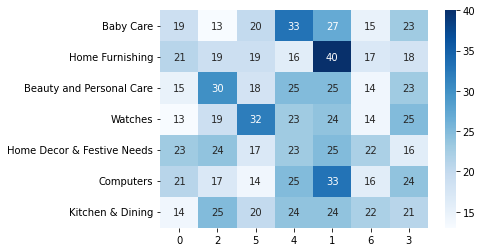

In [291]:
list_labels = set(df_tsne['class'])

df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in '0254163'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

In [241]:
df_tsne.sample(40)

tsne1      tsne2                       class  cluster  class_encoded
224    8.850692   4.218025  Home Decor & Festive Needs        6              3
415    0.060479   1.606326    Beauty and Personal Care        6              1
1041   9.767897   8.511680                   Baby Care        0              0
643   24.553291  -3.528281                   Computers        3              2
629    1.402902   9.809506                   Baby Care        0              0
240  -15.187232  20.714558            Kitchen & Dining        5              5
494   19.042021   8.826093                     Watches        0              6
626    2.819103 -16.210611             Home Furnishing        2              4
35    12.817696  -6.706736             Home Furnishing        6              4
540  -16.218201   2.712786                     Watches        4              6
846    9.279502   5.278047                   Computers        6              2
247   10.792787  20.261786            Kitchen & Dining        0              5
452   20.684385   3.545726            Kitchen & Dining        3              5
219   -4.990076   2.067429  Home Decor & Festive Needs        6              3
556    7.211020   8.289883                     Watches        0              6
142    8.442992  24.095007            Kitchen & Dining        0              5
29   -29.428917   4.122649                     Watches        4              6
727  -24.785271  -3.795073  Home Decor & Festive Needs        4              3
783  -13.910054 -14.956026                   Baby Care        1              0
388   -8.209604  15.755006    Beauty and Personal Care        5              1
890    7.310615 -16.472681             Home Furnishing        2              4
337    2.088844   0.158443    Beauty and Personal Care        6              1
529    2.694048  -5.364333                     Watches        6              6
9    -27.905739  12.542060                     Watches        4              6
941    2.633525 -21.010427             Home Furnishing        2              4
1023  -2.002512   7.263916                   Computers        6              2
354  -30.054174   8.106030                   Computers        4              2
460    7.492401  -1.906506                   Baby Care        6              0
504   10.358169  18.695717                   Computers        0              2
628   -8.331505   1.522291            Kitchen & Dining        1              5
639    4.430798  -1.318281                   Computers        6              2
492    6.545926  14.033096                   Computers        0              2
653    5.486029 -15.697862             Home Furnishing        2              4
1020 -22.368305  -8.796902             Home Furnishing        1              4
881   25.113838 -11.664561             Home Furnishing        3              4
560  -14.167893   8.187345                     Watches        5              6
660   -6.163717 -10.668511             Home Furnishing        1              4
721  -27.599020   8.251149             Home Furnishing        4              4
297  -10.895868 -11.411418                   Baby Care        1              0
877    9.396071  13.940016             Home Furnishing        0              4

### Approche par réseau de neurones convolutionnels : VGG-16

Dans ce cas de figure, nous n'avons que peu de produits disponibles. Nous allons nous utiliser le transfer learning pour extraire les features de notre jeu d'images, en retirant la dernière couche du modèle et ensuite entraîner un classifieur. On fixera donc tous les autres paramètres.

In [293]:
import keras


In [298]:
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [324]:
# Création de listes contenant les images ainsi que les IDs

path_2 = r'C:\Users\Alexandre\Images'
os.chdir(path_2)
images_2 = []
class_images = []
ma_liste_2 = os.listdir(path_2)
print('Nombre d/images détectées', len(ma_liste_2))

with os.scandir(path_2) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            images_2.append(file.name)



Nombre d/images détectées 1050


In [325]:
model = VGG16()
# On cut le dernier layer
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [326]:
data_extracted = {}
for img in images_2:
    feat = extract_features(img,model)
    data_extracted[img] = feat
    

1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 107ms/step


C:\Users\Alexandre\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 132ms/step


In [327]:
print(images_2[:10])

['009099b1f6e1e8f893ec29a7023153c4.jpg', '0096e89cc25a8b96fb9808716406fe94.jpg', '00cbbc837d340fa163d11e169fbdb952.jpg', '00d84a518e0550612fcfcba3b02b6255.jpg', '00e966a5049a262cfc72e6bbf68b80e7.jpg', '00ed03657cedbe4663eff2d7fa702a33.jpg', '01089dc3618a0ab7304d784ef400b83d.jpg', '0131e5d87b72877702d536299cf83b75.jpg', '020d2daba55a723128e4e07c0b0393a9.jpg', '02127f52e96fb72c66bf081d25104ef8.jpg']


In [330]:
len(data_extracted)
print(data_extracted)

{'009099b1f6e1e8f893ec29a7023153c4.jpg': array([[2.592808 , 2.6987534, 0.       , ..., 0.8779248, 0.       ,
        2.9672081]], dtype=float32), '0096e89cc25a8b96fb9808716406fe94.jpg': array([[0.        , 0.        , 0.        , ..., 0.        , 0.16598031,
        2.9202013 ]], dtype=float32), '00cbbc837d340fa163d11e169fbdb952.jpg': array([[0.       , 0.       , 0.       , ..., 0.6985383, 0.       ,
        0.       ]], dtype=float32), '00d84a518e0550612fcfcba3b02b6255.jpg': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.57626534]], dtype=float32), '00e966a5049a262cfc72e6bbf68b80e7.jpg': array([[0.       , 0.       , 1.5253675, ..., 0.       , 0.       ,
        3.4272335]], dtype=float32), '00ed03657cedbe4663eff2d7fa702a33.jpg': array([[0.        , 0.        , 0.        , ..., 1.5859807 , 0.        ,
        0.10182536]], dtype=float32), '01089dc3618a0ab7304d784ef400b83d.jpg': array([[0.       , 0.       , 0.4854644, ..., 0.1989665, 0.       ,
   

In [331]:
# get a list of the filenames
filenames = np.array(list(data_extracted.keys()))

# get a list of just the features
feat = np.array(list(data_extracted.values()))

# reshape so that there are 1050 samples of 4096 vectors
feat = feat.reshape(-1,4096)



In [335]:
len(feat)

1050

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

   ...                  brand  \
0  ...               Elegance   
1  ...               Sathiyas   
2  ...                Eurospa   
3  ...  SANTOSH ROYAL FASHION   
4  ...           Jaipur Print   

                              product_specifications            cat_1  \
0  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl len_description_bow  \
0  key features of elegance polyester multicolor ...                1130   
1  specifications of sathiyas cotton bath towel (...                 403   
2  key features of eurospa cotton terry face towe...                1018   
3  key featu

In [338]:
df['class_encoded'] = df_tsne['class_encoded']

In [339]:
df.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name               pid  \
0  Elegance Polyester Multicolor Abstract Eyelet ...  CRNEG7BKMFFYHQ8Z   
1                         Sathiyas Cotton Bath Towel  BTWEGFZHGBXPHZUH   
2                Eurospa Cotton Terry Face Towel Set  BTWEG6SHXTDB2A2Y   
3  SANTOSH ROYAL FASHION Cotton Printed King size...  BDSEJT9UQWHDUBH4   
4  Jaipur Print Cotton Floral King sized Double B...  BDSEJTHNGWVGWWQU   

   retail_price  discounted_price                                 image  \
0        1899.0             899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1         600.0             449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2           NaN               NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3        2699.0            1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4        2599.0             698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

   is_FK_Advantage_product                                        description  \
0                    False  Key Features of Elegance Polyester Multicolor ...   
1                    False  Specifications of Sathiyas Cotton Bath Towel (...   
2                    False  Key Features of Eurospa Cotton Terry Face Towe...   
3                    False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                    False  Key Features of Jaipur Print Cotton Floral Kin...   

   ...                             product_specifications            cat_1  \
0  ...  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
1  ...  {"product_specification"=>[{"key"=>"Machine Wa...        Baby Care   
2  ...  {"product_specification"=>[{"key"=>"Material",...        Baby Care   
3  ...  {"product_specification"=>[{"key"=>"Brand", "v...  Home Furnishing   
4  ...  {"product_specification"=>[{"key"=>"Machine Wa...  Home Furnishing   

                    cat_2             cat_3  \
0  Curtains & Accessories          Curtains   
1        Baby Bath & Skin  Baby Bath Towels   
2        Baby Bath & Skin  Baby Bath Towels   
3               Bed Linen         Bedsheets   
4               Bed Linen         Bedsheets   

                                     description_bow  \
0  key features elegance polyester multicolor abs...   
1  specifications sathiyas cotton bath towel bath...   
2  key features eurospa cotton terry face towel s...   
3  key features santosh royal fashion cotton prin...   
4  key features jaipur print cotton floral king s...   

                                 description_bow_lem  \
0  key feature elegance polyester multicolor abst...   
1  specification sathiyas cotton bath towel bath ...   
2  key feature eurospa cotton terry face towel se...   
3  key feature santosh royal fashion cotton print...   
4  key feature jaipur print cotton floral king si...   

                                      description_dl len_description_bow  \
0  key features of elegance polyester multicolor ...                1130   
1  specifications of sathiyas cotton bath towel (...                 403   
2  key features of eurospa cotton terry face towe...                1018   
3  key features of santosh royal fashion cotton p...                 763   
4  key features of jaipur print cotton floral kin...                 993   

  len_description_dl class_e

In [345]:
# get the unique labels

label = df['class_encoded'].tolist()
unique_labels = list(set(label))

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=0.99, random_state=22)
pca.fit(feat)
x = pca.transform(feat)
print(x.shape)

(1050, 803)


In [347]:
x

array([[-17.99615   , -13.663993  ,   0.4255398 , ...,   0.5448599 ,
         -0.13302481,   0.39011592],
       [ -0.50902116,  -7.844257  ,  -2.3859527 , ...,   0.6887222 ,
         -1.3905902 ,  -0.22021095],
       [  5.707867  ,  19.448256  ,  -5.67337   , ...,   1.6699202 ,
         -1.3554869 ,   0.27094847],
       ...,
       [  9.424367  ,  -2.0522141 ,  39.458626  , ...,   0.52073085,
          0.733044  ,   0.21694481],
       [-14.548007  ,  19.778742  ,   4.3603187 , ...,  -0.42888352,
          0.85747886,   0.20278037],
       [ -8.794702  ,  -1.3839145 ,   0.761878  , ...,  -0.86868495,
          0.53593034,  -1.003832  ]], dtype=float32)

In [358]:
len(unique_labels)

7

In [365]:
# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels),n_jobs=-1, random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    print(len(files))
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

C:\Users\Alexandre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


---------------------------------------------------------
77
Clipping cluster size from 77 to 30
---------------------------------------------------------
188
Clipping cluster size from 188 to 30
---------------------------------------------------------
271
Clipping cluster size from 271 to 30
---------------------------------------------------------
129
Clipping cluster size from 129 to 30
---------------------------------------------------------
77
Clipping cluster size from 77 to 30
---------------------------------------------------------
99
Clipping cluster size from 99 to 30
---------------------------------------------------------
209
Clipping cluster size from 209 to 30


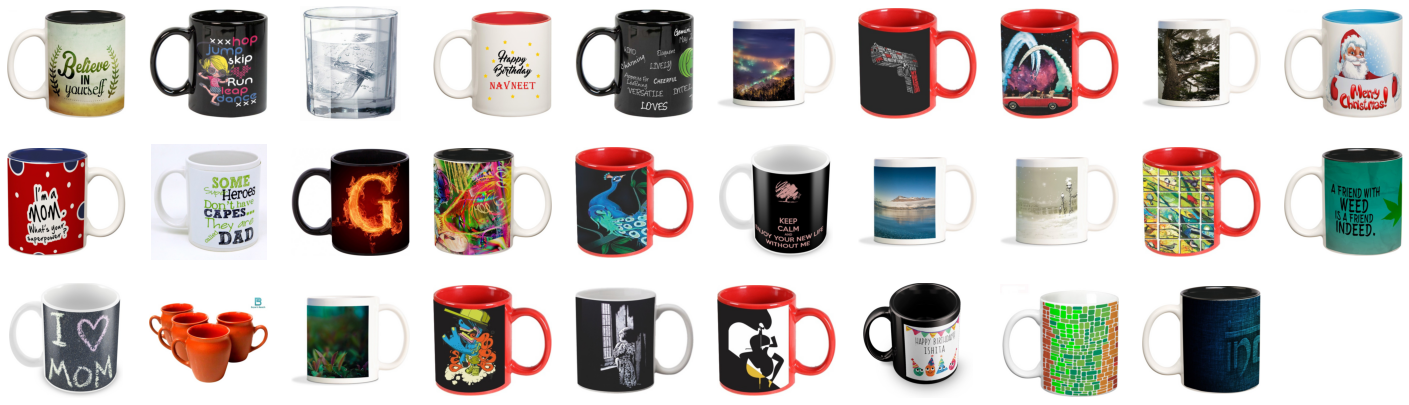

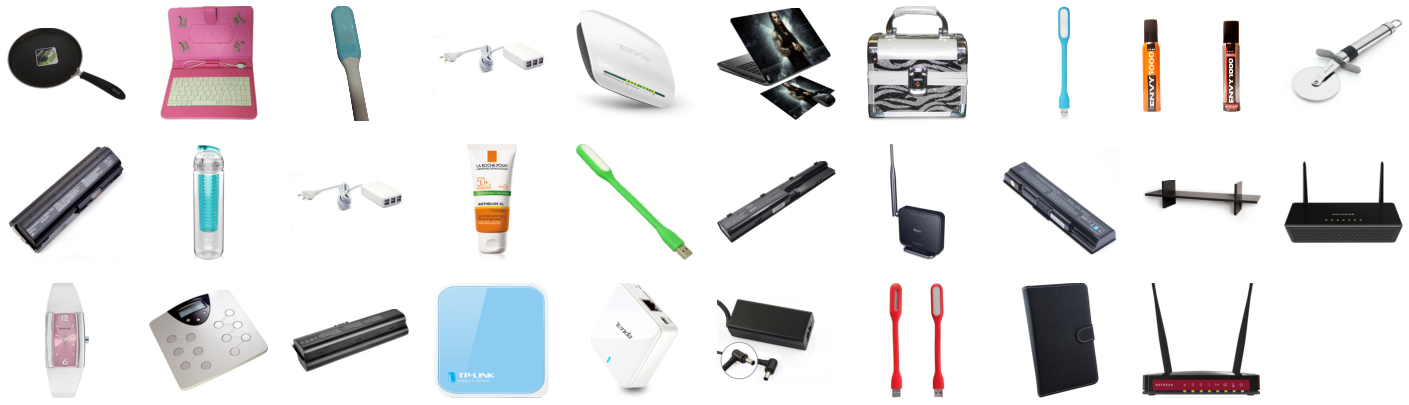

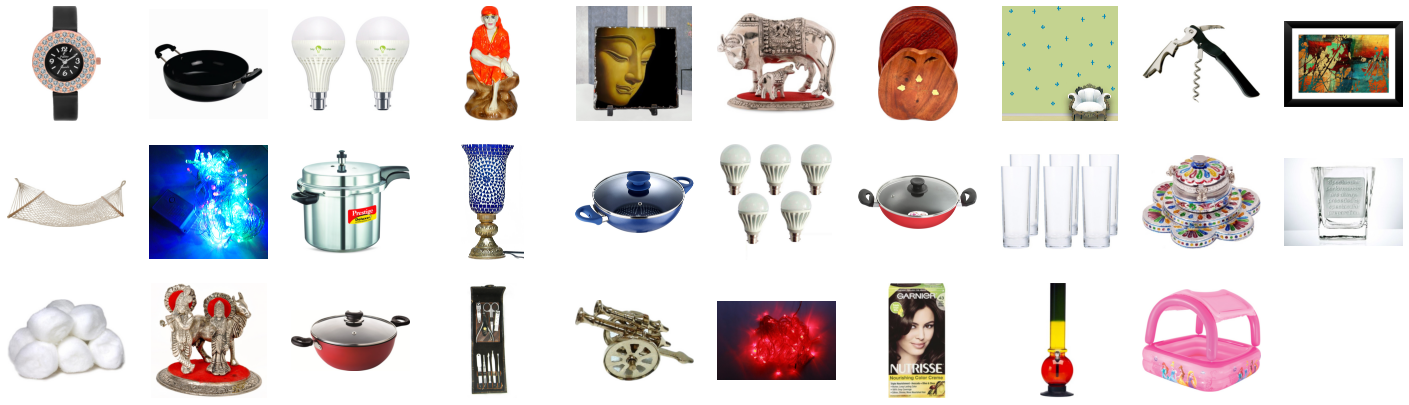

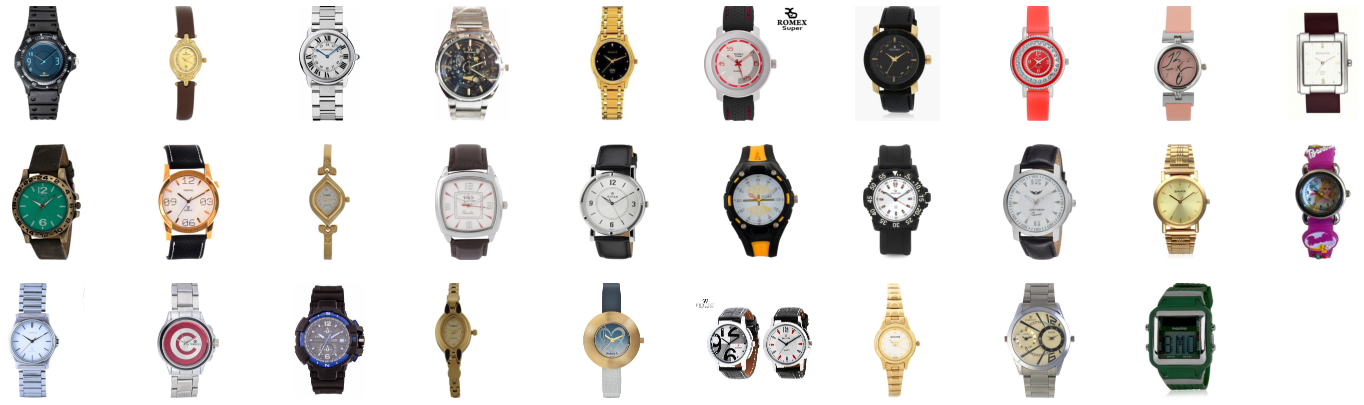

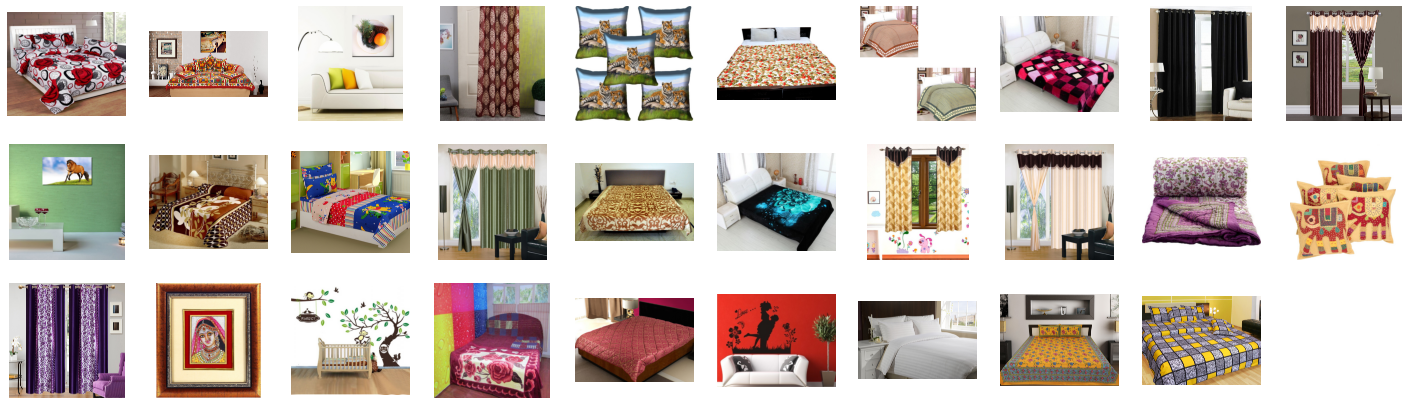

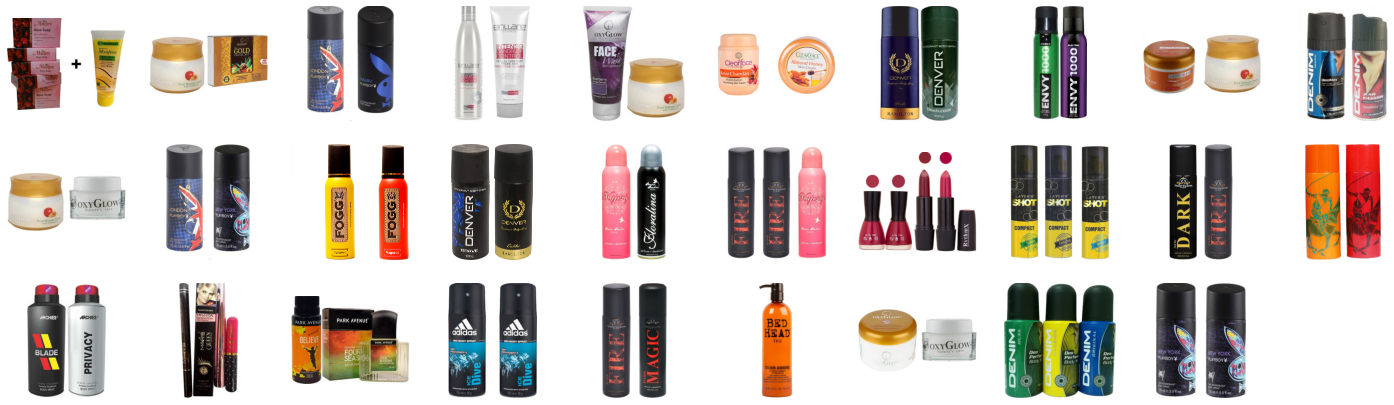

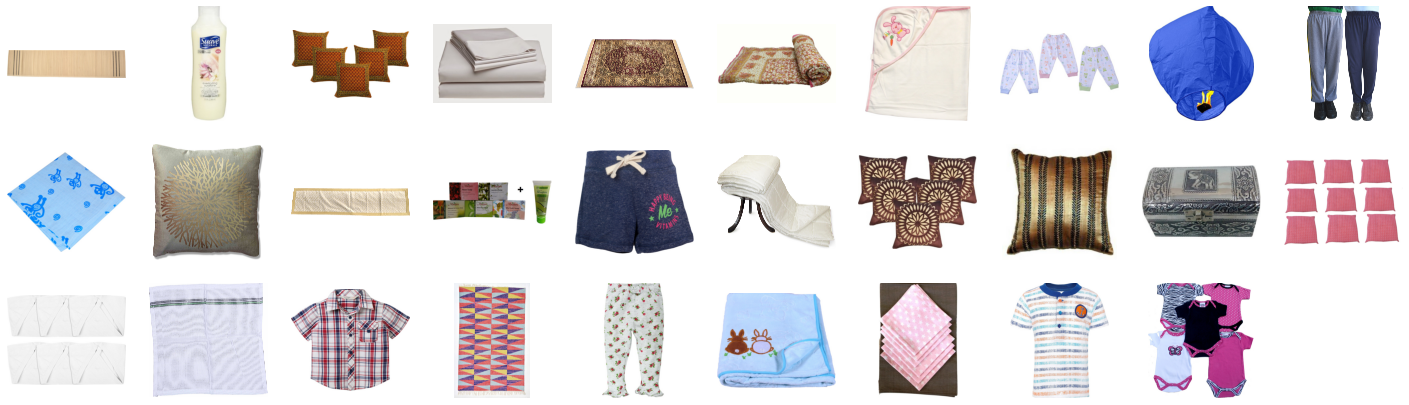

In [367]:
for k in range(len(unique_labels)):
    print('---------------------------------------------------------')
    view_cluster(k)
    

Clipping cluster size from 77 to 30


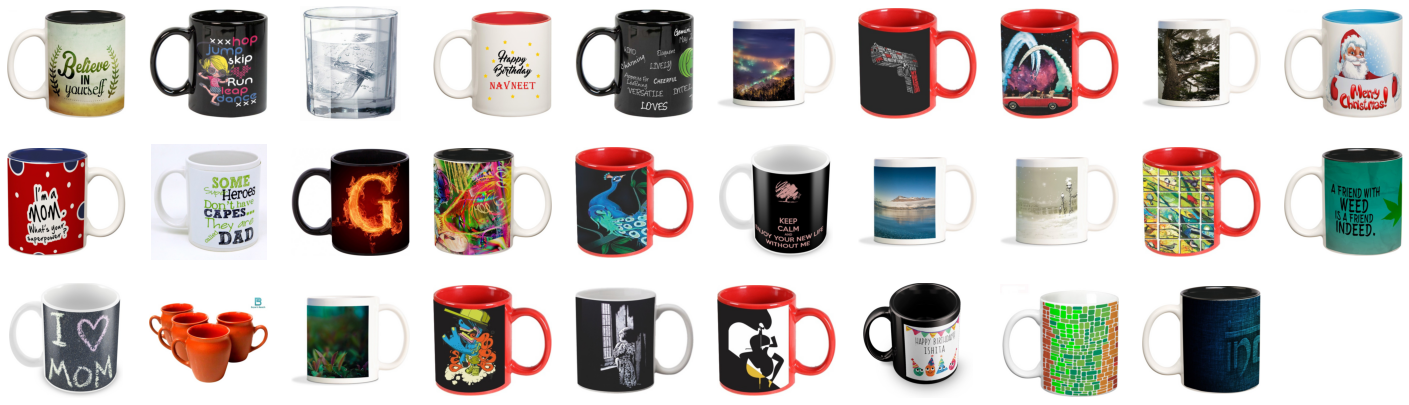

In [360]:
view_cluster(0)

Clipping cluster size from 188 to 30


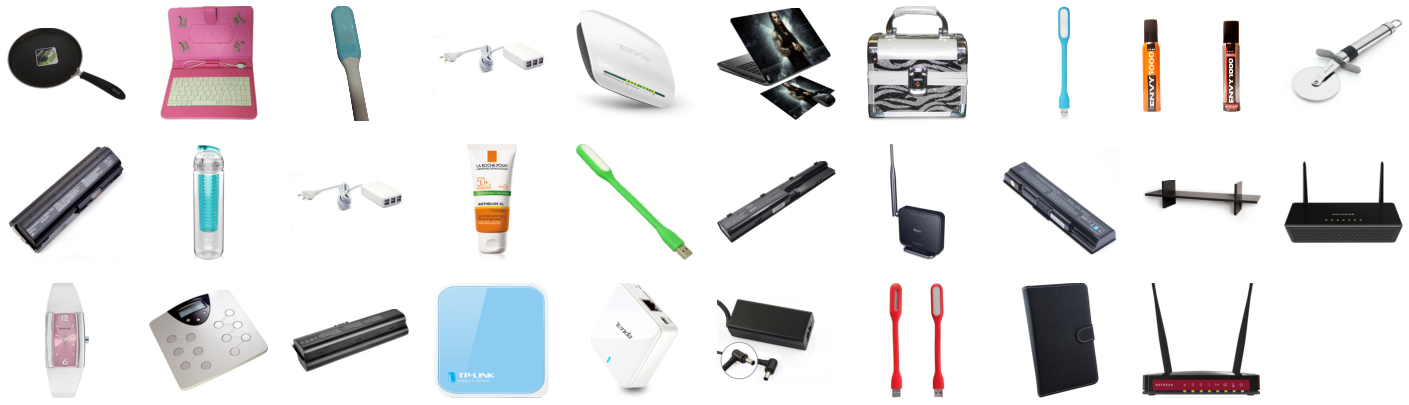

In [361]:
view_cluster()

In [349]:
groups

{2: ['009099b1f6e1e8f893ec29a7023153c4.jpg',
  '0131e5d87b72877702d536299cf83b75.jpg',
  '025a85a3d1cddc6307f7dc075d8d2132.jpg',
  '032e812adcd11a38fd8b764891a852ff.jpg',
  '037b39bef3db7ccd264c577a0edf0c0a.jpg',
  '04f9f818e2d657b873b07578cfe2eade.jpg',
  '04f9ff160a1561e3656350f4bd6b8c50.jpg',
  '057836ecde71565f8ebdd576e41fdc96.jpg',
  '06fdaa2b03d70da4358311d260456729.jpg',
  '07912328f580cf080d721e6466287896.jpg',
  '08bdf59c9dcb241e3a57eb4f3729ec70.jpg',
  '09f9f9b420edea2f39c0dc3c24d5be07.jpg',
  '0b8c4bc35aee94af356cb1fd2dfa0219.jpg',
  '0bb0f7b7a3075f4b9459121abe2185fa.jpg',
  '0c4718ae90f2889b7021a99ee1cc106c.jpg',
  '0ca8e323551dd7107ef57ef7c3e77aee.jpg',
  '0e73201f6d8807776e1d21c969078289.jpg',
  '0f4f761de4224b004402c1f97e871ba4.jpg',
  '0f7a56876c61ba98dfed48ede5d3f3e1.jpg',
  '10ad262ebfdc8614e847d36e6fe9ecf9.jpg',
  '11f06dffebf7edf9e15351834a190c2c.jpg',
  '1218fd9be42d45a81846db9f65a983bd.jpg',
  '1357e9d24661c3b5797aa1016e0c3be1.jpg',
  '13de17e59a92f8bcaec8bf103bbf

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [368]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
x_tsne = tsne.fit_transform(x)

df_x_tsne = pd.DataFrame(x_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_x_tsne["class"] = df["cat_1"]
print(df_x_tsne.shape)


(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images


In [214]:
df_x_tsne.head()

tsne1      tsne2            class
0  19.941385  -1.263899  Home Furnishing
1  31.870932  -3.673667        Baby Care
2  29.232910   5.438531        Baby Care
3  -6.202513  -8.550593  Home Furnishing
4  -3.964374  13.575226  Home Furnishing

In [216]:
l_cat

['Baby Care',
 'Home Furnishing',
 'Beauty and Personal Care',
 'Watches',
 'Home Decor & Festive Needs',
 'Computers',
 'Kitchen & Dining']

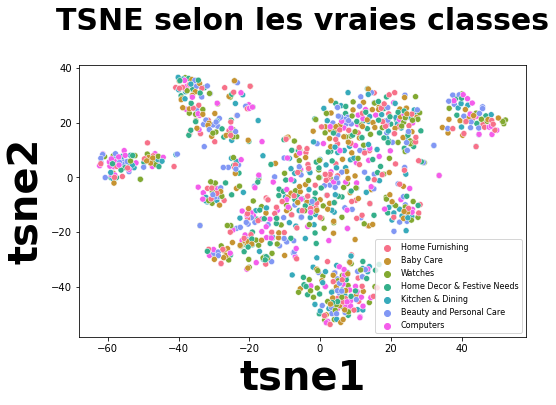

In [370]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_x_tsne, legend="brief",
    palette=sns.color_palette('husl', n_colors=len(l_cat)))

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 40, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 40, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [371]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=len(l_cat), random_state=6)
cls.fit(x_tsne)

df_x_tsne["cluster"] = cls.labels_
print(df_x_tsne.shape)


(1050, 4)


In [373]:
df_x_tsne.sample(10)

tsne1      tsne2                       class  cluster
31     3.491861 -41.715279                     Watches        0
569  -22.372541 -25.153664                     Watches        6
510   18.689461  -7.298012                     Watches        1
230  -24.377001   4.334156  Home Decor & Festive Needs        3
1041 -10.008348 -28.523417                   Baby Care        6
341   11.675155 -43.740040                   Computers        0
621    0.036704  -8.193590                   Baby Care        1
147   44.089508  11.253136            Kitchen & Dining        2
525   19.606409   6.922023                     Watches        4
35    13.953122   9.735047             Home Furnishing        4

In [374]:
df_x_tsne['class_encoded'] = le.fit_transform(df_x_tsne['class'])

In [376]:
df_x_tsne.sample(30)

tsne1      tsne2                       class  cluster  class_encoded
382  -55.524208   4.764613    Beauty and Personal Care        5              1
439   -1.148275 -11.146956             Home Furnishing        1              4
172  -31.924698  -8.966815            Kitchen & Dining        6              5
928    8.729873  12.412305             Home Furnishing        4              4
761   -6.916391  -4.889264                     Watches        1              6
792  -33.926441 -17.596123    Beauty and Personal Care        6              1
450   27.391144  21.903753                   Baby Care        4              0
243   25.957886 -14.308706            Kitchen & Dining        1              5
153   -3.124131  -4.463609            Kitchen & Dining        1              5
511  -37.654694  33.174877                   Computers        3              2
492   48.593990  15.655943                   Computers        2              2
126   -9.430223 -23.573944    Beauty and Personal Care        6              1
150   -5.355285 -14.636950            Kitchen & Dining        1              5
1034  -9.223704   7.040752                   Computers        1              2
592    6.719453  14.787784                   Baby Care        4              0
203  -24.981812  -6.392422  Home Decor & Festive Needs        6              3
781   10.737735   6.902080                     Watches        4              6
1039  -0.303520   3.428207  Home Decor & Festive Needs        1              3
913   36.491093  25.176685                     Watches        2              6
237   39.887733  30.002451  Home Decor & Festive Needs        2              3
798    4.274522  -3.651896    Beauty and Personal Care        1              1
35    13.953122   9.735047             Home Furnishing        4              4
937   24.839108  15.334552  Home Decor & Festive Needs        4              3
342   41.792320  26.344051    Beauty and Personal Care        2              1
472   -7.376614  -1.332822            Kitchen & Dining        1              5
56   -40.335239   8.467829    Beauty and Personal Care        5              1
789   39.564083  20.673740                   Baby Care        2              0
253    4.927270  25.591606            Kitchen & Dining        4              5
80    -2.773679 -11.351939  Home Decor & Festive Needs        1              3
696  -19.120714 -19.970768  Home Decor & Festive Needs        6              3

###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters


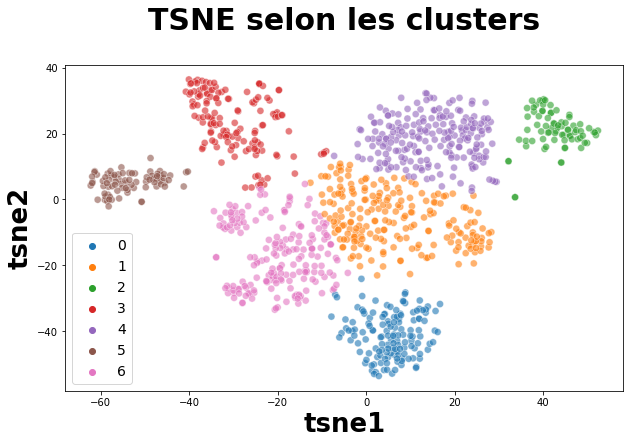

ARI :  -0.0011165186588255219


In [377]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors= len(l_cat)), s=50, alpha=0.6,
    data=df_x_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df_x_tsne["class_encoded"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes


In [378]:
df_x_tsne.groupby("cluster").count()["class"]

cluster
0    141
1    213
2     77
3    139
4    207
5     80
6    193
Name: class, dtype: int64

In [222]:
df_tsne.head()

tsne1      tsne2            class  cluster
0  19.941385  -1.263899  Home Furnishing        3
1  31.870932  -3.673667        Baby Care        3
2  29.232910   5.438531        Baby Care        3
3  -6.202513  -8.550593  Home Furnishing        1
4  -3.964374  13.575226  Home Furnishing        5

In [381]:
df_x_tsne.loc[df_x_tsne['cluster']==3]

tsne1      tsne2                       class  cluster  class_encoded
3    -23.525785  22.515446             Home Furnishing        3              4
8    -31.204693  19.183346                     Watches        3              6
11   -23.535276  14.842251                     Watches        3              6
29   -25.385281  29.241949                     Watches        3              6
30   -38.129478  36.366428                     Watches        3              6
40    -9.043359  14.671146                   Baby Care        3              0
43   -28.457838  21.498293    Beauty and Personal Care        3              1
45   -29.125671  20.500288            Kitchen & Dining        3              5
57   -28.938005  18.645927    Beauty and Personal Care        3              1
60   -32.729427  11.201969    Beauty and Personal Care        3              1
63   -30.616140  14.964501                   Baby Care        3              0
76   -20.473200  25.961281    Beauty and Personal Care        3              1
78   -25.723541  17.017559             Home Furnishing        3              4
87   -35.121616  33.382362                   Computers        3              2
91   -10.190268  13.734529  Home Decor & Festive Needs        3              3
92   -20.114637  13.129693  Home Decor & Festive Needs        3              3
94   -39.278221  29.765694  Home Decor & Festive Needs        3              3
104  -36.913349  15.811225             Home Furnishing        3              4
105  -31.590143  20.833376             Home Furnishing        3              4
106  -39.770943  35.115810                   Baby Care        3              0
159  -32.219952  19.721506            Kitchen & Dining        3              5
168  -38.695141  35.872120            Kitchen & Dining        3              5
169  -24.955971  13.507849            Kitchen & Dining        3              5
202  -25.722652  29.534576                   Baby Care        3              0
210  -37.129074  36.072227  Home Decor & Festive Needs        3              3
213  -35.143696  24.806480  Home Decor & Festive Needs        3              3
217  -32.668411  32.689709  Home Decor & Festive Needs        3              3
218  -25.037374   6.953294            Kitchen & Dining        3              5
225  -24.164526  35.229931  Home Decor & Festive Needs        3              3
230  -24.377001   4.334156  Home Decor & Festive Needs        3              3
235  -23.923145  26.935898            Kitchen & Dining        3              5
249  -17.493006  20.713102            Kitchen & Dining        3              5
256  -36.001995  32.097977  Home Decor & Festive Needs        3              3
265  -37.082035  15.351338  Home Decor & Festive Needs        3              3
271  -27.191746  14.693684  Home Decor & Festive Needs        3              3
280  -28.953108  26.789391                     Watches        3              6
283  -38.945953  28.899441                     Watches        3              6
290  -24.939634  30.323923  Home Decor & Festive Needs        3              3
294  -33.907295  30.682856                   Baby Care        3              0
298  -37.994190  31.243565            Kitchen & Dining        3              5
299  -35.965336  32.215984  Home Decor & Festive Needs        3              3
300  -16.138683   7.856369            Kitchen & Dining        3              5
305  -36.525898  17.193586  Home Decor & Festive Needs        3              3
311  -32.901360  19.328552    Beauty and Personal Care        3              1
313  -23.054136   4.511199    Beauty and Personal Care        3              1
314  -33.440746  29.322279    Beauty and Personal Care        3              1
316  -25.924534   3.625873    Beauty and Personal Care        3              1
318  -38.287048  35.357098                   Computers        3              2
324  -35.085293  22.725061                   Computers        3              2
326  -20.143436  26.473698                   Computers      

In [382]:
df_x_tsne['cluster'].value_counts()

1    213
4    207
6    193
0    141
3    139
5     80
2     77
Name: cluster, dtype: int64

In [383]:
df_x_tsne['class_encoded'].value_counts()

4    150
0    150
6    150
3    150
5    150
1    150
2    150
Name: class_encoded, dtype: int64

In [385]:
labels

0       4
1       0
2       0
3       4
4       4
       ..
1045    0
1046    0
1047    0
1048    0
1049    0
Name: class_encoded, Length: 1050, dtype: int32

In [384]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[19 32 11 21 34  6 27]
 [16 26 15 23 29 13 28]
 [23 23 14 18 23 19 30]
 [20 27  7 22 35 10 29]
 [19 37 11 21 27  9 26]
 [22 38 10 15 30 14 21]
 [22 30  9 19 29  9 32]]


In [387]:
corresp = conf_mat.argmax(axis = 1)
corresp

array([4, 4, 6, 4, 1, 1, 6], dtype=int64)

In [396]:

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [0, 2, 5, 4, 1, 6, 3]
[[19 34 32 27 21 11  6]
 [16 29 26 28 23 15 13]
 [23 23 23 30 18 14 19]
 [20 35 27 29 22  7 10]
 [19 27 37 26 21 11  9]
 [22 30 38 21 15 10 14]
 [22 29 30 32 19  9  9]]

              precision    recall  f1-score   support

           0       0.13      0.13      0.13       150
           1       0.14      0.19      0.16       150
           2       0.11      0.15      0.13       150
           3       0.15      0.19      0.17       150
           4       0.15      0.14      0.15       150
           5       0.13      0.07      0.09       150
           6       0.11      0.06      0.08       150

    accuracy                           0.13      1050
   macro avg       0.13      0.13      0.13      1050
weighted avg       0.13      0.13      0.13      1050



In [397]:
df_x_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])

In [390]:
df_x_cm.shape

(7, 7)

In [392]:
df_x_tsne.head()

tsne1      tsne2            class  cluster  class_encoded
0   8.858404 -28.298031  Home Furnishing        0              4
1  -3.693619  -8.995636        Baby Care        1              0
2   1.910744  23.311163        Baby Care        4              0
3 -23.525785  22.515446  Home Furnishing        3              4
4  -3.418798   4.679212  Home Furnishing        1              4

In [398]:
df_x_tsne.loc[df_tsne['class']== 'Baby Care'].groupby(['cluster']).count()

tsne1  tsne2  class  class_encoded
cluster                                    
0           19     19     19             19
1           32     32     32             32
2           11     11     11             11
3           21     21     21             21
4           34     34     34             34
5            6      6      6              6
6           27     27     27             27

In [399]:
df_x_cm

0   1   2   3   4   5   6
Baby Care                   19  34  32  27  21  11   6
Home Furnishing             16  29  26  28  23  15  13
Beauty and Personal Care    23  23  23  30  18  14  19
Watches                     20  35  27  29  22   7  10
Home Decor & Festive Needs  19  27  37  26  21  11   9
Computers                   22  30  38  21  15  10  14
Kitchen & Dining            22  29  30  32  19   9   9

<AxesSubplot:>

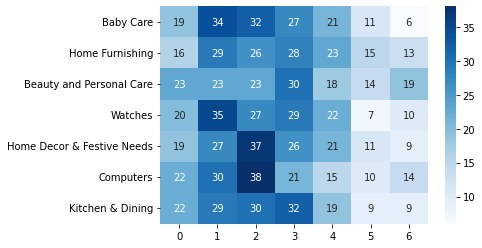

In [400]:
list_labels = set(df_x_tsne['class'])

df_x_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in '0123456'])
plt.figure(figsize = (6,4))
sns.heatmap(df_x_cm, annot=True, cmap="Blues")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

### Catalogue de fonctions utilisées

# Option de visibilité
pd.options.display.max_rows = 999

df= pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

df.head()

df.shape

df.describe()

df.dtypes

### Quelques informations sur les catégories des produits (notre target)

df['product_specifications'][0]

df['product_category_tree'].value_counts()

df['product_category_tree'].nunique()

df.isna().sum()

Très peu de valeurs manquantes, notre target est parfaitement renseignée

## Traitement des catégories de produits

La catégorie de produits est présentée comme une arborescence que nous allons découper.

type(df['product_category_tree'])

df['product_category_tree'][260]

#Test de Split
df['product_category_tree'][0]

df['product_category_tree'][0].split('["')

df['product_category_tree'][0].split('["')[0]

df['product_category_tree'][0].split('["')[1]

df['product_category_tree'][0].split('["')[1].split('"]')

#Séparation puis retrait du [" ainsi que du "]
df['product_category_tree'][0].split('["')[1].split('"]')[0]

#Séparation par >>
df['product_category_tree'][0].split('["')[1].split('"]')[0].split(' >> ')

for k in range(4):
    print(df['product_category_tree'][0].split('["')[1].split('"]')[0].split(' >> ')[k])

#### Création de features catégoriques à partir de l'arborescence de catégorie

# Fonction de traitement des catégories
def split_categories(categorie, branche):
    
    categorie = categorie.split('["')[1].split('"]')[0]
    cat = categorie.split(' >> ')
    
    if (len(cat))<3:
        cat = [cat[0], cat[1], 'None']
        if (len(cat)) < 2 :
            cat = [cat[0], 'None', 'None']
    return cat[branche]

def split_categories_1(categorie):
    return split_categories(categorie,0)
def split_categories_2(categorie):
    return split_categories(categorie,1)
def split_categories_3(categorie):
    return split_categories(categorie,2)

def detail_categories(dataframe):
    dataframe['cat_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    
    return dataframe

df = detail_categories(df)

df.head()

df = df.drop(['product_category_tree'], axis= 1 )

df.head()

##### Quelques visualisations de la quantité de produits par catégories

df.groupby('cat_1').count()['uniq_id'].sort_values(ascending=False)

df.groupby('cat_2').count()['uniq_id'].sort_values(ascending=False)

df.groupby('cat_3').count()['uniq_id'].sort_values(ascending=False)



### Catalogue de fonctions utilisées

import time
l_cat = list(set(df['cat_1']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(df.iloc[i]['cat_1'])) for i in range(len(df))]
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features) :
    time1 = time.time()
    num_labels=len(l_cat)
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categorie")
    plt.title('Représentation des descriptions par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des descriptions par clusters')
    
    plt.show()
    print("ARI : ", ARI)


### Séparation du jeu de données en jeu d'entraînement et jeu de test pour les essais d'apprentissage supervisés

train, test = train_test_split(df, test_size = 0.2, random_state=42)

train.shape

test.shape

train.head()

## Traitement des données textuelles

Nous nous basons sur la description du produit pour prédire sa catégorie.

train[['description']].head()

## Nettoyage du texte

# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text
df['description_bow'] = df['description'].apply(lambda x : transform_bow_fct(x))
df['description_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))
df['description_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))
df.shape

df.to_csv("data_clean_text_6.csv")

df.head()

## Exemple de traitement

#### Approche par TF-IDF (pondération des mots)

from sklearn.feature_extraction.text import TfidfVectorizer

from string import punctuation
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

#stopwords_int = set(stopwords_int)
stopwords_nltk = set(stopwords.words('english'))
stopwords_ponctuation = set(punctuation)
stopwords_full = set.union(stopwords_nltk, stopwords_ponctuation)

print('ponctuation : ',list(stopwords_ponctuation)[0:15])

print('stopwords : ',list(stopwords_full)[0:15])

from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
     def __init__(self):
         self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
         return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

tfidf = TfidfVectorizer(encoding='utf-8',
                       lowercase=True,
                       tokenizer=LemmaTokenizer(),
                       stop_words=stopwords_full,
                       )

type(tfidf)

nltk.download('punkt')

nltk.download('wordnet')

tfidf.fit_transform(train['description'])

tfidf.get_feature_names()

len(tfidf.get_feature_names())

matrice_cat = tfidf.transform(train['description'])
matrice_cat

matrice_cat.todense()[10,:].tolist()

train['description'].iloc[10]

def get_list(liste):
    return liste

from nltk import word_tokenize

description_test = train['description'].iloc[10]
print('-------PRE TRAITEMENT ------')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))

#lowercase
description_test = description_test.lower()
print('------- PASSAGE EN MINUSCULES -------')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))

#tokenizer : transforme les documents en liste de mots
description_test = word_tokenize(description_test)
print('------ TOKENIZER -----')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))

#stopwords : retrait des mots les plus utilisés dans la langue en question
description_test = [w for w in description_test if not w in stopwords_full] 
print('----- STOPWORDS ------')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))

#lemmatizer : représentation des mots sous leurforme cannonique
lemm = WordNetLemmatizer()
description_test = [lemm.lemmatize(ele) for ele in description_test]
print('----- LEMMATISATION -----')
print(get_list(description_test),'\n')
print(len(get_list(description_test)))



transformation = []
for i, ele  in enumerate(matrice_cat.todense()[10,:].tolist()[0]):
    if ele !=0:
        transformation.append((tfidf.get_feature_names()[i], ele))
pd.DataFrame(transformation, columns=['mot', 'tfidf'])

pd.DataFrame(transformation, columns=['mot', 'tfidf']).shape

pd.DataFrame(transformation, columns=['mot', 'tfidf']).sort_values(by='tfidf', ascending=False).head(20)

#### Approche Bag-of-Words

from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(encoding='utf-8',
                       lowercase=True,
                       tokenizer=LemmaTokenizer(),
                       stop_words=stopwords_full)
tf = tf_vectorizer.fit_transform(train['description'])

tfidf.fit_transform(train['description'])

type(tf)

type(tf_vectorizer)

tf.todense()[10,:].tolist()

tf.todense()[10,:].tolist()[0]

transformation_tf = []
for i, ele  in enumerate(tf.todense()[10,:].tolist()[0]):
    if ele !=0:
        transformation_tf.append((tf_vectorizer.get_feature_names()[i], ele))
pd.DataFrame(transformation_tf, columns=['mot', 'tf'])

pd.DataFrame(transformation_tf, columns=['mot', 'tf']).shape

pd.DataFrame(transformation_tf, columns=['mot', 'tf']).sort_values(by='tf', ascending=False).head(20)

### Réduction de dimension

#### Approche par NMF

from sklearn.decomposition import NMF

df.head()

# On applique la réduction dimensionnelle au premier niveau de l'arborescence de catégories, pour éviter d'avoir trop de 
# catégories qui ne comportent qu'un élément
nmf = NMF(n_components = df['cat_1'].nunique(),
         random_state=1,
         alpha=0.1,
         l1_ratio=0.5).fit(matrice_cat)

nmf.get_params()

# Fonction pour récupérer les top_words par topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

tfidf_feature_names = tfidf.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words = 12)

df['cat_1'].value_counts()

#### Approche par LDA

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = df['cat_1'].nunique(),
                               random_state=2)

lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words = 12)

lda.transform(tf_vectorizer.transform(test['description']))

lda.transform(tf_vectorizer.transform(train['description'])).shape

#### Attribution d'un topic pour chaque individu

val_best_topic = {}
best_topic = {}
matrix = lda.transform(tf_vectorizer.transform(train['description']))
for i in range(0,matrix.shape[0]):
    val_best_topic[i] = 0
    for j in range(0, matrix.shape[1]):
        if matrix[i,j] > val_best_topic[i]:
            val_best_topic[i] = matrix[i,j]
            best_topic[i]= j

matrix.shape[1]

matrix.shape[0]

val_best_topic

best_topic.values()

train_lda = train.copy()
train_lda['topic_lda'] = list(best_topic.values())

train_lda

#### Catégories du jeu de données en fonction des topics isolés par LDA

train_lda[['cat_1','topic_lda']].groupby(['topic_lda']).count().sort_values(by=['topic_lda', 'cat_1'],
                                                                                                        ascending=[True, False])

On obtient des topics très divers, certains semblent très représentatifs d'une catégorie de produits (1, 8, 20, 30, 57) et d'autres ressemblent un peu à des fourre-tout. Ce n'est pas étonnant car de nombreuses catégories ne sont représententées que par un ou deux éléments du jeu de données.



#### Topic identifiés pour chacune des catégories du jeu de données

train_lda[['cat_1','topic_lda']].groupby(['cat_1']).count().sort_values(by=['cat_1', 'topic_lda'], ascending=[True, False])

On remarque que la réduction dimensionnelle par LDA regroupe certaines catégories dans des topics spécifiques : La moitié des Showpieces se retrouve dans le topic 1 ; 88% des composants informatiques sont dans le topic 26 ; la majorité des 'infant wear' sont dans les topics 60 et 36 ; les Fragrances sont dans le topic 26 ; les Cookware dans le topic 26 ; les Bed Linen dans le topic 30 etc.

## Essai de quelques classifieurs supervisés

#### Approche par NaiveBayes

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)

matrice_cat

train.shape

train.head()

mnb.fit(matrice_cat, train['cat_1'])

mnb.predict(matrice_cat)

from sklearn.metrics import accuracy_score

print('Accuracy sur jeu de train : ', accuracy_score(mnb.predict(matrice_cat), train['cat_1']))

print('Accuracy sur jeu de test : ', 
      accuracy_score(mnb.predict(
          (tfidf.transform(test['description']))), test['cat_1']))

Le classifieur NaiveBayes semble très performant, nous allons quadn même essayer d'autres approches.

#### Approche par RégressionLogistique

from sklearn.linear_model import LogisticRegression

params_lr = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1],}
lr = GridSearchCV(LogisticRegression(), param_grid = params_lr)

lr.fit(matrice_cat, train['cat_1'])

print('Accuracy sur le jeu de train : ', accuracy_score(lr.best_estimator_.predict(matrice_cat), train['cat_1']))
print('Accuracy sur le jeu de test : ', 
      accuracy_score(lr.best_estimator_.predict(
          (tfidf.transform(test['description']))), test['cat_1']))

Les résultats du LogisticRegression Classifier sont encourageants.









#### Approche par SupportVectorClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params_svc = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.5, 2]}

svc = GridSearchCV(SVC(), param_grid = params_svc, cv=5)

svc.fit(matrice_cat, train['cat_1'])

svc.best_estimator_

print('Accuracy sur jeu de train : ', accuracy_score(svc.best_estimator_.predict(matrice_cat), train['cat_1']))
print('Accuracy sur jeu de test : ', 
      accuracy_score(svc.best_estimator_.predict((tfidf.transform(test['description']))), test['cat_1']))

81% de prédictions correctes sur le jeu de test, c'est plutôt encourageant quant à la faisabilité d'une classification automatique.

#### Essai après réduction dimensionnelle

svc_lda = GridSearchCV(SVC(), param_grid = params_svc, cv=5)

svc_lda.fit(lda.transform(tf_vectorizer.transform(train['description'])), train['cat_1'])

svc_lda.best_estimator_

print('Accuracy sur jeu de train : ', 
      accuracy_score(svc_lda.best_estimator_.predict(
          lda.transform(tf_vectorizer.transform(train['description']))), train['cat_1']))
print('Accuracy sur jeu de test : ', 
      accuracy_score(svc_lda.best_estimator_.predict(
          lda.transform(tf_vectorizer.transform(test['description']))), test['cat_1']))

Mauvaises performances suite à la réduction dimensionnelle, nous avons peut-être perdu trop de variance lors de cette dernière

## Approche non-supervisée

#### Réduction dimensionnelle par PCA

X = pd.concat([train, test])

X.shape

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Test effectué via embedding Bag-of-words
X = tf_vectorizer.transform(X['description']).todense()

ss = StandardScaler()
X = ss.fit_transform(X)
pca = PCA()
pca.fit(X)

X.shape

# Somme cumulées des variances des différentes composantes de la PCA
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de la PCA')
plt.xlabel('Nombre de composantes de la PCA')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[0])),
         np.cumsum(pca.explained_variance_ratio_))

#Détermination du nombre de composantes expliquant 95% de la variance
sum_pca = np.cumsum(pca.explained_variance_ratio_)
for counter, value in enumerate(sum_pca):
    if value > 0.95:
        X_reduit = pca.transform(X)[:,:counter]
        break

X_reduit.shape

print('nombre de features : {}, variance : {}'.format(counter+1,np.cumsum(pca.explained_variance_ratio_)[counter]))

# Export des données post-PCA
np.save('X_reduit_NLP.csv', X_reduit)

#### Approche par k-means et recherche du k optimal

Méthodologie naïve : On va regarder la somme des inerties des K-Means en fonction du nombre de clusters pour identifier des "drops" brutaux.

from sklearn.cluster import KMeans

from ipywidgets import IntProgress
from IPython.display import display
import time
from ipywidgets import Text

dict_kmeans = {}

inertie = {}

max_clusters=100

# Barre de progression pour savoir où l'on en est dans la compilation des tests.
f = IntProgress(min=1, max=max_clusters) # instantiate the bar
chaine = str(1)+'/'+str(max_clusters)
g = Text(value=chaine)
display(f) # display the bar
display(g)

## $ Barre bugguée puisqu'on ne test pas de k-means pour k= 1 $



for k in range(1,max_clusters):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_reduit)
    inertie[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    f.value = k # signal to increment the progress bar
    g.value =str(k)+'/'+str(max_clusters)

# Plot de la somme des inerties en fonction du nombre de clusters
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertie.keys()),
             list(inertie.values())
            )

C'est difficilement lisible et interprétable, on s'attend à obtenir un nombre de clusters élevés au vu du nombre de catégories. On note un joli drop d'inertie pour k=10 et k = 20

Méthodologie moins naïve : Nous allons étudier le coefficient de silhouette moyen d'un K-Means en fonction du nombre de clusters, pour juger de la qualité des clusterings effectués.

from sklearn.metrics import silhouette_score

# Création d'un dictionnaire pour les valeurs de silhouette moyenne de chacun des modèles, puis visualisation
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = X_reduit,
                                             labels= list(dict_kmeans[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen du K-Means en fonction du nombre de clusters')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()

silhouettes_kmeans.values()

for i in range(1,90):
    if list(silhouettes_kmeans.values())[i] >= 0.1 :
        print(i,list(silhouettes_kmeans.values())[i])

list(silhouettes_kmeans.values())[9]

On obtient le meilleur score de silhouette pour k = 10, c'est-à-dire pour 10 clusters.

dict_kmeans[10].labels_

X_etud_10 = pd.concat([train,test]).copy()


X_etud_10.head()



X_etud_10['kmeans'] = dict_kmeans[10].labels_

X_etud_10.head()

X_etud_10['kmeans'].value_counts()

On se rend compte que notre clustering à 10 clusters est trivial, nous allons donc prendre une valeur de k plus grande en termes d'ordre de grandeurs par l'analyse du score de silhouette.

#### Essai avec k = 40

X_etud_40 = pd.concat([train,test]).copy()
X_etud_40['kmeans'] = dict_kmeans[40].labels_

X_etud_40.head()

X_etud_40['kmeans'].value_counts()

C'est encore trivial, on va augmenter le nombre de clusters, en sachant qu'il y a au départ 62 catégories d'objets.

#### Essai avec k = 55

X_etud_55 = pd.concat([train,test]).copy()
X_etud_55['kmeans'] = dict_kmeans[55].labels_

X_etud_55['kmeans'].value_counts()















#  Approche par Bag of word / Tf-idf

## Préparation sentences

# création du bag of words (CountVectorizer et Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)


cv_fit = cvect.fit(df['description_bow_lem'])
ctf_fit = ctf.fit(df['description_bow_lem'])

cv_transform = cvect.transform(df['description_bow_lem'])  
ctf_transform = ctf.transform(df['description_bow_lem'])  

## Exécution des modèles

print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)


## Graphiques

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### Approche par Word2Vec

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

df.head()

len(df['description_bow'])

liste_1 = []

for k in range(len(df['description_bow'])):
    liste_1.append(len(df['description_bow'][k]))

liste_1

df['len_description_bow'] = liste_1

df.head()

liste_2 =[]
for k in range(len(df['description_dl'])):
    liste_2.append(len(df['description_dl'][k]))
df['len_description_dl'] = liste_2


df.head()

m = max(df['len_description_bow'])
m_dl = max(df['len_description_dl'])

m

df.sample(5)

w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = m 
sentences = df['description_bow'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

embeddings = embed_model.predict(x_sentences)
embeddings.shape

ARI, X_tsne, labels = ARI_fct(embeddings)

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### Approche par Universal Sentence Encoder

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model



print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

batch_size = 10
sentences = df['description_dl'].to_list()

features_USE = feature_USE_fct(sentences, batch_size)

ARI, X_tsne, labels = ARI_fct(features_USE)

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Approche par BERT

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

## Fonctions communes

# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT hub Tensorflow

import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

sentences = df['description_dl'].to_list()

max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

ARI, X_tsne, labels = ARI_fct(features_bert)

TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)







# Traitement des images

df.head()

### Approche par SIFT

import os
import cv2



# Création de listes contenant les images ainsi que les IDs

path = 'Images'
images = []
class_images = []
ma_liste = os.listdir(path)
print('Nombre d/images détectées', len(ma_liste))

for ele in ma_liste :
    imgCur = cv2.imread(f'{path}/{ele}',0)
    images.append(imgCur)
    class_images.append(os.path.splitext(ele)[0])


images[3].shape


#cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY).shape

# Passage des images en noir et blanc
#for k in range(len(images)-1) :
#    images[k] = cv2.cvtColor(images[k], cv2.COLOR_BGR2GRAY)

#images[3].reshape()

## Détermination et affichage des descripteurs SIFT

sift = cv2.SIFT_create()



histograms = []
for img in images :
    hist = cv2.equalizeHist(img)
    histograms.append(hist)



keypoints_sift = []
descriptors_sift = []
images_sift_kp = []
for hist in histograms :
    kp, des = sift.detectAndCompute(hist, None)
    keypoints_sift.append(kp)
    descriptors_sift.append(des)
    

descriptors_sift[0].shape

descriptors_sift_array = np.asarray(descriptors_sift)

descriptors_sift_array.shape

descriptors_sift_all   = np.concatenate(descriptors_sift_array, axis=0)

descriptors_sift_all.shape



print()
print("Nombre de descripteurs : ", descriptors_sift_all.shape)


### Création des clusters de descripteurs

np.sqrt(len(descriptors_sift_all))

from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(descriptors_sift_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(descriptors_sift_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(descriptors_sift_array) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


plt.plot(hist_vectors[12])

## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)



df.head()

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df["cat_1"]
print(df_tsne.shape)


df['cat_1'].value_counts()

## Analyse visuelle : affichage T-SNE selon catégories d'images


df_tsne.head()

#TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

l_cat

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('husl', n_colors=len(l_cat)))

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 40, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 40, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=len(l_cat), random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters


plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors= len(l_cat)), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df["cat_1"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes


df_tsne.groupby("cluster").count()["class"]

df_tsne.head()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_tsne['class_encoded'] = le.fit_transform(df_tsne['class'])
labels = df_tsne['class_encoded']

df_tsne.head()

df_tsne.loc[df_tsne['class_encoded']==0]

df_tsne['cluster'].value_counts()

df_tsne['class_encoded'].value_counts()

conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

corresp = conf_mat.argmax(axis = 0)
corresp

def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = [0,2,5,4,1,6,3]
    
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0254163"])

df_cm.shape

df_tsne.head()

df_tsne.loc[df_tsne['class']== 'Baby Care'].groupby(['cluster']).count()

df_cm

list_labels = set(df_tsne['class'])

df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in '0254163'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

df_tsne.sample(40)





### Approche par réseau de neurones convolutionnels : VGG-16

Dans ce cas de figure, nous n'avons que peu de produits disponibles. Nous allons nous utiliser le transfer learning pour extraire les features de notre jeu d'images, en retirant la dernière couche du modèle et ensuite entraîner un classifieur. On fixera donc tous les autres paramètres.

import keras


from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Création de listes contenant les images ainsi que les IDs

path_2 = r'C:\Users\Alexandre\Images'
os.chdir(path_2)
images_2 = []
class_images = []
ma_liste_2 = os.listdir(path_2)
print('Nombre d/images détectées', len(ma_liste_2))

with os.scandir(path_2) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            images_2.append(file.name)



model = VGG16()
# On cut le dernier layer
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

data_extracted = {}
for img in images_2:
    feat = extract_features(img,model)
    data_extracted[img] = feat
    

print(images_2[:10])

len(data_extracted)
print(data_extracted)

# get a list of the filenames
filenames = np.array(list(data_extracted.keys()))

# get a list of just the features
feat = np.array(list(data_extracted.values()))

# reshape so that there are 1050 samples of 4096 vectors
feat = feat.reshape(-1,4096)



len(feat)



df['class_encoded'] = df_tsne['class_encoded']

df.head()

# get the unique labels

label = df['class_encoded'].tolist()
unique_labels = list(set(label))

# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=0.99, random_state=22)
pca.fit(feat)
x = pca.transform(feat)
print(x.shape)

x

len(unique_labels)

# cluster feature vectors
kmeans = KMeans(n_clusters=len(unique_labels),n_jobs=-1, random_state=22)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    print(len(files))
    if len(files) > 30:
        print(f"Clipping cluster size from {len(files)} to 30")
        files = files[:29]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

for k in range(len(unique_labels)):
    print('---------------------------------------------------------')
    view_cluster(k)
    

view_cluster(0)

view_cluster()

groups

### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
x_tsne = tsne.fit_transform(x)

df_x_tsne = pd.DataFrame(x_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_x_tsne["class"] = df["cat_1"]
print(df_x_tsne.shape)


## Analyse visuelle : affichage T-SNE selon catégories d'images


df_x_tsne.head()

l_cat

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_x_tsne, legend="brief",
    palette=sns.color_palette('husl', n_colors=len(l_cat)))

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 40, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 40, fontweight = 'bold')
plt.legend(prop={'size': 8}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=len(l_cat), random_state=6)
cls.fit(x_tsne)

df_x_tsne["cluster"] = cls.labels_
print(df_x_tsne.shape)


df_x_tsne.sample(10)

df_x_tsne['class_encoded'] = le.fit_transform(df_x_tsne['class'])

df_x_tsne.sample(30)

###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters


plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors= len(l_cat)), s=50, alpha=0.6,
    data=df_x_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df_x_tsne["class_encoded"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes


df_x_tsne.groupby("cluster").count()["class"]

df_tsne.head()

df_x_tsne.loc[df_x_tsne['cluster']==3]

df_x_tsne['cluster'].value_counts()

df_x_tsne['class_encoded'].value_counts()

labels

conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

corresp = conf_mat.argmax(axis = 1)
corresp


cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

df_x_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])

df_x_cm.shape

df_x_tsne.head()

df_x_tsne.loc[df_tsne['class']== 'Baby Care'].groupby(['cluster']).count()

df_x_cm

list_labels = set(df_x_tsne['class'])

df_x_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in '0123456'])
plt.figure(figsize = (6,4))
sns.heatmap(df_x_cm, annot=True, cmap="Blues")





















































































































































































